## Logical Steps:
1. Import Data
2. Create Features
3. Grouping: Get angry birds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import time

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
raw_data = pd.read_csv('Verbatims-20131231.csv')

In [21]:
# data = data.reindex(columns=(['opened'] + list([a for a in data.columns if a != 'opened']) ))
data = data.reindex(columns=['ID', 'Verbatim', 'Raw_Verbatim','word_count', 'review_tokenized', 'Bucket',
       'clean_review_lemmatized'])
data

ID                                           Verbatim  \
0          0  the only reason i did not lease the buick lacr...   
1          1  was not a bmw dealership  i clicked wrong butt...   
2          2                brand loyalty to chrysler products    
3          3                           i wanted to buy american   
4          4  the one major disappointment i have with with ...   
...      ...                                                ...   
39805  39805                     just as happy as you can be      
39806  39806  road noise is worse then my      honda civic  ...   
39807  39807  i have noticed that i some times get alert mes...   
39808  39808  i am extremely unhappy with the gas mileage th...   
39809  39809   the satellite radio cuts out in some instance...   

                                            Raw_Verbatim  word_count  \
0      The only reason I didn't lease the Buick LaCro...          50   
1      Wasn't a BMW dealership, I clicked wrong butto...          16   
2                    Brand loyalty to Chrysler products.           6   
3                               I wanted to buy American           5   
4      The one major disappointment I have with with ...          24   
...                                                  ...         ...   
39805                     Just as happy as you can be...          10   
39806  Road noise is worse then my 2006 Honda Civic. ...          61   
39807  I have noticed that I some times get alert mes...          75   
39808  I am extremely unhappy with the gas mileage th...          86   
39809  .The satellite radio cuts out in some instance...          84   

                                        review_tokenized Bucket  \
0      [the, only, reason, i, did, not, lease, the, b...      C   
1      [was, not, a, bmw, dealership, i, clicked, wro...      B   
2               [brand, loyalty, to, chrysler, products]      A   
3                         [i, wanted, to, buy, american]      S   
4      [the, one, major, disappointment, i, have, wit...      B   
...                                                  ...    ...   
39805                [just, as, happy, as, you, can, be]      A   
39806  [road, noise, is, worse, then, my, honda, civi...      D   
39807  [i, have, noticed, that, i, some, times, get, ...      D   
39808  [i, am, extremely, unhappy, with, the, gas, mi...      D   
39809  [the, satellite, radio, cuts, out, in, some, i...      D   

                                 clean_review_lemmatized  
0      [reason, lease, buick, lacrosse, get, deal, wa...  
1         [bmw, dealership, click, wrong, button, buick]  
2                    [brand, loyalty, chrysler, product]  
3                                  [want, buy, american]  
4      [major, disappointment, chrysler, ipod, interf...  
...                                                  ...  
39805                                            [happy]  
39806  [road, noise, bad, honda, civic, design, featu...  
39807  [notice, time, alert, message, blis, thing, aw...  
39808  [extremely, unhappy, gas, mileage, car, get, s...  
39809  [satellite, radio, cut, instance, ford, focus,...  

[39810 rows x 7 columns]

Data Pre-processing and EDA
---------

In [94]:
data.shape

(39810, 7)

In [95]:
data.dtypes

Survey            object
Sequence8          int64
Completed On       int64
Name              object
City             float64
Question Code     object
Verbatim          object
dtype: object

In [96]:
data.describe()

Sequence8  Completed On  City
count  3.981000e+04  3.981000e+04   0.0
mean   1.612184e+07  2.013109e+07   NaN
std    5.052493e+05  1.602587e+03   NaN
min    1.368916e+07  2.013052e+07   NaN
25%    1.577457e+07  2.013070e+07   NaN
50%    1.618236e+07  2.013082e+07   NaN
75%    1.651002e+07  2.013100e+07   NaN
max    1.688372e+07  2.014022e+07   NaN

In [1]:
data.describe(exclude='float64') # drop All features: except Verbatim & 

NameError: name 'data' is not defined

In [98]:
data['Sequence8'].value_counts()

16822362    3
16508116    3
15766137    3
15483193    3
16419136    3
           ..
15578372    1
16499978    1
15534846    1
16256275    1
15798274    1
Name: Sequence8, Length: 26682, dtype: int64

In [99]:
data[data['Sequence8']==16822362]

Survey  Sequence8  Completed On       Name  City Question Code  \
20630  2013 NVES   16822362      20131024  Darren T.   NaN      NVES4000   
20631  2013 NVES   16822362      20131024  Darren T.   NaN      NVES4001   
39549  2013 NVES   16822362      20131024  Darren T.   NaN      NVES4002   

                                                Verbatim  
20630  The design's too old, I'm afraid they're gonna...  
20631  Please put a better design rims in the base mo...  
39549  Please re-consider putting a Automated Folding...

In [100]:
print(data.shape)
print(data['Verbatim'].unique().size)

(39810, 7)
39227


Remove Non-unique Verbatims

In [101]:
unique_verbs = list(data['Verbatim'].unique())
unique_verbs

["The only reason I didn't lease the Buick LaCrosse is because I got the deal I wanted on the 300.  If I didn't get the lease payment I wanted on the 300, I would have bought the Buick.",
 "Wasn't a BMW dealership, I clicked wrong button - it was Buick.",
 'Brand loyalty to Chrysler products.',
 'I wanted to buy American',
 'The one major disappointment I have with with the Chrysler 300, is the ipod interface. It is terrible.',
 "The only thing i don't like is the seats have too much angle on the sides.  It bothers my hips.",
 'payents were to high for me right now',
 'was very please with sales person who help us',
 'No factory incentives making the cost difference prohibitive',
 "Our experience with Dave Smith Motors was the smoothest, most straight forward, honest deal I've ever experienced purchasing a vehicle, and I've purchased for fleets for 40 years.  The most rewarding car experience I've ever had.",
 'they wanted more than i can pay as a down payment, other wise i would have 

In [102]:
print(data[data['Verbatim'].duplicated()].loc[:, ['Name', 'Verbatim']].head(25))

                Name                    Verbatim
1299       Kendra G.               Too expensive
1373      Alberto Z.   The wife did not like it.
1409          Joe E.               Too expensive
1689       Robert S.             No other reason
1754        Marie D.               too expensive
1758    Constance M.               Too expensive
1842       Joseph V.              Too expensive.
2200        Steve T.               interest rate
2230       Joseph D.           Love my new truck
2495      Phyllis S.               Too expensive
2529         Tali G.               Too expensive
2565        David I.            Great experience
2739     Jennifer G.               too expensive
3227      Huaying H.          Price was too high
3254      Michael B.             no other reason
3389  Christopher M.           I love my new car
3575       Cheryl B.               too expensive
3764      Dorothy H.             love my new car
3779        Carol O.               Too expensive
3850      Anthony C.

### Tokenize Verbatims & Group Visualization

In [103]:
data['ID'] = list(range(data.shape[0]))
data_0 = data.copy()

In [104]:
list(range(data.shape[0]))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [105]:
data = data.loc[:,['ID', 'Verbatim'] ]
data

ID                                           Verbatim
0          0  The only reason I didn't lease the Buick LaCro...
1          1  Wasn't a BMW dealership, I clicked wrong butto...
2          2                Brand loyalty to Chrysler products.
3          3                           I wanted to buy American
4          4  The one major disappointment I have with with ...
...      ...                                                ...
39805  39805                     Just as happy as you can be...
39806  39806  Road noise is worse then my 2006 Honda Civic. ...
39807  39807  I have noticed that I some times get alert mes...
39808  39808  I am extremely unhappy with the gas mileage th...
39809  39809  .The satellite radio cuts out in some instance...

[39810 rows x 2 columns]

In [106]:
data.describe(include='object')

Verbatim
count           39810
unique          39227
top     Too expensive
freq               65

In [29]:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")
import re
import random
random.seed(123)

### LowerCase all text

In [30]:
data['Verbatim'] = [text.strip().lower() for text in data['Verbatim']]  # remove Trailing/Leading whitespaces
data['Verbatim'][:5]

0    the only reason i did not lease the buick lacr...
1    was not a bmw dealership  i clicked wrong butt...
2                   brand loyalty to chrysler products
3                             i wanted to buy american
4    the one major disappointment i have with with ...
Name: Verbatim, dtype: object

#### Average Character Length of Verbatim(s)

In [31]:
print('Average Verbatim Charatcer length of Data:', np.mean([len(i) for i in data['Verbatim']]))

Average Verbatim Charatcer length of Data: 171.50015071590053


### Removal/Replacement of: Contractions, Accented Characters, Symbols/Markdown Characters
**Contraction-Expansion Map:**

In [32]:
contraction_map = {
"ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have",
"couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
"hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have",
"he'll": "he will", "he'll've": "he will have", "he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is",
"I'd": "I would","I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would",
"i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would",
"it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not",
"might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not",
"mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is","should've": "should have","shouldn't": "should not",
"shouldn't've": "should not have","so've": "so have","so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is",
"there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have",
"they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not",
"we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not",
"what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have","when's": "when is",
"when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have",
"who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have",
"would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would",
"y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have",
"you'll": "you will","you'll've": "you will have","you're": "you are","you've": "you have"
}

In [33]:
import unicodedata  # for removal of accented characters

def expand_contractions(text, contraction_mapping=contraction_map):
    
    # Create 're' object by re.compile(pattern, repl, string)    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    # re.IGNORECASE : Make search case-insensiitive
    # re.DOTALL: Make the '.' special character match any character at all, including a newline
    
    # To Expand the Contracted Words
    def expand_match(contraction):
        match = contraction.group(0)        
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        return expanded_contraction
        
    # string substitution: regex.sub(replacement, subject)    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub(pattern="'", repl="", string=expanded_text)  # Remove apostrophe
    return expanded_text   # Returns expanded text


# Removes accented characters and emojis too
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii, non-Words and Digits/Numerals
    text = re.sub("(\\W|\\d)",' ',text)  # \W: non-alphanumeric character, \d: decimal digit
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)  # \n: newline char, \w: any alphanumeric character, 
                  # *: matches zero or more occurrences, ?: matches Zero or One occurrence of the pattern left to it.
                  # (a|b|c)xz: group sub-patterns to match, [abc]: set of characters to match, \s: whitespace 
                  # |: is used for alternation a|b
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    return text

In [34]:
# Test: expand_contractions()
txt = "They aren't sick, you shouldn't worry!"
print(expand_contractions(txt),'\n')

# Test: remove_accented_chars()
txt = 'Demain, dès l’aube, à l’heure où blanchit la campagne, Je partirai. J’irai par la forêt, j’irai par la montagne.'
print('Non-Accented Text:',remove_accented_chars(txt),'\n')

# Test: scrub_words()
txt = "Love, Love, \n\n\t, Love this movie!!😍😍😍❤️❤️❤️,&*(@)$&Lion King is the best#(@#$)"
print('Scrubbed Text:',scrub_words(txt))

They are not sick, you should not worry! 

Non-Accented Text: Demain, des laube, a lheure ou blanchit la campagne, Je partirai. Jirai par la foret, jirai par la montagne. 

Scrubbed Text: Love  Love       Love this movie                   Lion King is the best      


In [35]:
data['Raw_Verbatim'] = data['Raw_Verbatim'].apply(lambda x: expand_contractions(re.sub('’', "''", x)))
data

ID                                           Verbatim  \
0          0  the only reason i did not lease the buick lacr...   
1          1  was not a bmw dealership  i clicked wrong butt...   
2          2                 brand loyalty to chrysler products   
3          3                           i wanted to buy american   
4          4  the one major disappointment i have with with ...   
...      ...                                                ...   
39805  39805                        just as happy as you can be   
39806  39806  road noise is worse then my      honda civic  ...   
39807  39807  i have noticed that i some times get alert mes...   
39808  39808  i am extremely unhappy with the gas mileage th...   
39809  39809  the satellite radio cuts out in some instances...   

                                            Raw_Verbatim  word_count  \
0      The only reason I did not lease the Buick LaCr...          50   
1      was not a BMW dealership, I clicked wrong butt...          16   
2                    Brand loyalty to Chrysler products.           6   
3                               I wanted to buy American           5   
4      The one major disappointment I have with with ...          24   
...                                                  ...         ...   
39805                     Just as happy as you can be...          10   
39806  Road noise is worse then my 2006 Honda Civic. ...          61   
39807  I have noticed that I some times get alert mes...          75   
39808  I am extremely unhappy with the gas mileage th...          86   
39809  .The satellite radio cuts out in some instance...          84   

                                        review_tokenized Bucket  \
0      [the, only, reason, i, did, not, lease, the, b...      C   
1      [was, not, a, bmw, dealership, i, clicked, wro...      B   
2               [brand, loyalty, to, chrysler, products]      A   
3                         [i, wanted, to, buy, american]      S   
4      [the, one, major, disappointment, i, have, wit...      B   
...                                                  ...    ...   
39805                [just, as, happy, as, you, can, be]      A   
39806  [road, noise, is, worse, then, my, honda, civi...      D   
39807  [i, have, noticed, that, i, some, times, get, ...      D   
39808  [i, am, extremely, unhappy, with, the, gas, mi...      D   
39809  [the, satellite, radio, cuts, out, in, some, i...      D   

                                 clean_review_lemmatized  
0      [reason, lease, buick, lacrosse, get, deal, wa...  
1         [bmw, dealership, click, wrong, button, buick]  
2                    [brand, loyalty, chrysler, product]  
3                                  [want, buy, american]  
4      [major, disappointment, chrysler, ipod, interf...  
...                                                  ...  
39805                                            [happy]  
39806  [road, noise, bad, honda, civic, design, featu...  
39807  [notice, time, alert, message, blis, thing, aw...  
39808  [extremely, unhappy, gas, mileage, car, get, s...  
39809  [satellite, radio, cut, instance, ford, focus,...  

[39810 rows x 7 columns]

#### Invoking the above defined functions

In [114]:
# data['Verbatim']= [expand_contractions(re.sub('’', "'", text)) for text in data['Verbatim']]
data['Verbatim'] = data['Verbatim'].apply(lambda x: expand_contractions(re.sub('’', "'", x)))
# Apply remove_accented_chars()
data['Verbatim'] = data['Verbatim'].apply(lambda x: remove_accented_chars(re.sub('’', "'", x)))
# Apply scrub_words()
data['Verbatim'] = data['Verbatim'].apply(lambda x: scrub_words(re.sub('’', "'", x)))

### Adding new column "word_count" which specifies the number of tokens in each document

In [115]:
data['word_count'] = data['Verbatim'].apply(lambda x: len(x.split(' ')))  # tokenize words separated by single space

In [116]:
data.head()

ID                                           Verbatim  word_count
0   0  the only reason i did not lease the buick lacr...          50
1   1  was not a bmw dealership  i clicked wrong butt...          16
2   2                brand loyalty to chrysler products            6
3   3                           i wanted to buy american           5
4   4  the one major disappointment i have with with ...          24

In [117]:
print('Data Review Stats:')
print('-'*20)
print(data['word_count'].describe(),'\n')

Data Review Stats:
--------------------
count    39810.000000
mean        37.979678
std         52.835134
min          1.000000
25%         10.000000
50%         20.000000
75%         45.000000
max       1233.000000
Name: word_count, dtype: float64 



### Lemmatization, Stemming, Tokenization and Stopwords.

In [118]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('First ten stop words: %s' % list(stopwords)[:10])
# stopwords.remove('no')
# stopwords.remove('not')

First ten stop words: ['hers', 'that', '‘ll', 'without', "'ll", 'itself', 'thereafter', 'they', 'than', 'done']


In [119]:
print('Number of stop words: %d' % len(stopwords)) # stopwords is a set()

Number of stop words: 326


In [120]:
## Adding Custom stopwords to the spacy stopword list
for w in stopwords:
    nlp.vocab[w].is_stop = True

In [121]:
## Use NLTK for stemming.
## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# Return stems of words (w. & w/o stopwords)
def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word (word.text returns textual tokens)
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]        
    
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #print("returning stems")
    return stems

# Return lemmatized words (w. & w/o stopwords)
def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    # spaCy will convert word to lower case and changing past tense, 
    # gerund form (other tenses as well) to present tense. Also, “they” normalize to “-PRON-” which is pronoun.

    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
    
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)            
    
    lemma = [t.lemma_ for t in filtered_tokens]    
    return lemma

# Return Tokenized words only (w. and w/o stopwords)
def tokenize_only(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

We are trying to create four seperate lists:
1. Clean Review Lemmatized (w/o stopwords)
2. Clean Review Stemmed (w/o stop words)
3. Review Lemmatized (w stopwords)
4. Review Stemmed (w stopwords)

### NOTE: Time to execute below chunk = 780s (13 min)
#### Load from local file 'data_txt_preprocessed.csv'

In [36]:
data.to_csv('data_txt_preprocessed.csv',index=False)

In [37]:
data

ID                                           Verbatim  \
0          0  the only reason i did not lease the buick lacr...   
1          1  was not a bmw dealership  i clicked wrong butt...   
2          2                 brand loyalty to chrysler products   
3          3                           i wanted to buy american   
4          4  the one major disappointment i have with with ...   
...      ...                                                ...   
39805  39805                        just as happy as you can be   
39806  39806  road noise is worse then my      honda civic  ...   
39807  39807  i have noticed that i some times get alert mes...   
39808  39808  i am extremely unhappy with the gas mileage th...   
39809  39809  the satellite radio cuts out in some instances...   

                                            Raw_Verbatim  word_count  \
0      The only reason I did not lease the Buick LaCr...          50   
1      was not a BMW dealership, I clicked wrong butt...          16   
2                    Brand loyalty to Chrysler products.           6   
3                               I wanted to buy American           5   
4      The one major disappointment I have with with ...          24   
...                                                  ...         ...   
39805                     Just as happy as you can be...          10   
39806  Road noise is worse then my 2006 Honda Civic. ...          61   
39807  I have noticed that I some times get alert mes...          75   
39808  I am extremely unhappy with the gas mileage th...          86   
39809  .The satellite radio cuts out in some instance...          84   

                                        review_tokenized Bucket  \
0      [the, only, reason, i, did, not, lease, the, b...      C   
1      [was, not, a, bmw, dealership, i, clicked, wro...      B   
2               [brand, loyalty, to, chrysler, products]      A   
3                         [i, wanted, to, buy, american]      S   
4      [the, one, major, disappointment, i, have, wit...      B   
...                                                  ...    ...   
39805                [just, as, happy, as, you, can, be]      A   
39806  [road, noise, is, worse, then, my, honda, civi...      D   
39807  [i, have, noticed, that, i, some, times, get, ...      D   
39808  [i, am, extremely, unhappy, with, the, gas, mi...      D   
39809  [the, satellite, radio, cuts, out, in, some, i...      D   

                                 clean_review_lemmatized  
0      [reason, lease, buick, lacrosse, get, deal, wa...  
1         [bmw, dealership, click, wrong, button, buick]  
2                    [brand, loyalty, chrysler, product]  
3                                  [want, buy, american]  
4      [major, disappointment, chrysler, ipod, interf...  
...                                                  ...  
39805                                            [happy]  
39806  [road, noise, bad, honda, civic, design, featu...  
39807  [notice, time, alert, message, blis, thing, aw...  
39808  [extremely, unhappy, gas, mileage, car, get, s...  
39809  [satellite, radio, cut, instance, ford, focus,...  

[39810 rows x 7 columns]

Bucketing Verbatims based on Word Count:

<ins>Category --- Word Count</ins>

S : <= 5

A : 5<A<=10

B : 10<B<=25

C : 25<C<=50

D : 50<D<=100

E : 100<E

In [163]:
def bucket_by_wordcount(count):
    if count <= 5:
        return 'S'
    elif count > 5 and count <= 10:
        return 'A'
    elif count > 10 and count <= 25:
        return 'B'
    elif count > 25 and count <= 50:
        return 'C'
    elif count > 50 and count <= 100:
        return 'D'
    else:
        return 'E'

In [164]:
data.columns

Index(['ID', 'Verbatim', 'word_count', 'review_tokenized', 'Bucket'], dtype='object')

In [165]:
data['Bucket'] = data['word_count'].apply(bucket_by_wordcount)
data

ID                                           Verbatim  word_count  \
0          0  the only reason i did not lease the buick lacr...          50   
1          1  was not a bmw dealership  i clicked wrong butt...          16   
2          2                brand loyalty to chrysler products            6   
3          3                           i wanted to buy american           5   
4          4  the one major disappointment i have with with ...          24   
...      ...                                                ...         ...   
39805  39805                     just as happy as you can be             10   
39806  39806  road noise is worse then my      honda civic  ...          61   
39807  39807  i have noticed that i some times get alert mes...          75   
39808  39808  i am extremely unhappy with the gas mileage th...          86   
39809  39809   the satellite radio cuts out in some instance...          84   

                                        review_tokenized Bucket  
0      [the, only, reason, i, did, not, lease, the, b...      C  
1      [was, not, a, bmw, dealership, i, clicked, wro...      B  
2               [brand, loyalty, to, chrysler, products]      A  
3                         [i, wanted, to, buy, american]      S  
4      [the, one, major, disappointment, i, have, wit...      B  
...                                                  ...    ...  
39805                [just, as, happy, as, you, can, be]      A  
39806  [road, noise, is, worse, then, my, honda, civi...      D  
39807  [i, have, noticed, that, i, some, times, get, ...      D  
39808  [i, am, extremely, unhappy, with, the, gas, mi...      D  
39809  [the, satellite, radio, cuts, out, in, some, i...      D  

[39810 rows x 5 columns]

In [167]:
for i in data[data['Bucket'] == 'S']['Verbatim'][:25]:
    print(i)

i wanted to buy american
chrysler made a better deal
price was major area
cost to trade
trying leasing
no stow and go seating
terrible transmission 
not american
not much trunk space
liked dodge dart best 
nancy at westbury was exceptional
mainly price
the dart lured us away
better deal on the avenger
price was not right
uses premium unleaded gas
i am a dodge guy
significant styling preference with dodge
liked the charger better
my wife wanted the fiat
i love my fiat 
excellent customer service
not enough rebates
good experience and friendly dealer
love driving the fiat


In [169]:
data['clean_review_lemmatized'] = data['Verbatim'].apply(lambda x: tokenize_and_lemmatize(nlp(x)))

In [172]:
data.columns

Index(['ID', 'Verbatim', 'word_count', 'review_tokenized', 'Bucket',
       'clean_review_lemmatized'],
      dtype='object')

### Retrieve Data from flatfile

In [2]:
import ast
data = pd.read_csv('data_txt_preprocessed.csv')
data['review_tokenized'] = data['review_tokenized'].apply(lambda x: ast.literal_eval(x))
data['clean_review_lemmatized'] = data['clean_review_lemmatized'].apply(lambda x: ast.literal_eval(x))
data.dtypes

ID                          int64
Verbatim                   object
word_count                  int64
review_tokenized           object
Bucket                     object
clean_review_lemmatized    object
dtype: object

In [9]:
# Vocab List w.o stopwords
clean_vocab_lemmatized = []

# Vocab List w stopwords
all_vocab_tokenized = []

for i,j in zip(data['review_tokenized'], data['clean_review_lemmatized']):
    all_vocab_tokenized.extend(i)
    clean_vocab_lemmatized.extend(j)

In [10]:
print('Vocabulary of Clean Lemmatized Reviews:',len(clean_vocab_lemmatized))
print('Vocabulary of Tokenized Reviews:',len(all_vocab_tokenized),'\n')
print('Total Unique Stopwords in Reviews', len(all_vocab_tokenized)-len(clean_vocab_lemmatized))

Vocabulary of Clean Lemmatized Reviews: 558381
Vocabulary of Tokenized Reviews: 1263861 

Total Unique Stopwords in Reviews 705480


Text Data Visualization
----------

In [11]:
# Creating Dataframe for tokens in Review's Vocabulary
all_vocab_frame = pd.DataFrame({'words': all_vocab_tokenized})
print ('There are ' + str(all_vocab_frame.shape[0]) + ' words in all_vocab_frame')

clean_vocab_frame = pd.DataFrame({'words': clean_vocab_lemmatized})
print ('There are ' + str(clean_vocab_frame.shape[0]) + ' words in clean_vocab_frame')

There are 1263861 words in all_vocab_frame
There are 558381 words in clean_vocab_frame


### Plotting Most frequent words before and after stopword removal

In [12]:
values, counts = np.unique(clean_vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

[ 2464 18460  4294 ... 10840  3092 12331]
[20689 10148   823 ...  2828 12600 14155]


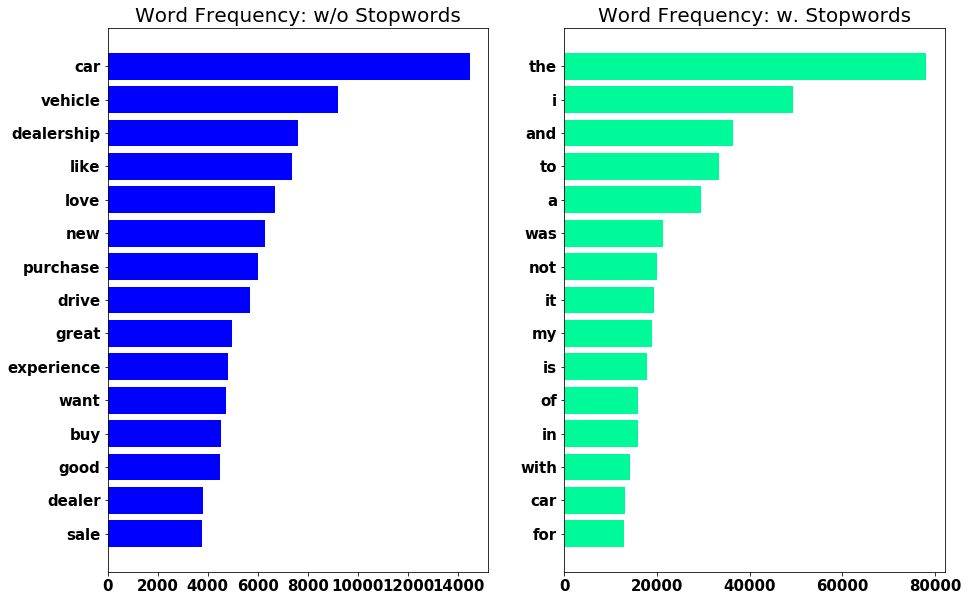

In [13]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)
plt.figure(figsize=(15,10))

# Frequency plot of words w/o stopwords
plt.subplot(1,2,1)
plt.barh(values[:15], counts[:15], color='blue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Word Frequency: w/o Stopwords', fontsize=20)


# Frequency plot of words with stopwords
plt.subplot(1,2,2)
plt.barh(all_values[:15], all_counts[:15], color='mediumspringgreen')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Word Frequency: w. Stopwords', fontsize=20)

plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different.\
2) Words in graph 1 (without stopwords) better describes the themes within the Reviews written

### Wordcloud of Review words (Lemmatized)

In [14]:
# Word Cloud string
clean_review_wordcloud=[]
for i in data['clean_review_lemmatized']:
    clean_review_wordcloud+=i
clean_string = " ".join(clean_review_wordcloud)

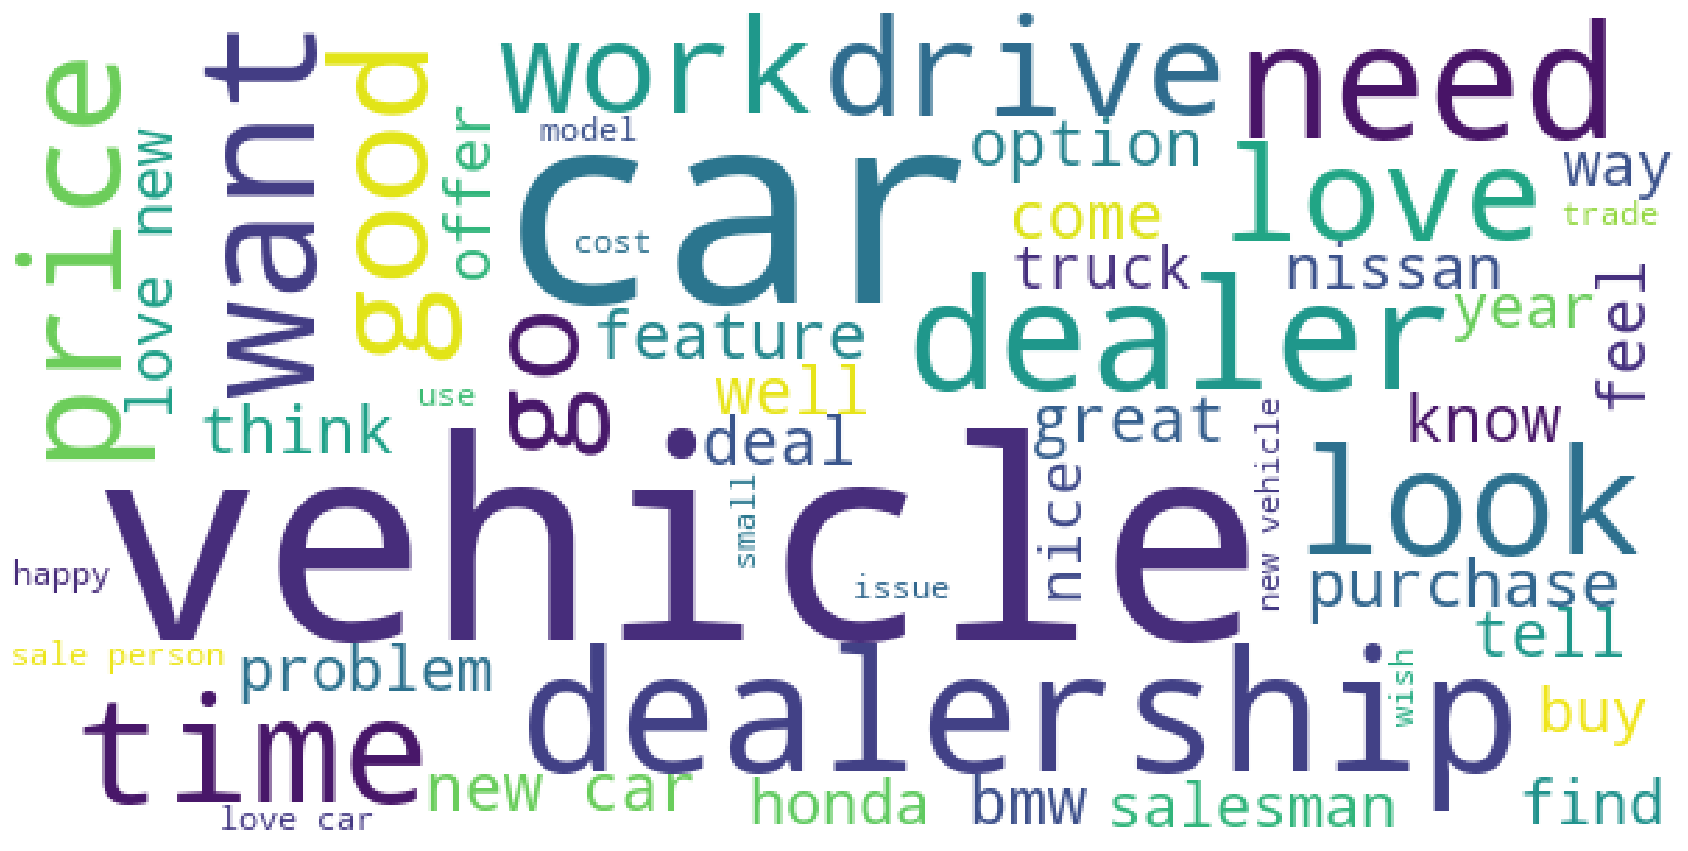

In [15]:
# !pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100, width = 600,height=300,max_words=50, background_color="white").generate(clean_string)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,50))
plt.imshow(wordcloud)
plt.axis(False)
plt.show()

### Word Frequency by Sentimentiment Groups

In [16]:
data.columns

Index(['ID', 'Verbatim', 'word_count', 'review_tokenized', 'Bucket',
       'clean_review_lemmatized'],
      dtype='object')

In [18]:
# grouby sentiment
grouped_text = data.groupby('Bucket')['clean_review_lemmatized']

# Fetch entire tokenized text for specific group
from itertools import chain
frequent_words_sentiment_df = pd.DataFrame(columns={"values", "counts", 'Bucket'})

for num in np.unique(data['Bucket']):  # 6 Sentiment levels
#     print(num)
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    # Create single List of Tokenized Reviews; lazily evaluates by taking a single iterable argument at a time
                               
    sorted_indices = np.argsort(-counts)  # returns indices of sorted 'counts' in reversed order    
    frequent_words_sentiment_df = frequent_words_sentiment_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], 'Bucket': num}, ignore_index=True)
    # Append word values in decreasing count order grouped by sentiment

frequent_words_sentiment_df  # words sorted by counts order

values Bucket  \
0  [like, love, car, great, dealership, well, pri...      A   
1  [car, love, vehicle, dealership, like, great, ...      B   
2  [car, vehicle, dealership, love, like, new, pu...      C   
3  [car, vehicle, dealership, purchase, like, new...      D   
4  [car, vehicle, dealership, like, new, drive, p...      E   
5  [love, like, great, price, car, well, expensiv...      S   

                                              counts  
0  [674, 627, 619, 556, 457, 454, 390, 380, 352, ...  
1  [2075, 1561, 1497, 1456, 1369, 1208, 1123, 109...  
2  [2774, 1915, 1554, 1537, 1415, 1396, 1326, 112...  
3  [3433, 2347, 1807, 1607, 1598, 1460, 1451, 134...  
4  [5325, 2930, 2137, 1957, 1870, 1865, 1825, 151...  
5  [365, 335, 321, 278, 246, 225, 222, 199, 185, ...

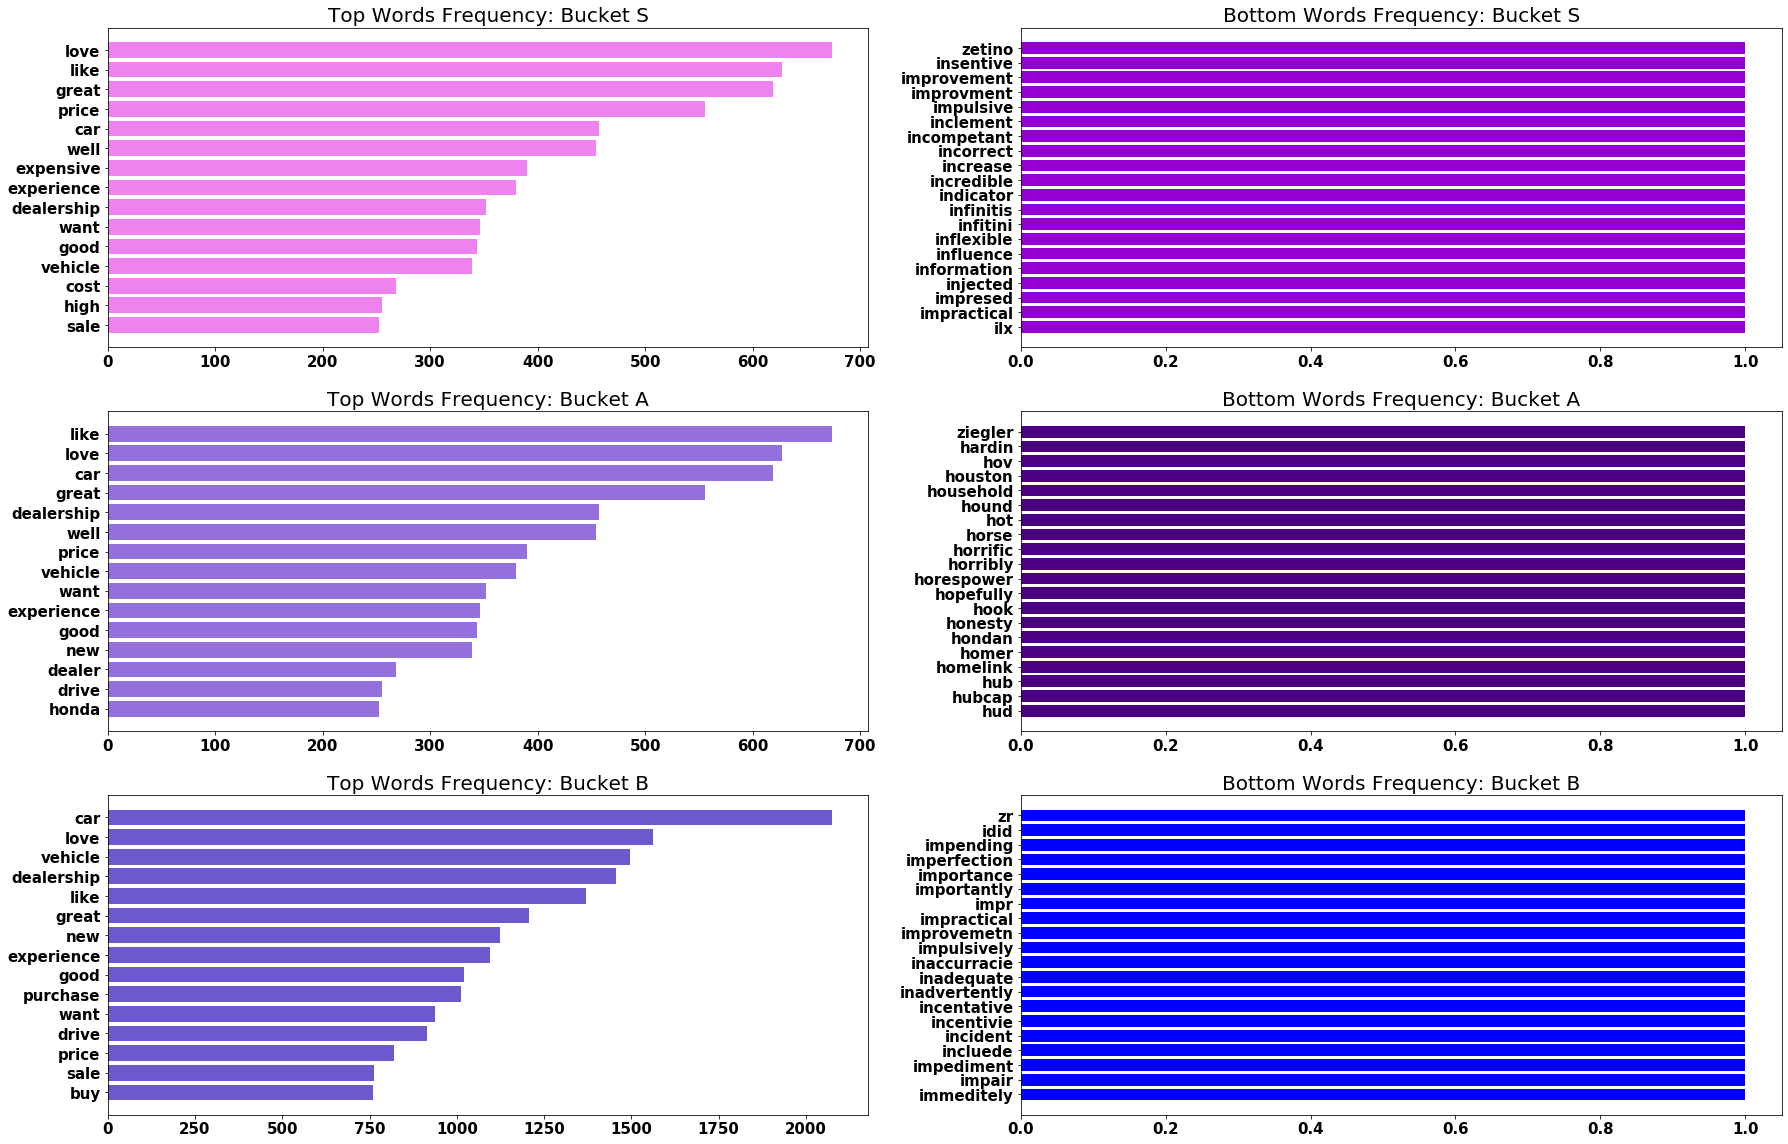

In [19]:
font = {'family' : ' DejaVu Sans', 'weight' : 'bold', 'size': 15}

plt.rc('font', **font)
plt.figure(figsize=(30,20))

plt.subplot(3,2,1)
plt.barh(frequent_words_sentiment_df.loc[5,'values'][:15], frequent_words_sentiment_df.loc[0,'counts'][:15], color='violet')
plt.gca().invert_yaxis()
plt.title('Top Words Frequency: Bucket S', fontsize='20')
plt.yticks(fontsize=15)

plt.subplot(3,2,2)
plt.barh(frequent_words_sentiment_df.loc[5,'values'][::-1][:20], frequent_words_sentiment_df.loc[0,'counts'][::-1][:20], color='darkviolet')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Bottom Words Frequency: Bucket S', fontsize='20')

plt.subplot(3,2,3)
plt.barh(frequent_words_sentiment_df.loc[0,'values'][:15], frequent_words_sentiment_df.loc[0,'counts'][:15], color='mediumpurple')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Top Words Frequency: Bucket A', fontsize='20')

plt.subplot(3,2,4)
plt.barh(frequent_words_sentiment_df.loc[0,'values'][::-1][:20], frequent_words_sentiment_df.loc[0,'counts'][::-1][:20], color='indigo')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Bottom Words Frequency: Bucket A', fontsize='20')

plt.subplot(3,2,5)
plt.barh(frequent_words_sentiment_df.loc[1,'values'][:15], frequent_words_sentiment_df.loc[1,'counts'][:15], color='slateblue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Top Words Frequency: Bucket B', fontsize='20')

plt.subplot(3,2,6)
plt.barh(frequent_words_sentiment_df.loc[1,'values'][::-1][:20], frequent_words_sentiment_df.loc[1,'counts'][::-1][:20], color='blue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Bottom Words Frequency: Bucket B', fontsize='20')

plt.show()

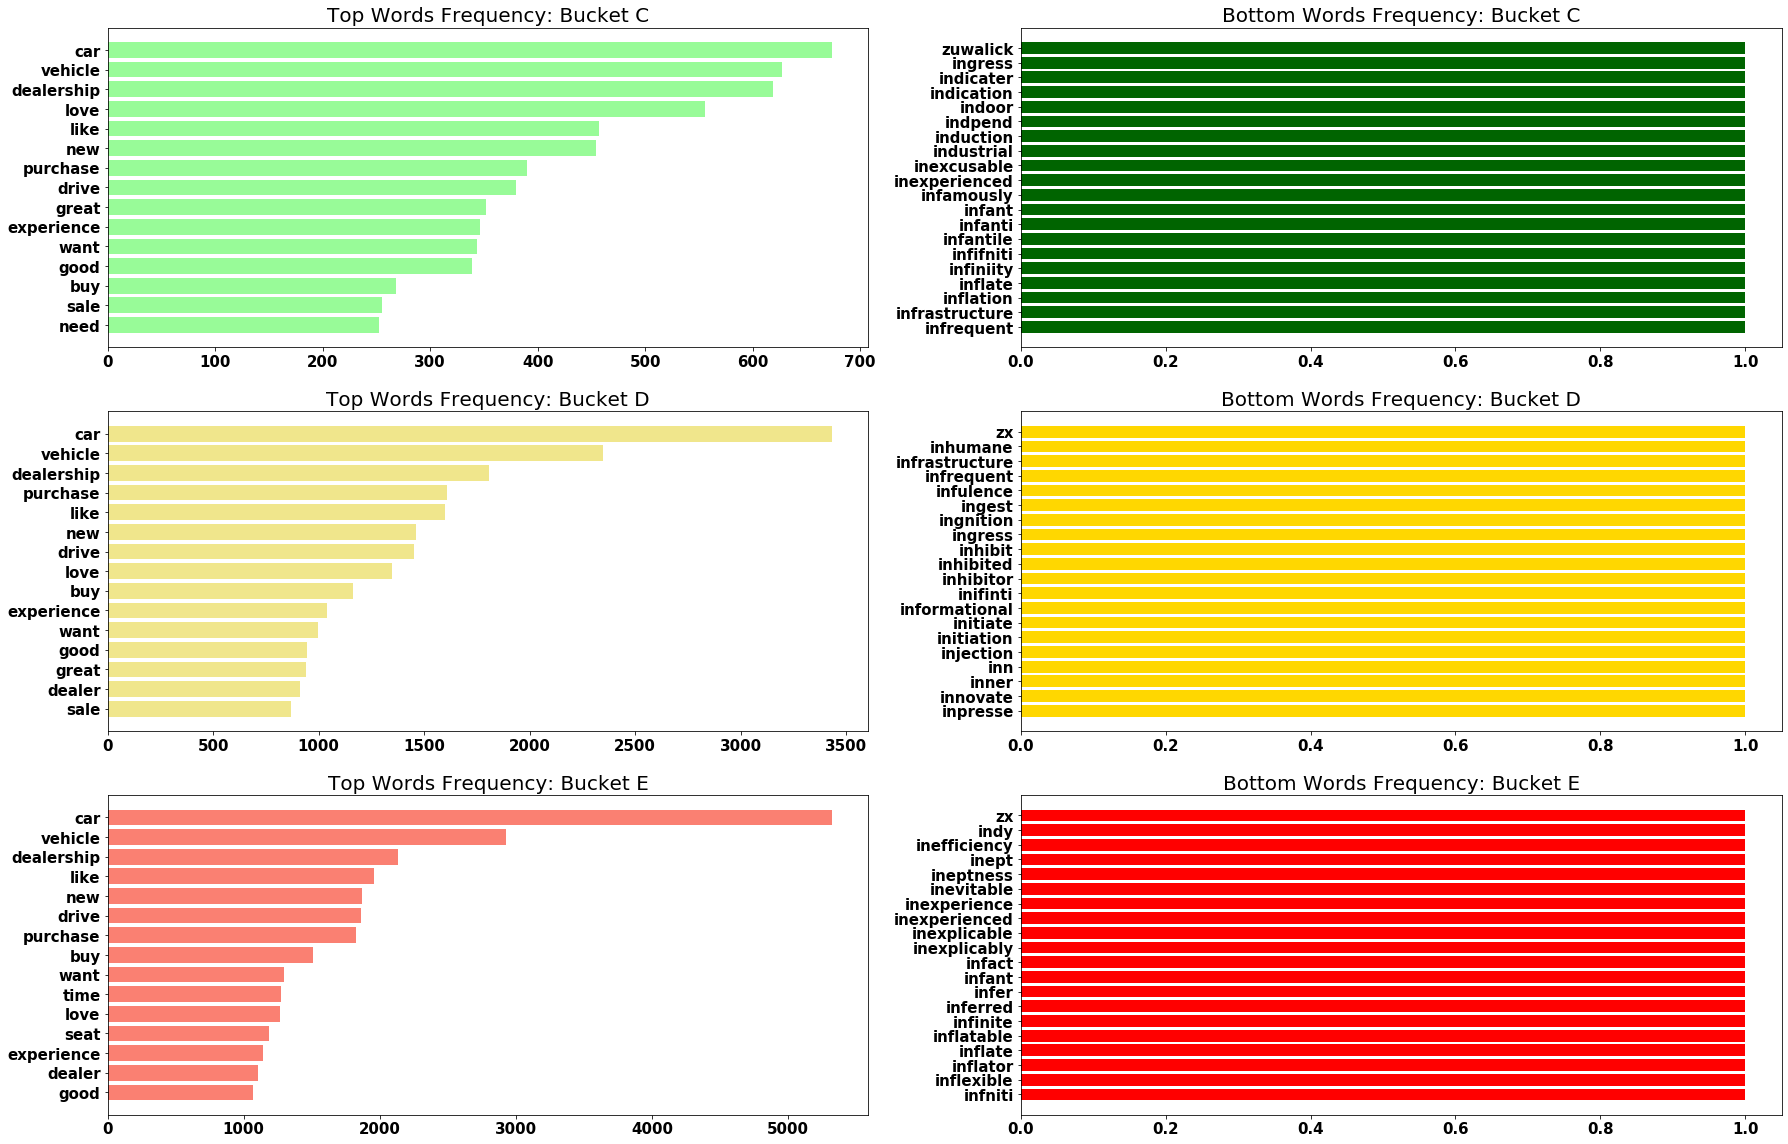

In [20]:
font = {'family' : ' DejaVu Sans', 'weight' : 'bold', 'size': 15}

plt.rc('font', **font)
plt.figure(figsize=(30,20))

plt.subplot(3,2,1)
plt.barh(frequent_words_sentiment_df.loc[2,'values'][:15], frequent_words_sentiment_df.loc[0,'counts'][:15], color='palegreen')
plt.gca().invert_yaxis()
plt.title('Top Words Frequency: Bucket C', fontsize='20')
plt.yticks(fontsize=15)

plt.subplot(3,2,2)
plt.barh(frequent_words_sentiment_df.loc[2,'values'][::-1][:20], frequent_words_sentiment_df.loc[0,'counts'][::-1][:20], color='darkgreen')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Bottom Words Frequency: Bucket C', fontsize='20')

plt.subplot(3,2,3)
plt.barh(frequent_words_sentiment_df.loc[3,'values'][:15], frequent_words_sentiment_df.loc[3,'counts'][:15], color='khaki')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Top Words Frequency: Bucket D', fontsize='20')

plt.subplot(3,2,4)
plt.barh(frequent_words_sentiment_df.loc[3,'values'][::-1][:20], frequent_words_sentiment_df.loc[3,'counts'][::-1][:20], color='gold')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Bottom Words Frequency: Bucket D', fontsize='20')

plt.subplot(3,2,5)
plt.barh(frequent_words_sentiment_df.loc[4,'values'][:15], frequent_words_sentiment_df.loc[4,'counts'][:15], color='salmon')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Top Words Frequency: Bucket E', fontsize='20')

plt.subplot(3,2,6)
plt.barh(frequent_words_sentiment_df.loc[4,'values'][::-1][:20], frequent_words_sentiment_df.loc[4,'counts'][::-1][:20], color='red')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Bottom Words Frequency: Bucket E', fontsize='20')

plt.show()

#### Observations:
1. Generic words common to both Sentiment reviews cloud the differences between the Buckets (top words common to both: 'car','vehicle', 'dealership' etc.

2. Difference in Frequency of Context Words between Buckets.

3. Negative words are less frequent, more Unique.

Goal: Create Dictionary of Unique Words, Words below 30%tile frequency per Bucket

In [58]:
import math
sentence_length = (frequent_words_sentiment_df.loc[0,'values'].size)
index_50 = math.ceil(sentence_length*0.5)
# print(f"This is {frequent_words_sentiment_df.loc[0, 'values'][index_50]}")

Text(0.5, 1.02, 'Word Frequency per Bucket')

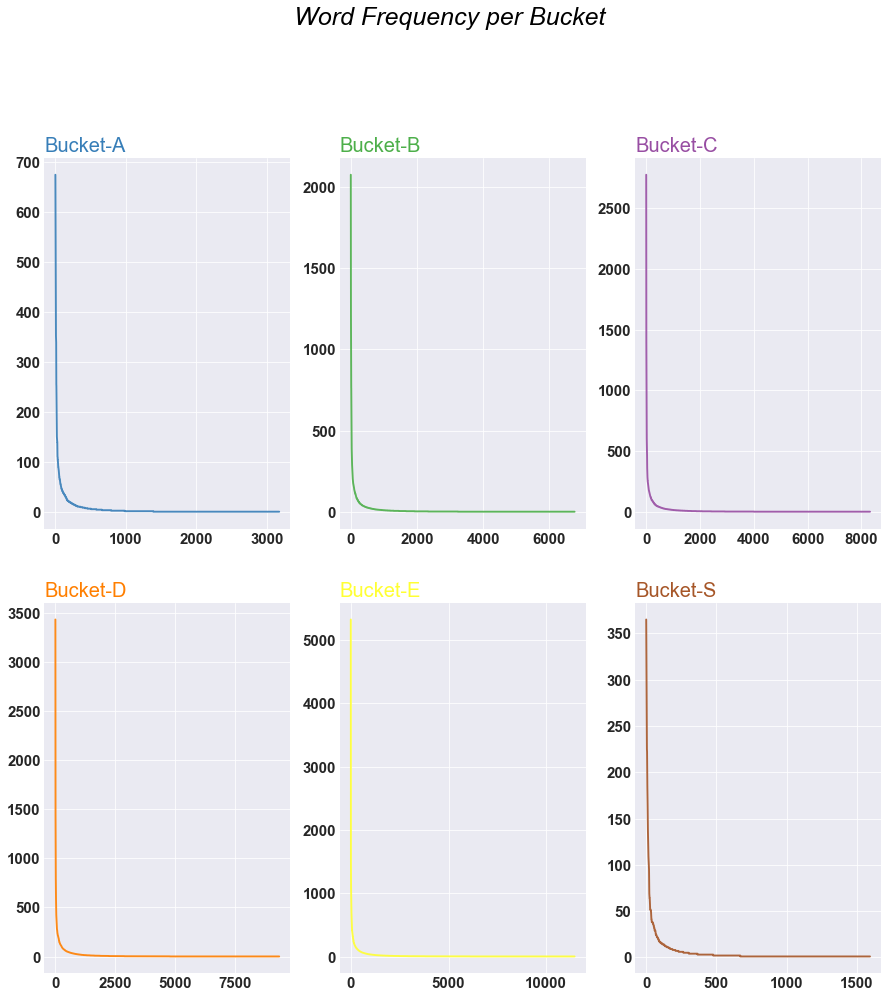

In [62]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
# frequent_words_sentiment_df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure
plt.figure(figsize=(15, 15))
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for idx in range(frequent_words_sentiment_df.shape[0]):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
    
    y_val = frequent_words_sentiment_df['counts'][idx]
    x_val = list(range(len(frequent_words_sentiment_df['counts'][idx])))
    lab = frequent_words_sentiment_df['Bucket'][idx]
    
    # Plot the lineplot
    plt.plot(x_val, y_val, marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=lab)
 
    # Same limits for everybody!
#     plt.xlim(0,10)
#     plt.ylim(-2,22)
 
    # Not ticks everywhere
#     if num in range(7) :
#         plt.tick_params(labelbottom='off')
#     if num not in [1,4,7] :
#         plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(f"Bucket-{lab}", loc='left', fontsize=20, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("Word Frequency per Bucket", fontsize=25, fontweight=0, color='black', style='italic', y=1.02)
 
# # Axis title
# plt.text(0.5, 0.02, 'Time', ha='center', va='center')
# plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

In [77]:
# Word Cut-off Point for A, B, C, D, E ,S
cutoff = [20, 100, 100, 100, 200, 10]
unique_words = []
for i in range(frequent_words_sentiment_df.shape[0]):
    idx = frequent_words_sentiment_df['counts'][i]<=cutoff[i]
    unique_words.extend(frequent_words_sentiment_df['values'][i][idx])

In [79]:

print(f"Total Number of Unique Words: {len(unique_words)}\n")
print(unique_words[:50])
print(unique_words[::-1][:50])

Total Number of Unique Words: 39531

['hybrid', 'consumer', 'simply', 'team', 'old', 'take', 'passenger', 'extremely', 'standard', 'preferred', 'rep', 'base', 'absolutely', 'meet', 'close', 'end', 'toyota', 'mercedes', 'term', 'pilot', 'give', 'steering', 'handling', 'trust', 'country', 'trunk', 'rate', 'worth', 'sound', 'mdx', 'pricing', 'auto', 'man', 'inside', 'navigation', 'capacity', 'challenger', 'fall', 'town', 'care', 'safety', 'issue', 'see', 'head', 'knowledgeable', 'delivery', 'cooper', 'cargo', 'availability', 'discount']
['zetino', 'insentive', 'improvement', 'improvment', 'impulsive', 'inclement', 'incompetant', 'incorrect', 'increase', 'incredible', 'indicator', 'infinitis', 'infitini', 'inflexible', 'influence', 'information', 'injected', 'impresed', 'impractical', 'ilx', 'ice', 'house', 'houston', 'hugely', 'hunter', 'hyundai', 'iam', 'idea', 'ilove', 'idiot', 'ifs', 'ignition', 'ignorant', 'igorance', 'iinsure', 'injection', 'insert', 'kinda', 'insight', 'jgc', 'jim',

### Sentiment Analysis using Vader : Lexicon based Sentiment Analyzer

In [38]:
# data = data.drop('clean_review_lemmatized_string', axis=1)
data.columns

Index(['ID', 'Verbatim', 'Raw_Verbatim', 'word_count', 'review_tokenized',
       'Bucket', 'clean_review_lemmatized'],
      dtype='object')

In [40]:
import nltk
# nltk.download('vader_lexicon')

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sent_list = data['Raw_Verbatim']
neg_score=[]
pos_score=[]
neu_score=[]
compd_score=[]
# stop_words = set(stopwords.words('english'))

sid = SentimentIntensityAnalyzer()
for sent in sent_list:
    ss = sid.polarity_scores(sent)
    neg_score.append(ss['neg'])
    pos_score.append(ss['pos'])
    neu_score.append(ss['neu'])
    compd_score.append(ss['compound'])

# Train Data
data['neg_score'] = neg_score
data['pos_score'] = pos_score
data['neu_score'] = neu_score
data['compd_score'] = compd_score

**NOTE** Negative Sentiment == if compd_score < -0.05

In [43]:
data['Negative'] = data['compd_score'].apply(lambda x: 1 if (x <= -0.5) else 0)
data

ID                                           Verbatim  \
0          0  the only reason i did not lease the buick lacr...   
1          1  was not a bmw dealership  i clicked wrong butt...   
2          2                 brand loyalty to chrysler products   
3          3                           i wanted to buy american   
4          4  the one major disappointment i have with with ...   
...      ...                                                ...   
39805  39805                        just as happy as you can be   
39806  39806  road noise is worse then my      honda civic  ...   
39807  39807  i have noticed that i some times get alert mes...   
39808  39808  i am extremely unhappy with the gas mileage th...   
39809  39809  the satellite radio cuts out in some instances...   

                                            Raw_Verbatim  word_count  \
0      The only reason I did not lease the Buick LaCr...          50   
1      was not a BMW dealership, I clicked wrong butt...          16   
2                    Brand loyalty to Chrysler products.           6   
3                               I wanted to buy American           5   
4      The one major disappointment I have with with ...          24   
...                                                  ...         ...   
39805                     Just as happy as you can be...          10   
39806  Road noise is worse then my 2006 Honda Civic. ...          61   
39807  I have noticed that I some times get alert mes...          75   
39808  I am extremely unhappy with the gas mileage th...          86   
39809  .The satellite radio cuts out in some instance...          84   

                                        review_tokenized Bucket  \
0      [the, only, reason, i, did, not, lease, the, b...      C   
1      [was, not, a, bmw, dealership, i, clicked, wro...      B   
2               [brand, loyalty, to, chrysler, products]      A   
3                         [i, wanted, to, buy, american]      S   
4      [the, one, major, disappointment, i, have, wit...      B   
...                                                  ...    ...   
39805                [just, as, happy, as, you, can, be]      A   
39806  [road, noise, is, worse, then, my, honda, civi...      D   
39807  [i, have, noticed, that, i, some, times, get, ...      D   
39808  [i, am, extremely, unhappy, with, the, gas, mi...      D   
39809  [the, satellite, radio, cuts, out, in, some, i...      D   

                                 clean_review_lemmatized  neg_score  \
0      [reason, lease, buick, lacrosse, get, deal, wa...      0.000   
1         [bmw, dealership, click, wrong, button, buick]      0.256   
2                    [brand, loyalty, chrysler, product]      0.000   
3                                  [want, buy, american]      0.000   
4      [major, disappointment, chrysler, ipod, interf...      0.299   
...                                                  ...        ...   
39805                                            [happy]      0.000   
39806  [road, noise, bad, honda, civic, design, featu...      0.173   
39807  [notice, time, alert, message, blis, thing, aw...      0.000   
39808  [extremely, unhappy, gas, mileage, car, get, s...      0.138   
39809  [satellite, radio, cut, instance, ford, focus,...      0.151   

       pos_score  neu_score  compd_score  Negative  
0          0.000      1.000       0.0000         0  
1          0.000      0.744      -0.4767         0  
2          0.467      0.533       0.5423         0  
3          0.000      1.000       0.0000         0  
4          0.000      0.701      -0.7506         1  
...          ...        ...          ...       ...  
39805      0.381      0.619       0.5719         0  
39806      0.042      0.785      -0.7584         1  
39807      0.172      0.828       0.8748         0  
39808      0.000      0.862      -0.8843         1  
39809      0.068      0.782      -0.6929         1  

[39810 rows x 12 columns]

In [45]:
# neg_verbatims = 
for i in range(10):
    print(f"{i}. {data['Raw_Verbatim'][data['Negative']==1].iloc[i]}")
    print(f"neg_score: {data['neg_score'][data['Negative']==1].iloc[i]}")
    print("-"*40, '\n')

0. The one major disappointment I have with with the Chrysler 300, is the ipod interface. It is terrible.
neg_score: 0.299
---------------------------------------- 

1. I love the back up camera and the side warning system.
I really wanted the 8.5" radio screen, but had to settle for the smaller screen.  It was almost a deal breaker but I really wanted a minivan.
I would recommend that the driver floor mat have an extension that would cover the dead pedal for the left foot.  That dead pedal gets so much dirt and wear  but its not covered or protected.
neg_score: 0.232
---------------------------------------- 

2. The vehicle was located in another state and they wanted $900 to transport it to California.  We were prepared to fly and get it but the paperwork proved too difficult for the dealership to handle long distance.  The dealership failed to provided agreed upon documents in a timely manner to faciltate the purchase.
neg_score: 0.129
---------------------------------------- 

3. W

Actual Negatives: 9/10 ; Review 1 was a neutral recommendation

In [46]:
# neg_verbatims = 
for i in range(10):
    print(f"{i}. {data['Raw_Verbatim'][data['Negative']==1][::-1].iloc[i]}")
    print(f"neg_score: {data['neg_score'][data['Negative']==1][::-1].iloc[i]}")
    print("-"*40, '\n')

0. .The satellite radio cuts out in some instances.  My Ford Focus worked in all the areas I drive, This one struggles sometimes.  On really cold mornings it feels like the heating system really struggles warm the cabin up.  
I checked the hwy mileage on a hwy only trip and it was not at 21 MPG per Nissan...closer to 18/19 which is a bit disappointing.
neg_score: 0.151
---------------------------------------- 

1. I am extremely unhappy with the gas mileage that the car gets.  The salesmans selling point of the vehicle was the sticker and the gas mileage it is expected to get.  I have talked to the service department and they have no answers as to why it would be so low.   My main focus on buying a new car was gas mileage and in my opinion this car has failed my expectation and the sticker in the window.
neg_score: 0.138
---------------------------------------- 

2. Road noise is worse then my 2006 Honda Civic.  Some design features are for the worse, cannot close the center compartmen

Actual Negatives: 9/10 ; Review 4 was a parallel negative experience unrelated to the seller.

In [165]:
print(data.shape)
print(sum(data['Negative']))

(39810, 12)
3029


In [51]:
data[['neg_score', 'pos_score', 'neu_score', 'compd_score', 'Negative']].describe()

neg_score     pos_score     neu_score   compd_score      Negative
count  39810.000000  39810.000000  39810.000000  39810.000000  39810.000000
mean       0.054357      0.181259      0.764386      0.290158      0.076086
std        0.102405      0.196984      0.191211      0.499511      0.265140
min        0.000000      0.000000      0.000000     -0.997200      0.000000
25%        0.000000      0.000000      0.655000      0.000000      0.000000
50%        0.000000      0.129000      0.791000      0.385900      0.000000
75%        0.075000      0.291000      0.906000      0.731100      0.000000
max        1.000000      1.000000      1.000000      0.999200      1.000000

In [53]:
print(data['Negative'].value_counts())

0    36781
1     3029
Name: Negative, dtype: int64


### Load Sentinet Corpus to extract Negative words


In [66]:
# senti_df.to_csv('SentiWords_Clean.csv', index=False)
senti_df = pd.read_csv('SentiWords_Clean.csv')
senti_df

Lemma POS  Prior_Polarity_Score
0       .22_caliber   a               0.00000
1       .22_calibre   a               0.00000
2       .22-caliber   a               0.00000
3       .22-calibre   a               0.00000
4               .22   n               0.12208
...             ...  ..                   ...
155282    zymolytic   a              -0.19821
155283      zymosis   n               0.15754
155284      zymotic   a              -0.08847
155285      zymurgy   n               0.00000
155286       zyrian   n               0.00000

[155287 rows x 3 columns]

In [67]:
senti_df.describe(exclude='object')

Prior_Polarity_Score
count         155287.000000
mean              -0.009101
std                0.128313
min               -0.934890
25%                0.000000
50%                0.000000
75%                0.000000
max                0.894890

In [69]:
print(senti_df.describe(include='object'), '\n')
print(senti_df['POS'].value_counts())

         Lemma     POS
count   155284  155287
unique  147303       4
top       solo       n
freq         4  117798 

n    117798
a     21479
v     11529
r      4481
Name: POS, dtype: int64


In [78]:
senti_df.dtypes

Lemma                    object
POS                      object
Prior_Polarity_Score    float64
dtype: object

In [82]:
senti_df['Lemma'].apply(lambda x: print(x))

.22_caliber
.22_calibre
.22-caliber
.22-calibre
.22
.38_caliber
.38_calibre
.38-caliber
.38-calibre
.45_caliber
.45_calibre
.45-caliber
.45-calibre
0
0
1_chronicles
1_esdras
1_kings
1_maccabees
1_samuel
1-dodecanol
1-hitter
1
1
10-membered
10
10
100
100
1000
1000
10000
100000
1000000
1000000000
1000000000000
1000th
100th
101
101st
105
105th
10th
11_november
11-plus
11
11
110
110th
115
115th
11th
12-tone_music
12-tone_system
12
12
120
120
120th
125
125th
12th
13
13
130
130th
135
135th
13th
14_july
14
14
140
140th
144
145
145th
14th
15_august_1945
15_may_organization
15_minutes
15
15
150
150th
1530s
155
155th
15th
16_pf
16
16
160
160th
165
165th
16th
17_november
17
17
170
170th
1728
175
1750s
175th
1760s
1770s
1780s
1790s
17th
18-karat_gold
18
18
180
180th
1820s
1830s
1840s
1850s
1860s
1870s
1880s
1890s
18th
19
19
190
1900s
190th
1920s
1930s
1940s
1950s
1960s
1970s
1980s
1990s
19th
1st_baron_beaverbrook
1st_baron_verulam
1st_class
1st_earl_attlee
1st_earl_baldwin_of_bewdley
1st_earl_of_b

adjacent
adjectival
adjectivally
adjective
adjective
adjectively
adjoin
adjoining_room
adjourn
adjournment
adjudge
adjudicate
adjudication
adjudicative
adjudicator
adjudicatory
adjunct
adjunct
adjunction
adjunctive
adjuration
adjuratory
adjure
adjust
adjustable_spanner
adjustable_wrench
adjustable
adjusted
adjuster
adjusting_entry
adjustive
adjustment
adjustor
adjutant_bird
adjutant_general
adjutant_stork
adjutant
adjuvant
adjuvant
adlai_ewing_stevenson
adlai_stevenson
adlumia_fungosa
adlumia
adman
admass
admeasure
administer
administrable
administrate
administration
administrative_body
administrative_data_processing
administrative_district
administrative_division
administrative_hearing
administrative_law
administrative_official
administrative_unit
administrative
administratively
administrator
administrivia
admirability
admirable
admirableness
admirably
admiral_byrd
admiral_dewey
admiral_nelson
admiral_nimitz
admiral
admiralty_brass
admiralty_island
admiralty_islands
admiralty_law
admi

alloy
alloy
alloyed
allspice_tree
allspice
allude
allure
allure
allurement
alluring
allusion
allusive
allusiveness
alluvial_cone
alluvial_deposit
alluvial_fan
alluvial_flat
alluvial_plain
alluvial_sediment
alluvial_soil
alluvial
alluviation
alluvion
alluvium
ally_with
ally
ally
allyl_alcohol
allyl_group
allyl_radical
allyl_resin
allyl
allylic
alma_mater
alma-ata
almanac
almandine
almandite
almaty
almighty
almighty
almond_cookie
almond_crescent
almond_extract
almond_moth
almond_oil
almond_tree
almond_willow
almond-eyed
almond-leaves_willow
almond-scented
almond-shaped
almond
almoner
almoravid
almost
alms_box
alms_dish
alms_tray
alms-giving
alms
almsgiver
almsgiving
alnico
alnus_crispa
alnus_glutinosa
alnus_incana
alnus_maritima
alnus_rhombifolia
alnus_rubra
alnus_rugosa
alnus_serrulata
alnus_veridis_crispa
alnus_veridis
alnus_vulgaris
alnus
alocasia_macrorrhiza
alocasia
aloe_family
aloe_ferox
aloe_vera
aloe
aloeaceae
aloes
aloft
aloha_state
aloha
alois_senefelder
alone
alone
aloneness
a

antennaria_plantaginifolia
antennaria
antennariidae
antennary
antenuptial
antepartum
antepenult
antepenultima
antepenultimate
antepenultimate
anterior_cardinal_vein
anterior_cerebral_artery
anterior_cerebral_vein
anterior_crural_nerve
anterior_facial_vein
anterior_fontanelle
anterior_horn
anterior_jugular_vein
anterior_labial_veins
anterior_meningeal_artery
anterior_naris
anterior_pituitary_gland
anterior_pituitary
anterior_root
anterior_serratus_muscle
anterior_synechia
anterior_temporal_artery
anterior_vertebral_vein
anterior
anterior
anteriority
anteriorly
anterograde_amnesia
anterograde
anteroom
anthelminthic
anthelminthic
anthelmintic
anthelmintic
anthem
anthemis_arvensis
anthemis_cotula
anthemis_nobilis
anthemis_tinctoria
anthemis
anther
antheraea_mylitta
antheraea_pernyi
antheraea_polyphemus
antheraea
antheral
anthericum_liliago
anthericum_torreyi
anthericum
antheridial
antheridiophore
antheridium
antheropeas_wallacei
antheropeas
antherozoid
anthesis
anthidium
anthill
anthocerop

arthur_holly_compton
arthur_holmes
arthur_honegger
arthur_jacob_arshawsky
arthur_james_balfour
arthur_john_gielgud
arthur_koestler
arthur_laffer
arthur_marx
arthur_meier_schlesinger_jr.
arthur_meier_schlesinger
arthur_miller
arthur_mitchell
arthur_neville_chamberlain
arthur_rimbaud
arthur_robert_ashe
arthur_rubinstein
arthur_schlesinger_jr.
arthur_schlesinger
arthur_schopenhauer
arthur_seymour_sullivan
arthur_stanley_jefferson_laurel
arthur_sullivan
arthur_symons
arthur_tappan
arthur_tatum
arthur_wellesley
arthur
arthurian_legend
arthurian
artichoke_heart
artichoke_plant
artichoke
article_of_clothing
article_of_commerce
article_of_faith
article_of_furniture
article
article
articled
articles_of_agreement
articles_of_confederation
articles_of_incorporation
articular_muscle
articular
articulary
articulate
articulate
articulated_ladder
articulated_lorry
articulated
articulately
articulateness
articulatio_coxae
articulatio_cubiti
articulatio_genus
articulatio_humeri
articulatio_plana
articu

azoic
azoimide
azolla_caroliniana
azolla
azollaceae
azonal
azonic
azores
azotaemia
azote
azotemia
azotemic
azotic
azoturia
azt
aztec_lily
aztec_marigold
aztec
aztecan
aztreonam
azure_aster
azure
azure
azure
azurite
azygos_vein
azygos
azygous_vein
azygous
azymia
b_battery
b_cell
b_complex
b_horizon
b_lymphocyte
b_vitamin
b-52
b-complex_vitamin
b-flat_clarinet
b-girl
b-horizon
b-meson
b-scan_ultrasonography
b._b._king
b._f._skinner
b.c.
b.c.e.
b.o.
b.t.u.
b.th.u.
b
ba
baa-lamb
baa
baa
baader_meinhof_gang
baader-meinhof_gang
baal_merodach
baal
baas
baba_au_rhum
baba
babacu_oil
babar
babassu_nut
babassu_oil
babassu_palm
babassu
babbitt_metal
babbitt
babbitt
babbitting
babble_out
babble
babble
babbler
babbling
babe_didrikson
babe_ruth
babe_zaharias
babe
babel
babelike
babesiidae
babies'_slippers
babies'-breath
babinski_reflex
babinski_sign
babinski
babiroussa
babirusa
babirussa
babka
baboo
baboon
baboonish
babu
babushka
baby_bed
baby_bird
baby_blue-eyes
baby_boom
baby_boomer
baby_buggy
baby

beastly
beat_a_retreat
beat_about
beat_around_the_bush
beat_back
beat_down
beat_generation
beat_in
beat_out
beat_up
beat-up
beat
beat
beat
beatable
beaten-up
beaten
beater
beatific
beatification
beatified
beatify
beating-reed_instrument
beating
beatitude
beatles
beatnik
beatniks
beatrice_lillie
beatrice_webb
beatrice
beats_per_minute
beats
beau_brummell
beau_geste
beau_ideal
beau_monde
beau
beaufort_scale
beaufort_sea
beaugregory
beaujolais
beaumont
beaumontia_grandiflora
beaumontia
beaut
beauteous
beauteousness
beautician
beautification
beautiful
beautifully
beautify
beauty_bush
beauty_consultant
beauty_parlor
beauty_parlour
beauty_quark
beauty_salon
beauty_shop
beauty_sleep
beauty_spot
beauty_treatment
beauty
beauvoir
beaux_arts
beaver_away
beaver_board
beaver_fur
beaver_rat
beaver_state
beaver
beaver
beaverbrook
bebop
bebop
becalm
becalmed
bechamel_sauce
bechamel
bechance
becharm
bechtel_crab
bechuana
beck
becker_muscular_dystrophy
becket_bend
becket
beckett
beckley
beckman_thermome

black_book
black_box
black_bread
black_bream
black_bryony
black_buck
black_buffalo
black_calla
black_caraway
black_carpet_beetle
black_cat
black_catechu
black_cherry_tree
black_cherry
black_cock
black_cohosh
black_comedy
black_cottonwood
black_crappie
black_currant
black_cypress_pine
black_death
black_diamond
black_disease
black_duck
black_economy
black_elder
black_elderberry
black_english_vernacular
black_english
black_eye
black_felt_cup
black_flag
black_fly
black_forest
black_fox
black_friar
black_fritillary
black_grama
black_greasewood
black_grouse
black_guillemot
black_gum
black_hand
black_haw
black_hawk
black_hellebore
black_hemlock
black_henbane
black_hickory
black_hills
black_hole_of_calcutta
black_hole
black_hollander
black_horehound
black_huckleberry
black_humor
black_humour
black_ice
black_jack_pershing
black_kite
black_knapweed
black_knot
black_larch
black_lead
black_letter
black_locust
black_lotion
black_lovage
black_lung_disease
black_lung
black_magic
black_maire
black_mal

bouncing_bet
bouncing_betty
bouncing_putty
bouncing
bouncing
bouncy
bound_form
bound_morpheme
bound_off
bound_up
bound
bound
bound
boundary_condition
boundary_layer
boundary_line
boundary
bounded_interval
bounded
boundedness
bounden
bounder
bounderish
boundless
boundlessly
boundlessness
bounds
bounteous
bounteously
bounteousness
bountied
bountiful
bountifully
bountifulness
bounty_hunter
bounty
bouquet
bourbon_dynasty
bourbon
bourdon
bourgeois
bourgeois
bourgeoisie
bourgeon
bourgogne
bourguignon_sauce
bourguignon
bourn
bourne
bourse
bourtree
bouse
boustrophedon
boustrophedonic
bout
bouteloua_eriopoda
bouteloua_gracilis
bouteloua
boutique
boutonneuse_fever
boutonniere
bouvet_island
bouvier_des_flandres
bouviers_des_flandres
bouvines
bouyei
bovid
bovid
bovidae
bovinae
bovine_spongiform_encephalitis
bovine
bovine
bovini
bovril
bow_and_arrow
bow_down
bow_leg
bow_legs
bow_out
bow_tie
bow_window
bow_wood
bow-tie
bow-wow
bow
bow
bowditch
bowdler
bowdlerisation
bowdlerise
bowdleriser
bowdlerism

burgoyne
burgrass
burgrave
burgundy_sauce
burgundy_wine
burgundy
burhinidae
burhinus_oedicnemus
burhinus
burial_chamber
burial_garment
burial_ground
burial_mound
burial_site
burial_vault
burial
buried
burin
burk
burka
burke
burke
burked
burkina_faso_franc
burkina_faso
burl
burl
burlap_bag
burlap
burled
burlesque
burlesque
burlesque
burlington
burly
burma_padauk
burma
burmannia
burmanniaceae
burmeisteria_retusa
burmeisteria
burmese_cat
burmese_rosewood
burmese-yi
burmese
burmese
burn_bag
burn_center
burn_down
burn_mark
burn_off
burn_out
burn_plant
burn_up
burn
burn
burnability
burnable
burned-out
burned-over
burned
burner
burnet_bloodwort
burnett
burnham
burning_at_the_stake
burning_bush
burning
burning
burnish
burnish
burnished
burnoose
burnous
burnouse
burns
burnside
burnt_lime
burnt_sienna
burnt_umber
burnt-out
burnt
burnup
burp_gun
burp
burp
burping
burqa
burr_drill
burr_marigold
burr_oak
burr-headed
burr
burr
burrawong
burred
burrfish
burrhus_frederic_skinner
burrill_bernard_crohn


capital_of_portugal
capital_of_qatar
capital_of_red_china
capital_of_rhode_island
capital_of_romania
capital_of_rwanda
capital_of_san_marino
capital_of_saudi_arabia
capital_of_senegal
capital_of_serbia_and_montenegro
capital_of_seychelles
capital_of_sierra_leone
capital_of_singapore
capital_of_slovakia
capital_of_somalia
capital_of_south_africa
capital_of_south_carolina
capital_of_south_dakota
capital_of_south_korea
capital_of_spain
capital_of_sri_lanka
capital_of_sudan
capital_of_suriname
capital_of_swaziland
capital_of_sweden
capital_of_switzerland
capital_of_syria
capital_of_taiwan
capital_of_tajikistan
capital_of_tanzania
capital_of_tennessee
capital_of_texas
capital_of_thailand
capital_of_the_bahamas
capital_of_the_dominican_republic
capital_of_the_netherlands
capital_of_the_philippines
capital_of_the_russian_federation
capital_of_the_ukraine
capital_of_the_united_kingdom
capital_of_the_united_states
capital_of_tibet
capital_of_togo
capital_of_trinidad_and_tobago
capital_of_tunisi

centroid
centroidal
centrolobium_robustum
centrolobium
centromere
centromeric
centropistes_striata
centropomidae
centropomus
centropristis_philadelphica
centropristis
centropus_phasianinus
centropus_sinensis
centropus
centrosema_virginianum
centrosema
centrosome
centrosomic
centrospermae
centrosymmetric
centrum
centunculus
centurion
century_plant
century
ceo
cephalalgia
cephalanthera_rubra
cephalanthera
cephalaspid
cephalaspida
cephalexin
cephalhematoma
cephalic_index
cephalic_vein
cephalic
cephalitis
cephalobidae
cephalochordata
cephalochordate
cephaloglycin
cephalohematoma
cephalometry
cephalopod_mollusk
cephalopod
cephalopod
cephalopoda
cephalopodan
cephalopterus_ornatus
cephalopterus
cephaloridine
cephalosporin
cephalotaceae
cephalotaxaceae
cephalotaxus
cephalothin
cephalotus_follicularis
cephalotus
cepheus
cepphus_columba
cepphus_grylle
cepphus
cer
cerambycidae
ceramic_ware
ceramic
ceramic
ceramicist
ceramics
ceramist
cerapteryx_graminis
cerapteryx
ceras
cerastes_cornutus
cerastes

choreographer
choreographic
choreography
choric
chorine
chorioallantoic_membrane
chorioallantois
choriomeningitis
chorion
chorionic_villus_biopsy
chorionic_villus_sampling
chorionic_villus
chorionic
chorioretinitis
choriotis_australis
choriotis
chorister
chorizagrotis_auxiliaris
chorizagrotis
chorizema
chorizo
choroid_coat
choroid_plexus
choroid_vein
choroid
choroidal_artery
choropleth_map
chortle
chortle
chorus_frog
chorus_girl
chorus_line
chorus
chorus
chosen_people
chosen
chou_dynasty
chou_en-lai
chou
chough
chouse
chow_chow
chow_dynasty
chow_line
chow_mein
chow
chowchow
chowder
chrestomathy
chris_evert
chrism
chrisom
chrissie_evert
christ_plant
christ_thorn
christ_within
christ's_resurrection
christ's-thorn
christ
christchurch
christella
christen
christendom
christening
christiaan_eijkman
christiaan_huygens
christian_bible
christian_church
christian_dior
christian_era
christian_friedrich_hebbel
christian_friedrich_schonbein
christian_holy_day
christian_huygens
christian_johann_dopp

coca_cola
coca_plant
coca
cocain
cocaine_addict
cocaine_addiction
cocaine
cocainise
cocainize
cocarboxylase
coccal
cocci
coccid_insect
coccidae
coccidia
coccidioidomycosis
coccidiomycosis
coccidiosis
coccidium
coccinellidae
coccobacillus
coccoid
coccoidea
coccothraustes_coccothraustes
coccothraustes
cocculus_carolinus
cocculus
coccus_hesperidum
coccus
coccygeal_nerve
coccygeal_plexus
coccygeal_vertebra
coccygeal
coccyx
coccyzus_erythropthalmus
coccyzus
cochimi
cochin_china
cochin
cochineal_insect
cochineal
cochise
cochlea
cochlear
cochlearia_officinalis
cochlearia
cochlearius_cochlearius
cochlearius
cochon_de_lait
cochran
cock_of_the_rock
cock_sucking
cock_up
cock-a-doodle-doo
cock-a-hoop
cock-a-leekie
cock-and-bull_story
cock's_eggs
cock
cock
cockade
cockaigne
cockamamie
cockamamy
cockateel
cockatiel
cockatoo_parrot
cockatoo
cockatrice
cockchafer
cockcroft_and_walton_accelerator
cockcroft_and_walton_voltage_multiplier
cockcroft-walton_accelerator
cockcroft-walton_voltage_multiplier
co

conditioner
conditioning
conditions
condo
condole_with
condole
condolence
condolent
condom
condominium
condonation
condone
condor
condorcet
conduce
conducive
conduct
conduct
conductance_unit
conductance
conducting_wire
conducting
conduction_anaesthesia
conduction_anesthesia
conduction_aphasia
conduction_deafness
conduction
conductive_hearing_loss
conductive
conductivity
conductor
conductress
conduit
condylar_process
condylar
condyle
condylion
condyloid_process
condyloma_acuminatum
condylura_cristata
condylura
cone_cell
cone_clutch
cone_friction_clutch
cone_pepper
cone_shape
cone-bearing
cone-nosed_bug
cone-shaped
cone
cone
coneflower
conelike
conenose_bug
conenose
conepatus_leuconotus
conepatus
conessi
conestoga_wagon
conestoga
coney_island
coney
confab
confab
confabulate
confabulation
confect
confect
confection
confection
confectionary
confectioner
confectionery
confederacy
confederate_army
confederate_flag
confederate_jasmine
confederate_rose_mallow
confederate_rose
confederate_soldi

count_rumford
count
count
countable
countdown
countenance
countenance
counter_check
counter_conditioning
counter_reformation
counter_tube
counter-drill
counter-revolutionist
counter-sabotage
counter
counter
counter
counter
counteract
counteraction
counteractive
counteractively
counterargument
counterattack
counterattack
counterattraction
counterbalance
counterbalance
counterbalanced
counterbattery_fire
counterblast
counterblow
counterbombardment
counterbore
counterchallenge
counterchange
countercharge
countercheck
countercheck
counterclaim
counterclaim
counterclockwise_rotation
counterclockwise
counterclockwise
countercoup
counterculture
countercurrent
counterdemonstration
counterdemonstrator
counterespionage
counterexample
counterfactual
counterfactuality
counterfeit
counterfeit
counterfeit
counterfeiter
counterfire
counterfoil
counterglow
counterinsurgency
counterinsurgent
counterintelligence
counterintuitive
counterintuitively
counterirritant
counterman
countermand
countermand
count

cutaway
cutback
cutch
cute
cutely
cuteness
cuterebra
cuterebridae
cuticle
cuticula
cuticular
cutin
cutinize
cutis
cutlas
cutlass
cutlassfish
cutleaved_coneflower
cutler
cutlery
cutlet
cutoff_saw
cutoff
cutout
cutpurse
cuttable
cutter
cutthroat
cutthroat
cutting_angle
cutting_board
cutting_edge
cutting_implement
cutting_off
cutting_out
cutting_room
cutting_tool
cutting-edge
cutting
cutting
cuttingly
cuttle
cuttlefish
cutty_stool
cutwork
cutworm
cuvier
cuzco
cv
cv
cva
cwm
cwt
cx
cxl
cxlv
cxv
cxx
cxxv
cxxx
cxxxv
cy_pres_doctrine
cy_pres
cy_young
cyamopsis_psoraloides
cyamopsis_tetragonolobus
cyamopsis
cyamus
cyan
cyan
cyanamid
cyanamide
cyanic_acid
cyanide_group
cyanide_poisoning
cyanide_process
cyanide_radical
cyanide
cyanine_dye
cyanite
cyano_group
cyano_radical
cyanobacteria
cyanobacterial
cyanocitta_cristata
cyanocitta
cyanocobalamin
cyanogen
cyanogenetic
cyanogenic
cyanohydrin
cyanophyceae
cyanophyta
cyanophyte
cyanosis
cyanuramide
cyanuric_acid
cyathea_medullaris
cyathea
cyatheaceae

delineative
delinquency
delinquent
delinquent
deliquesce
deliquescent
deliquium
delirious
deliriously
delirium_tremens
delirium
delist
delius
deliver_the_goods
deliver
deliverable
deliverable
deliverance
deliverer
delivery_boy
delivery_truck
delivery_van
delivery
deliveryman
dell
delmonico_steak
delocalize
delonix_regia
delonix
delorme
delouse
delphi
delphian
delphic_oracle
delphic
delphinapterus_leucas
delphinapterus
delphinidae
delphinium_ajacis
delphinium
delphinus_delphis
delphinus
delta_hepatitis
delta_iron
delta_ray
delta_rhythm
delta_wave
delta_wing
delta
deltasone
deltoid_eminence
deltoid_leaf
deltoid_muscle
deltoid_tuberosity
deltoid
deltoid
delude
deluge
deluge
delusion
delusional_disorder
delusional
delusions_of_grandeur
delusions_of_persecution
delusive
delusively
delusory
deluxe
delve
demagnetisation
demagnetise
demagnetization
demagnetize
demagog
demagogic
demagogical
demagogue
demagoguery
demagogy
demand_deposit
demand_feeding
demand_for_explanation
demand_for_identifica

disarmament
disarmer
disarming
disarming
disarrange
disarranged
disarrangement
disarray
disarray
disarrayed
disarticulate
disassemble
disassembly
disassociate
disassociation
disassortative_mating
disaster_area
disaster
disastrous
disastrously
disavow
disavowable
disavowal
disband
disbandment
disbar
disbarment
disbelief
disbelieve
disbeliever
disbelieving
disbelievingly
disbud
disburden
disbursal
disburse
disbursement
disburser
disc_brake
disc_drive
disc_harrow
disc_jockey
disc_pack
disc_space
disc-jockey
disc-shaped
disc
discalceate
discalced
discant
discard
discard
discarded
discase
disceptation
discern
discernability
discernable
discernible
discerning
discernment
discerp
discharge_lamp
discharge_pipe
discharge
discharge
discharged
disciform
discina_macrospora
discina
disciotis_venosa
disciple
disciples_of_christ
discipleship
disciplinal
disciplinarian
disciplinary
discipline
discipline
disciplined
disclaim
disclaimer
disclike
disclose
disclosed
disclosure
disco_biscuit
disco_music
di

draw_near
draw_off
draw_out
draw_play
draw_poker
draw_rein
draw_the_line
draw_together
draw_up
draw
draw
drawback
drawbar
drawbridge
drawee
drawer
drawers
drawing_board
drawing_card
drawing_chalk
drawing_ink
drawing_lots
drawing_off
drawing_paper
drawing_pin
drawing_power
drawing_room
drawing_string
drawing_table
drawing-room_car
drawing
drawknife
drawl
drawl
drawler
drawn_butter
drawn-out
drawn
drawnwork
drawshave
drawstring_bag
drawstring
dray_horse
dray
drayhorse
dread
dread
dread
dreaded
dreadful
dreadfully
dreadfulness
dreadlock
dreadnaught
dreadnought
dream_up
dream
dream
dreamed
dreamer
dreamfully
dreamily
dreaminess
dreaming
dreamland
dreamless
dreamlike
dreamworld
dreamy
drear
drearily
dreariness
dreary
dreck
dred_scott
dredge_up
dredge
dredge
dredger
dredging_bucket
dreg
dregs
dreiser
dreissena_polymorpha
dreissena
drench
drenched_in
drenched
drenching
drepanididae
drepanis
drepanocytic_anaemia
drepanocytic_anemia
dresden
dress_blues
dress_circle
dress_code
dress_down
dress_h

eitchen_midden
either
ejaculate
ejaculate
ejaculation
ejaculator
ejaculatory_duct
eject
ejection_seat
ejection
ejector_seat
ejector
ekbom_syndrome
eke_out
ekg
ekman
el_aaium
el_alamein
el_beda
el_caudillo
el_cid
el_dorado
el_giza
el_greco
el_iskandriyah
el_libertador
el_misti
el_muerto
el_nino_southern_oscillation
el_nino
el_paso
el_qahira
el_salvador
el_salvadoran_colon
el_salvadoran_monetary_unit
el-aksur
el
ela
elaborate
elaborate
elaborated
elaborately
elaborateness
elaboration
elaeagnaceae
elaeagnus_augustifolia
elaeagnus_commutata
elaeagnus_latifolia
elaeagnus
elaeis_guineensis
elaeis_oleifera
elaeis
elaeocarpaceae
elaeocarpus_family
elaeocarpus_grandis
elaeocarpus
elaeostearic_acid
elagatis_bipinnulata
elagatis
elaidic_acid
elam
elamite
elamitic
elan_vital
elan
eland
elanoides_forficatus
elanoides
elanus_leucurus
elanus
elaphe_guttata
elaphe_obsoleta
elaphe
elaphure
elaphurus_davidianus
elaphurus
elapid_snake
elapid
elapidae
elapse
elapsed_time
elapsed
elasmobranch
elasmobranchi

equipment
equipoise
equipoised
equipotent
equipped
equipping
equiprobable
equipt
equisetaceae
equisetales
equisetatae
equisetum_arvense
equisetum_fluviatile
equisetum_hyemale_robustum
equisetum_hyemale
equisetum_palustre
equisetum_robustum
equisetum_sylvaticum
equisetum_variegatum
equisetum
equitable
equitably
equitation
equity_credit_line
equity
equivalence
equivalent_weight
equivalent_word
equivalent-binary-digit_factor
equivalent
equivalent
equivocal
equivocally
equivocalness
equivocate
equivocation
equivocator
equus_asinus
equus_burchelli
equus_caballus_gomelini
equus_caballus_przevalskii
equus_caballus_przewalskii
equus_caballus
equus_grevyi
equus_hemionus_hemionus
equus_hemionus
equus_kiang
equus_quagga
equus_zebra_zebra
equus
er
era
eradicable
eradicate
eradication
eradicator
eragrostic_abyssinica
eragrostis_curvula
eragrostis_tef
eragrostis
eranthis_hyemalis
eranthis
erasable_programmable_read-only_memory
erasable
erase
eraser
erasmian
erasmus
erastianism
erasure
erato
eratosth

face_lifting
face_mask
face_off
face_pack
face_powder
face_recognition
face_saver
face_saving
face_soap
face_the_music
face_time
face_to_face
face_towel
face_up
face_value
face_veil
face-amount_certificate_company
face-harden
face-lift
face-off
face-saving
face-to-face
face-to-face
face
face
faced
faceless
facelift
faceplate
facer
facet_plane
facet
faceted
facetious
facetiously
facetiousness
facia
facial_artery
facial_expression
facial_gesture
facial_hair
facial_index
facial_muscle
facial_nerve
facial_profiling
facial_recognition
facial_tissue
facial_vein
facial
facial
facially
facile
facilitate
facilitation
facilitative
facilitator
facilitatory
facility
facing_pages
facing
facsimile_machine
facsimile
facsimile
fact_mood
fact-finding
fact
faction
factious
factitious
factoid
factor_analyse
factor_analysis
factor_analytic
factor_analytical
factor_analyze
factor_i
factor_ii
factor_iii
factor_in
factor_iv
factor_ix
factor_of_proportionality
factor_of_safety
factor_out
factor_v
factor_vii
f

fear
fear
fearful
fearfully
fearfulness
fearless
fearlessly
fearlessness
fearsome
fearsomely
feasibility
feasible
feasibleness
feasibly
feast_day
feast_of_booths
feast_of_dedication
feast_of_dormition
feast_of_lights
feast_of_sacrifice
feast_of_tabernacles
feast_of_the_circumcision
feast_of_the_dedication
feast_of_the_unleavened_bread
feast_of_weeks
feast_one's_eyes
feast
feast
feasting
feat
feather_ball
feather_bed
feather_boa
feather_geranium
feather_one's_nest
feather_palm
feather_reed_grass
feather_star
feather-foil
feather
feather
featherbed
featherbed
featherbedding
featherbrained
feathered
featheredge
featheredged
featherfoil
featheriness
feathering
featherless
featherlike
feathertop_grass
feathertop
featherweight
feathery
feature_article
feature_film
feature_of_speech
feature
feature
featured
featureless
feb_2
feb
febricity
febrifuge
febrile
febrility
february_12
february_14
february_2
february_22
february_29
february_daphne
february_revolution
february
fecal_impaction
fecal_ma

flip_over
flip_side
flip-flap
flip-flop
flip-flop
flip
flip
flip
flippancy
flippant
flippantly
flipper-like
flipper
flirt_with
flirt
flirt
flirtation
flirtatious
flirtatiously
flirting
flit
flit
flitch
flitter
flittering_scotoma
flnc
flo_ziegfeld
float
float
floatation
floater
floating_bridge
floating_dock
floating_dry_dock
floating_fern
floating_mine
floating_policy
floating_voter
floating-moss
floating-point_notation
floating-point_number
floating-point_operation
floating-point_representation_system
floating
floating
floatplane
floaty
floc
floccose_chanterelle
floccose
flocculate
flocculation
floccule
flocculent
flock
flock
flodden
floe
flog
flogger
flogging
flood_control
flood_in
flood_lamp
flood_out
flood_plain
flood_tide
flood
flood
flooded_gum
flooded
floodgate
floodhead
flooding
floodlight
floodlight
floodlighted
floodlit
floodplain
floor_board
floor_cover
floor_covering
floor_joist
floor_lamp
floor_leader
floor_plan
floor_show
floor_wax
floor
floor
floorboard
floored
flooring
f

fritillaria_meleagris
fritillaria_micrantha
fritillaria_mutica
fritillaria_parviflora
fritillaria_pluriflora
fritillaria_recurva
fritillaria
fritillary
frittata
fritter_away
fritter_batter
fritter
fritter
fritz_albert_lipmann
fritz_haber
fritz_kreisler
fritz_w._meissner
friuli-venezia_giulia
friuli
friulian
frivol_away
frivol
frivolity
frivolous
frivolously
frivolousness
frizz
frizz
frizzle
frizzly
frizzy
frobisher
frock_coat
frock
frock
froebel
froelichia
frog_kick
frog_legs
frog_orchid
frog's_lettuce
frog's-bit_family
frog's-bit
frog
frog
frogbit_family
frogbit
frogfish
froghopper
frogman
frogmarch
frogmouth
frolic
frolic
frolicky
frolicsome
frolicsomeness
from_each_one
from_head_to_toe
from_nowhere
from_pillar_to_post
from_scratch
from_start_to_finish
from_the_heart
from_time_to_time
from_way_back
fromental_halevy
frond
front_bench
front_burner
front_crawl
front_door
front_end
front_entrance
front_line
front_man
front_matter
front_porch
front_projector
front_room
front_tooth
front_y

genus_ammotragus
genus_amoeba
genus_amorpha
genus_amorphophallus
genus_amphibolips
genus_amphicarpa
genus_amphicarpaea
genus_amphioxus
genus_amphiprion
genus_amphisbaena
genus_amphisbaenia
genus_amphiuma
genus_amsinckia
genus_amsonia
genus_amygdalus
genus_anabas
genus_anabrus
genus_anacardium
genus_anacyclus
genus_anadenanthera
genus_anagallis
genus_anagasta
genus_anagyris
genus_ananas
genus_anaphalis
genus_anarhichas
genus_anas
genus_anasa
genus_anastatica
genus_anastomus
genus_anatotitan
genus_anchusa
genus_ancistrodon
genus_ancylus
genus_andira
genus_andreaea
genus_andrena
genus_andricus
genus_andromeda
genus_andropogon
genus_andryala
genus_aneides
genus_anemia
genus_anemone
genus_anemonella
genus_anemopsis
genus_anethum
genus_angelica
genus_angiopteris
genus_angraecum
genus_angrecum
genus_anguilla
genus_anguillula
genus_anguis
genus_anhima
genus_anhinga
genus_anigozanthus
genus_anisotremus
genus_ankylosaurus
genus_annona
genus_anoa
genus_anodonta
genus_anoectochilus
genus_anogramma

genus_osmanthus
genus_osmerus
genus_osmunda
genus_ostrea
genus_ostrya
genus_ostryopsis
genus_otaria
genus_othonna
genus_otis
genus_otus
genus_ouranopithecus
genus_ovalipes
genus_ovibos
genus_ovis
genus_oxalis
genus_oxandra
genus_oxybelis
genus_oxydendrum
genus_oxylebius
genus_oxytropis
genus_oxyura
genus_oxyuranus
genus_ozonium
genus_ozothamnus
genus_pachycephala
genus_pachyrhizus
genus_pachysandra
genus_packera
genus_padda
genus_paeonia
genus_pagellus
genus_pagophila
genus_pagophilus
genus_pagrus
genus_pagurus
genus_palaemon
genus_palaquium
genus_paleacrita
genus_palinurus
genus_paliurus
genus_palometa
genus_pan
genus_panax
genus_pandanus
genus_pandion
genus_panicum
genus_panonychus
genus_panthera
genus_papaver
genus_paphiopedilum
genus_papio
genus_paprilus
genus_paracheirodon
genus_paradoxurus
genus_paralichthys
genus_paralithodes
genus_paramecium
genus_paranthias
genus_paranthropus
genus_parascalops
genus_parasitaxus
genus_parathelypteris
genus_parietaria
genus_paris
genus_parkia
ge

glaucomys_volans
glaucomys
glauconite
glaucous_bristlegrass
glaucous
glaux_maritima
glaux
glaze_over
glaze
glaze
glazed
glazer
glazier
gleam
gleam
gleaming
gleaming
glean
gleaner
gleba
glebe_house
glebe
glechoma_hederaceae
glechoma
gleditsia_aquatica
gleditsia_triacanthos
gleditsia
glee_club
glee
gleeful
gleefully
gleefulness
gleet
gleichenia_flabellata
gleichenia
gleicheniaceae
glen_canyon_dam
glen_gebhard
glen
glenda_jackson
glendower
glengarry
glenn_curtiss
glenn_hammond_curtiss
glenn_miller
glenn_t._seaborg
glenn_theodore_seaborg
glenn
glenoid_cavity
glenoid_fossa
glia
glial_cell
glial
glib-tongued
glib
glibly
glibness
glide_by
glide_path
glide_slope
glide-bomb
glide
glide
glider
gliding_bacteria
gliding_joint
gliding
glimmer
glimmer
glimmering
glimmery
glimpse
glimpse
glinka
glint
glint
glinting
glioblastoma
glioma
glipizide
gliricidia
gliridae
glis_glis
glis
glissade
glissade
glissando
glissando
glisten
glisten
glistening
glister
glistering
glitch
glitter
glitter
glittering
glitt

gross_sales
gross_ton
gross
gross
gross
grossbeak
grossly
grossness
grossulariaceae
grosz
grot
grotesque
grotesque
grotesquely
grotesqueness
grotesquerie
grotesquery
grotius
grotto
grotty
grouch
grouch
grouchily
groucho
grouchy
ground_almond
ground_attack
ground_bait
ground_ball
ground_bass
ground_beef
ground_beetle
ground_cable
ground_cedar
ground_cherry
ground_cloth
ground_control
ground_cover
ground_crew
ground_effect
ground_fir
ground_fire
ground_floor
ground_forces
ground_glass
ground_ivy
ground_level
ground_loop
ground_noise
ground_out
ground_pine
ground_pink
ground_plan
ground_rattler
ground_rent
ground_roller
ground_rose
ground_rule
ground_sloth
ground_snake
ground_squirrel
ground_state
ground_stroke
ground_substance
ground_swell
ground_tackle
ground_water
ground_wave
ground_zero
ground-berry
ground-controlled_approach
ground-effect_machine
ground-emplaced_mine
ground-floor
ground-hugging
ground-service_crew
ground-shaker
ground
ground
groundball
groundberry
groundbreaker
groun

have_intercourse
have_it_away
have_it_coming
have_it_off
have_kittens
have_on
have_sex
have_the_best
have_words
have_young
have-not
have-to_doe_with
have
have
havel
havelock
haven
haverhill_fever
haversack
haversian_canal
havoc
haw-haw
haw
haw
hawai'i
hawaii_island
hawaii_standard_time
hawaii_time
hawaii_volcanoes_national_park
hawaii
hawaiian_capital
hawaiian_dancing
hawaiian_guitar
hawaiian_honeycreeper
hawaiian_islands
hawaiian
hawaiian
hawala
hawfinch
hawk_moth
hawk_nose
hawk_owl
hawk-eyed
hawk's-beard
hawk's-beards
hawk
hawk
hawkbill
hawkbit
hawker
hawkeye_state
hawking
hawkins
hawkish
hawkishness
hawkmoth
hawksbill_turtle
hawksbill
hawkshaw
hawkweed
hawkyns
haworth
hawse
hawsehole
hawsepipe
hawser_bend
hawser
hawthorn
hawthorne
hay_bacillus
hay_bale
hay_conditioner
hay_fever
hay-scented_fern
hay-scented
hay
hay
hayastan
haycock
haydn
hayek
hayes
hayfield
hayfork
haying_time
haying
hayloft
haym_salomon
haymaker
haymaking
haymow
hayrack
hayrick
hayrig
hays
hayseed
haystack
hayti
ha

hoarding
hoarfrost
hoariness
hoarse
hoarsely
hoarseness
hoary_alison
hoary_alyssum
hoary_golden_bush
hoary_marmot
hoary_pea
hoary_plantain
hoary_puccoon
hoary_willow
hoary
hoatzin
hoax
hoax
hoaxer
hob
hob
hobart
hobbes
hobbit
hobble_skirt
hobble
hobble
hobbledehoy
hobbler
hobbs
hobby
hobbyhorse
hobbyism
hobbyist
hobgoblin
hobnail
hobnail
hobnailed
hobnob
hobo_camp
hobo
hobson's_choice
hock-joint
hock
hock
hockey_clinic
hockey_coach
hockey_game
hockey_league
hockey_player
hockey_puck
hockey_season
hockey_skate
hockey_stick
hockey_team
hockey
hocus-pocus
hod_carrier
hod
hodeida
hoder
hodgepodge
hodgkin's_disease
hodgkin
hodman
hodometer
hodoscope
hodr
hodur
hoe_handle
hoe
hoe
hoecake
hoek_van_holland
hoenir
hoffa
hoffman
hoffmann
hoffmannsthal
hog_badger
hog_cholera
hog_cranberry
hog_millet
hog_molly
hog_peanut
hog_plum_bush
hog_plum
hog_snapper
hog_sucker
hog-nosed_badger
hog-nosed_skunk
hog-tie
hog
hog
hogan
hogarth
hogback
hogchoker
hogfish
hogg
hogged
hogget
hoggish
hoggishness
hogma

hypericum_perforatum
hypericum_prolificum
hypericum_pyramidatum
hypericum_spathulatum
hypericum_tetrapterum
hypericum_virginianum
hypericum
hyperidrosis
hyperion
hyperkalemia
hyperkinetic_syndrome
hyperlink
hyperlipaemia
hyperlipemia
hyperlipidaemia
hyperlipidemia
hyperlipoidaemia
hyperlipoidemia
hyperlipoproteinemia
hypermarket
hypermastigina
hypermastigote
hypermedia_system
hypermedia
hypermenorrhea
hypermetropia
hypermetropic
hypermetropy
hypermotility
hypernatremia
hypernym
hypernymy
hyperoartia
hyperodontidae
hyperoglyphe
hyperon
hyperoodon_ampullatus
hyperoodon
hyperope
hyperopia
hyperopic
hyperotreta
hyperparathyroidism
hyperpiesia
hyperpiesis
hyperpigmentation
hyperpituitarism
hyperplasia
hyperpnea
hyperpyrexia
hypersecretion
hypersensitised
hypersensitive
hypersensitivity_reaction
hypersensitivity
hypersensitized
hypersomnia
hypersplenism
hyperstat
hypertensin
hypertension
hypertensive
hypertensive
hypertext_mark-up_language
hypertext_markup_language
hypertext_system
hypertext

indicative_mood
indicative
indicative
indicator_lamp
indicator
indicatoridae
indicatory
indict
indictability
indictable
indiction
indictment
indie
indie
indifference
indifferent
indifferently
indigen
indigence
indigene
indigenous_language
indigenous
indigenously
indigenousness
indigent
indigestibility
indigestible
indigestibleness
indigestion
indigirka_river
indigirka
indignant
indignantly
indignation
indignity
indigo_bird
indigo_broom
indigo_bunting
indigo_finch
indigo_plant
indigo_snake
indigo_squill
indigo
indigo
indigofera_anil
indigofera_suffruticosa
indigofera_tinctoria
indigofera
indigotin
indinavir
indira_gandhi
indira_nehru_gandhi
indirect_antonym
indirect_correlation
indirect_discourse
indirect_evidence
indirect_expression
indirect_fire
indirect_immunofluorescence
indirect_lighting
indirect_object
indirect_request
indirect_tax
indirect_transmission
indirect
indirection
indirectly
indirectness
indiscernible
indiscipline
indiscreet
indiscreetly
indiscreetness
indiscrete
indiscr

iris
irish_bull
irish_burgoo
irish_capital
irish_coffee
irish_gaelic
irish_gorse
irish_monetary_unit
irish_moss
irish_national_liberation_army
irish_people
irish_person
irish_potato
irish_pound
irish_punt
irish_republic
irish_republican_army
irish_sea
irish_setter
irish_soda_bread
irish_stew
irish_strawberry
irish_terrier
irish_water_spaniel
irish_whiskey
irish_whisky
irish_wolfhound
irish
irish
irishman
irishwoman
iritic
iritis
irk
irksome
iron_age
iron_blue
iron_boot
iron_cage
iron_carbide
iron_chancellor
iron_collar
iron_curtain
iron_deficiency_anaemia
iron_deficiency_anemia
iron_disulfide
iron_duke
iron_filing
iron_fist
iron_foundry
iron_heel
iron_horse
iron_lady
iron_lung
iron_maiden
iron_man
iron_manganese_tungsten
iron_mold
iron_mould
iron_oak
iron_ore
iron_out
iron_overload
iron_perchloride
iron_putty
iron_pyrite
iron_trap
iron_tree
iron-gray
iron-gray
iron-grey
iron-grey
iron-storage_disease
iron-tree
iron
iron
iron
ironclad
ironclad
ironed
ironic
ironical
ironically
ironing_b

junket
junketeer
junketing
junkie
junky
junkyard
juno
junoesque
junta
junto
jupati_palm
jupati
jupaty
jupiter_fidius
jupiter_fulgur
jupiter_fulminator
jupiter_optimus_maximus
jupiter_pluvius
jupiter_tonans
jupiter's_beard
jupiter
jural
jurassic_period
jurassic
jurassic
juridic
juridical
jurisdiction
jurisdictional
jurisprudence
jurisprudential
jurisprudentially
jurist
juristic
juror
jury_box
jury_duty
jury_mast
jury_system
jury-rigged
jury
juryman
jurywoman
jus_civile
jus_sanguinis
jus_soli
jussieu
jussive_mood
just_about
just_as
just_deserts
just_in_case
just_in_time
just_now
just_right
just_so
just_the_ticket
just_then
just-noticeable_difference
just
just
justice_department
justice_of_the_peace
justice
justiciar
justiciary
justifiable
justifiably
justification
justificative
justificatory
justified
justifiedly
justifier
justify
justinian_code
justinian_i
justinian_the_great
justinian
justly
justness
jut_out
jut
jut
jute
jutish
jutland
jutting
jutting
juvenal
juvenescence
juvenile_amau

lake_saint_clair
lake_salmon
lake_seneca
lake_st._clair
lake_superior
lake_tahoe
lake_tana
lake_tanganyika
lake_trasimenus
lake_trout
lake_tsana
lake_urmia
lake_vanern
lake_victoria
lake_volta
lake_whitefish
lake_winnipeg
lake
lakefront
lakeland_terrier
lakeland
lakeshore
lakeside
lakh
lakota
lakshmi
lallans
lallation
lally_column
lally
lallygag
lalthyrus_tingitanus
lam_into
lam
lam
lama_guanicoe
lama_pacos
lama_peruana
lama
lamaism
lamaist
lamarck
lamarckian
lamarckian
lamarckism
lamasery
lamaze_method_of_childbirth
lamaze_method
lamb_chop
lamb_curry
lamb_roast
lamb_succory
lamb-chop
lamb's_lettuce
lamb's-quarter
lamb's-quarters
lamb
lamb
lambast
lambaste
lambchop
lambda_hyperon
lambda_particle
lambda
lambdacism
lambency
lambent
lambert-eaton_syndrome
lambert
lambertia_formosa
lambertia
lambis
lambkill
lambkin
lamblike
lamboid_suture
lambrequin
lambskin
lame_duck
lame
lame
lame
lamedh
lamella
lamellar_mixture
lamellate_placentation
lamellibranch
lamellibranch
lamellibranchia
lamellico

lexically
lexicographer
lexicographic
lexicographical
lexicography
lexicologist
lexicology
lexicon
lexicostatistic
lexicostatistics
lexington_and_concord
lexington
lexis
ley
leycesteria_formosa
leycesteria
leyden_jar
leyden
leydig_cell
leydig's_cell
leymus_arenaria
leymus_condensatus
leymus
leyte_invasion
leyte_island
leyte
lf
lgb
lgv
lh
lhasa_apso
lhasa
lhotse
li_po
li
li
liabilities
liability_insurance
liability
liable
liaise
liaison
liakoura
liam_o'flaherty
liana
liao_dynasty
liao
liaodong_bandao
liaodong_peninsula
liar
liatris_punctata
liatris_pycnostachya
liatris
libation
libber
libby
libel
libel
libeler
libellous
libelous
liberal_arts
liberal_democrat_party
liberal_party
liberal
liberal
liberalisation
liberalise
liberalism
liberalist
liberalistic
liberality
liberalization
liberalize
liberally
liberalness
liberate
liberated
liberation_theology
liberation_tigers_of_tamil_eelam
liberation
liberator
liberia
liberian_capital
liberian_coffee
liberian_dollar
liberian
liberian
libertaria

louis_xiv
louis_xv
louis_xvi
louis-hector_berlioz
louis
louisa_may_alcott
louise_nevelson
louisiana_purchase
louisiana
louisianan
louisianian
louisville
lounge_about
lounge_around
lounge_car
lounge_chair
lounge_lizard
lounge_suit
lounge
lounge
lounger
loungewear
lounging_jacket
lounging_pajama
lounging_pyjama
lounging_robe
loup-garou
loupe
lour
louse_fly
louse_up
louse
lousiness
lousy
lout
loutish
louvar
louver
louvered_window
louvered
louvre_museum
louvre
lovable
lovage
lovastatin
love_affair
love_apple
love_bite
love_child
love_feast
love_grass
love_handle
love_knot
love_letter
love_life
love_line
love_lyric
love_match
love_seat
love_song
love_story
love_tree
love_vine
love-in-a-mist
love-in-idleness
love-in-winter
love-lies-bleeding
love-philter
love-philtre
love-potion
love-song
love-token
love
love
loveable
lovebird
loved_one
loved
lovelace
loveless
loveliness
lovell
lovelorn
lovely
lovely
lovemaking
lover's_knot
lover
loverlike
loverly
lovers'_knot
loveseat
lovesick
lovesickness


mandelstam
mandevilla_boliviensis
mandevilla_laxa
mandevilla
mandible
mandibula
mandibular_bone
mandibular_condyle
mandibular_fossa
mandibular_gland
mandibular_joint
mandibular_notch
mandibular
mandibulate
mandibulofacial
mandioc
mandioca
mandola
mandolin
mandragora_officinarum
mandragora
mandrake_root
mandrake
mandrel
mandril
mandrill
mandrillus_leucophaeus
mandrillus_sphinx
mandrillus
manduca_quinquemaculata
manduca_sexta
manduca
manducate
manduction
mane
maned_sheep
maned_wolf
manes
manet
maneuver
maneuver
maneuverability
maneuverable
maneuverer
manfred_eigen
manful
manfully
manfulness
mangabey
manganate
manganese_bronze
manganese_steel
manganese_tetroxide
manganese
manganic_acid
manganite
mange
mangel-wurzel
manger
mangey
mangifera_indica
mangifera
mangily
manginess
mangle
mangle
mangled
mangler
manglietia
mango_tree
mango
mangold-wurzel
mangold
mangonel
mangosteen_tree
mangosteen
mangrove_family
mangrove_snapper
mangrove
mangy
manhandle
manhattan_clam_chowder
manhattan_island
manh

meld
meleagrididae
meleagris_gallopavo
meleagris
melee
melena
meles_meles
meles
melia_azadirachta
melia_azedarach
melia_azederach
melia
meliaceae
melicocca_bijuga
melicocca_bijugatus
melicocca
melicoccus
melicytus
melilot
melilotus_alba
melilotus_officinalis
melilotus
melina_mercouri
melinae
meliorate
melioration
meliorative
meliorism
meliorist
meliphagidae
melissa_officinalis
melissa
melkite
mellaril
mellifluous
mellisonant
mellivora_capensis
mellivora
mellon
mellow_out
mellow
mellow
mellow
mellowed
mellowing
mellowingly
mellowly
mellowness
melocactus
melodic_line
melodic_phrase
melodic_theme
melodic
melodically
melodious
melodiously
melodiousness
melodise
melodize
melodrama
melodramatic
melodramatically
melody_pipe
melody
melogale
meloid
meloidae
melolontha_melolontha
melolontha
melolonthid_beetle
melolonthidae
melon_ball
melon_tree
melon_vine
melon
melophagus_ovinus
melophagus
melopsittacus_undulatus
melopsittacus
melosa
melospiza_georgiana
melospiza_melodia
melospiza
melphalan
melp

miscreate
miscreation
miscue
misdate
misdating
misdeal
misdeal
misdeed
misdeliver
misdemean
misdemeanor
misdemeanour
misdirect
misdirection
misdo
mise_en_scene
miser
miserable
miserableness
miserably
miserliness
miserly
misery
misestimate
misestimation
misfeasance
misfire
misfire
misfit
misfortunate
misfortune
misfunction
misgauge
misgive
misgiving
misgovern
misgovernment
misguide
misguided
mishandle
mishap
mishegaas
mishegoss
mishmash
mishna
mishnah
mishnaic
mishpachah
mishpocha
misidentify
misinform
misinformation
misinterpret
misinterpretation
misjudge
mislabeled
mislaid
mislay
mislead
misleader
misleading
misleadingly
mismanage
mismanagement
mismarry
mismatch
mismatch
mismatched
mismate
mismated
misname
misnomer
miso
misocainea
misogamist
misogamy
misogynic
misogynism
misogynist
misogynistic
misogynous
misogyny
misology
misoneism
misopedia
misperceive
mispickel
misplace
misplaced_modifier
misplaced
misplacement
misplay
misplay
misprint
misprint
mispronounce
mispronunciation
misquot

munificence
munificent
munificently
muniments
munition
munition
munitions_industry
munj
munja
munjeet
munjuk
munro
muntiacus
muntingia_calabura
muntingia
muntjac
muntz_metal
muon
muraenidae
mural
mural
muralist
muramidase
murder_charge
murder_conviction
murder_indictment
murder_mystery
murder_suspect
murder
murder
murdered
murderee
murderer
murderess
murderous
murderously
murderousness
murdoch
muriatic_acid
muridae
muriel_sarah_spark
muriel_spark
murillo
murine_typhus
murine
murine
muritaniya
murk
murk
murkily
murkiness
murky
murmansk
murmur_vowel
murmur
murmur
murmuration
murmurer
murmuring
murmuring
murmurous
muroidea
murphy_bed
murphy's_law
murphy
murrain
murray_gell-mann
murray_river
murray
murre
murrow
murrumbidgee_river
murrumbidgee
mus_musculus
mus_rose
mus
musa_acuminata
musa_basjoo
musa_ensete
musa_paradisiaca_sapientum
musa_paradisiaca
musa_textilis
musa
musaceae
musales
musca_domestica
musca_volitans
musca
muscadel
muscadelle
muscadet
muscadine
muscae_volitantes
muscardinus_

neurology
neurolysin
neuroma
neuromatous
neuromotor
neuromuscular_blocking_agent
neuromuscular_junction
neuromuscular
neuron
neuronal
neuronic
neurontin
neuropathy
neurophysiological
neurophysiology
neuropil
neuropile
neuroplasty
neuropsychiatric
neuropsychiatry
neuropsychological
neuropsychology
neuroptera
neuropteran
neuropteron
neuropterous_insect
neurosarcoma
neuroscience
neuroscientist
neurosis
neurospora
neurosurgeon
neurosurgery
neurosyphilis
neurotic_depression
neurotic
neurotic
neurotically
neuroticism
neurotoxic
neurotoxin
neurotransmitter
neurotrichus_gibbsii
neurotrichus
neurotropic
neurotropism
neuter
neuter
neuter
neutered
neutering
neutral_spirits
neutral-colored
neutral-coloured
neutral
neutral
neutralisation_reaction
neutralisation
neutralise
neutralised
neutralism
neutralist
neutrality
neutralization_fire
neutralization_reaction
neutralization
neutralize
neutralized
neutrino
neutron_bomb
neutron_flux
neutron_radiation
neutron_star
neutron
neutropenia
neutrophil
neutro

nympholept
nymphomania
nymphomaniac
nymphomaniac
nymphomaniacal
nynorsk
nypa
nyquist_frequency
nyquist_rate
nyse
nyssa_aquatica
nyssa_sylvatica
nyssa
nyssaceae
nystagmus
nystan
nystatin
nyx
o_level
o_ring
o._henry
o.d.
o.e.d.
o.k.
o.k.
o.k.
o.k.
o'brien
o'casey
o'clock
o'connor
o'er
o'flaherty
o'hara
o'keeffe
o'neill
o'toole
o
oaf
oafish
oahu_island
oahu
oak_apple
oak_blight
oak_chestnut
oak_fern
oak_leaf_cluster
oak_tree
oak-leaved_goosefoot
oak
oaken
oakland
oakleaf_goosefoot
oakley
oakum
oar
oarfish
oarlock
oarsman
oarsmanship
oarswoman
oas
oasis
oast_house
oast
oat_cell_carcinoma
oat
oatcake
oaten
oates
oath
oatmeal_cookie
oatmeal
oaxaca_de_juarez
oaxaca
ob_river
ob
obadiah
obbligato
obduracy
obdurate
obdurately
obeah
obeche
obechi
obedience_plant
obedience
obedient_plant
obedient
obediently
obeisance
obelion
obelisk
oberson
obese
obesity_diet
obesity
obey
obfuscate
obfuscation
obi
obidoxime_chloride
obiism
obit
obiter_dictum
obituary
object_ball
object_code
object_glass
object_lan

order_dinornithiformes
order_diptera
order_discocephali
order_ebenales
order_edentata
order_embiodea
order_embioptera
order_endomycetales
order_entomophthorales
order_ephemerida
order_ephemeroptera
order_equisetales
order_ericales
order_erysiphales
order_eubacteriales
order_eubryales
order_euphausiacea
order_eurotiales
order_eurypterida
order_exocycloida
order_fagales
order_falconiformes
order_filicales
order_foraminifera
order_form
order_fucales
order_gadiformes
order_galliformes
order_ganoidei
order_gaviiformes
order_gentianales
order_geophilomorpha
order_geraniales
order_ginkgoales
order_gnetales
order_graminales
order_gregarinida
order_gruiformes
order_guttiferales
order_gymnophiona
order_haemosporidia
order_haplosporidia
order_heliozoa
order_helotiales
order_hemiptera
order_heterosomata
order_heterotrichales
order_hymenogastrales
order_hymenoptera
order_hypericales
order_hypermastigina
order_hypocreales
order_hyracoidea
order_ichthyosauria
order_ictodosauria
order_insectivora
orde

paleoanthropology
paleobiology
paleobotany
paleocene_epoch
paleocene
paleocerebellum
paleoclimatology
paleocortex
paleocortical
paleodendrology
paleoecology
paleoencephalon
paleoethnography
paleogeography
paleogeology
paleographer
paleographist
paleography
paleolith
paleolithic_age
paleolithic
paleolithic
paleology
paleomammalogy
paleontological
paleontologist
paleontology
paleopathology
paleornithology
paleostriatum
paleozoic_era
paleozoic
paleozoic
paleozoology
palermo
palestine_authority
palestine_islamic_jihad
palestine_liberation_front
palestine_liberation_organization
palestine_national_authority
palestine
palestinian_arab
palestinian_hizballah
palestinian_islamic_jihad
palestinian_national_authority
palestinian
palestinian
palestra
palestrina
paletiology
palette_knife
palette
palfrey
palgrave
pali
palilalia
palimony
palimpsest
palindrome
paling
palingenesis
palingenetic
palinuridae
palinurus
palisade
palisade
palish
paliurus_spina-christi
paliurus
pall_mall
pall-mall
pall
pall
p

pellagra
pellet
pellicle
pellicularia_filamentosa
pellicularia_koleroga
pellicularia
pellitory-of-spain
pellitory-of-the-wall
pellitory
pellucid
pellucidity
pellucidly
pellucidness
pelmet
pelobatidae
peloponnese
peloponnesian_peninsula
peloponnesian_war
peloponnesian
peloponnesus
pelota
pelt_along
pelt
pelt
peltandra_virginica
peltandra
peltate_leaf
peltate
pelter
pelting
peltiphyllum_peltatum
peltiphyllum
peludo
pelvic_arch
pelvic_cavity
pelvic_fin
pelvic_girdle
pelvic_inflammatory_disease
pelvic
pelvimeter
pelvimetry
pelvis
pelycosaur
pelycosauria
pembroke_welsh_corgi
pembroke
pemican
pemmican
pempheridae
pemphigous
pemphigus
pen_name
pen_nib
pen_pal
pen_up
pen-and-ink
pen-friend
pen-tail
pen-tailed_tree_shrew
pen
pen
penal_code
penal_colony
penal_facility
penal_institution
penal
penalisation
penalise
penalization
penalize
penally
penalty_box
penalty_free_throw
penalty
penance
penchant
pencil_box
pencil_case
pencil_cedar_tree
pencil_cedar
pencil_eraser
pencil_lead
pencil_pusher
penci

picture_postcard
picture_rail
picture_show
picture_taking
picture_tube
picture_window
picture_writing
picture
picture
pictured
picturesque
picturesquely
picturesqueness
picturing
picul
piculet
picumnus
picus_viridis
picus
pid
piddle_away
piddle
piddle
piddling
piddock
pidgin
pidlimdi
pie_chart
pie_crust
pie_plant
pie_shell
pie-dog
pie-eyed
pie
piebald
piece_de_resistance
piece_goods
piece_of_ass
piece_of_cake
piece_of_cloth
piece_of_eight
piece_of_furniture
piece_of_ground
piece_of_land
piece_of_leather
piece_of_material
piece_of_music
piece_of_paper
piece_of_tail
piece_of_work
piece_of_writing
piece-dye
piece
piece
piecemeal
piecemeal
piecework
pied_lemming
pied_piper_of_hamelin
pied_piper
pied-a-terre
pied-billed_grebe
pied
piedmont_glacier
piedmont_type_of_glacier
piedmont
piemonte
pieplant
pier_arch
pier_glass
pier_luigi_nervi
pier_mirror
pier_table
pier
pierce
pierce
pierced
piercing
piercingly
pierid_butterfly
pierid
pieridae
pieris_brassicae
pieris_floribunda
pieris_japonica
pie

poke_out
poke
poke
poker_alumroot
poker_chip
poker_face
poker_game
poker_hand
poker_heuchera
poker_plant
poker-faced
poker
pokeweed_family
pokeweed
pokey
pokey
poking
pokomo
poky
poky
pol
polack
poland
polanisia_dodecandra
polanisia_graveolens
polanisia
polar_bear
polar_body
polar_circle
polar_coordinate
polar_front
polar_glacier
polar_hare
polar_opposition
polar_region
polar_star
polar_zone
polar
polarimeter
polaris
polarisation
polariscope
polarise
polarity
polarization
polarize
polarographic
polarography
polaroid_camera
polaroid_land_camera
polaroid
polder
pole_bean
pole_horse
pole_jump
pole_jumper
pole_jumping
pole_position
pole_star
pole_vault
pole_vaulter
pole_vaulting
pole-handled
pole
pole
poleax
poleax
poleaxe
poleaxe
polecat_weed
polecat
polemic
polemic
polemical
polemically
polemicise
polemicist
polemicize
polemics
polemise
polemist
polemize
polemoniaceae
polemoniaceous
polemoniales
polemonium_boreale
polemonium_caeruleum
polemonium_reptans
polemonium_van-bruntiae
polemonium

preternaturally
pretext
pretor
pretoria
pretorial
pretorian
pretorium
pretrial_conference
pretrial
prettify
prettily
prettiness
pretty_much
pretty_up
pretty-pretty
pretty
pretty
pretzel
preussen
prevacid
prevail
prevailing_party
prevailing_westerly
prevailing_wind
prevailing
prevalence
prevalent
prevaricate
prevarication
prevaricator
prevenient
prevent
preventable
preventative
preventative
prevention
preventive_attack
preventive_medicine
preventive_strike
preventive
preventive
preview
preview
previous_question
previous
previously
previse
prevision
prevue
prewar
prexy
prey
prey
priacanthidae
priacanthus_arenatus
priacanthus
priam
priapic
priapism
priapus
price_bracket
price_competition
price_control
price_cut
price_cutting
price_floor
price_freeze
price_gouging
price_increase
price_index
price_level
price_list
price_of_admission
price_reduction
price_support
price_tag
price_war
price-controlled
price-fixing
price-to-earnings_ratio
price
price
priceless
pricelessness
pricey
pricing_syste

pulse_timing_circuit
pulse-time_modulation
pulse
pulse
pulseless_disease
pulseless
pulsing
pulverisation
pulverise
pulverised
pulverization
pulverize
pulverized
puma
pumice_stone
pumice
pumice
pummel
pummelo
pump_action
pump_house
pump_priming
pump_room
pump_well
pump-and-dump_scheme
pump-type_pliers
pump
pump
pumped_up
pumped-up
pumped
pumpernickel
pumping_station
pumpkin_ash
pumpkin_pie
pumpkin_seed
pumpkin_vine
pumpkin-shaped
pumpkin
pumpkinseed
pun
pun
punch_bag
punch_bowl
punch_card
punch_in
punch_line
punch_out
punch_pliers
punch_press
punch-drunk
punch-up
punch
punch
punchayet
punchball
punchboard
punched_card
puncher
punching_bag
punching_ball
punctilio
punctilious
punctiliously
punctiliousness
punctual
punctuality
punctually
punctuate
punctuated_equilibrium
punctuation_mark
punctuation
punctum
puncturable
puncture
puncture
punctured
punctureless
pundit
pung
pungapung
pungency
pungent
pungently
punic_war
punic
punic
punica_granatum
punica
punicaceae
punily
puniness
punish
punis

rasht
rashtriya_swayamsevak_sangh
rask
raskolnikov
rasmus_christian_rask
rasmussen
rasp_fern
rasp
rasp
raspberry_bush
raspberry-red
raspberry
rasping
rasping
raspingly
rasputin
raspy
rassling
rasta
rastafari
rastafarian
rastafarian
rastafarianism
rastas
raster_font
raster
rasterize
rat_cheese
rat_chinchilla
rat_kangaroo
rat_race
rat_snake
rat_terrier
rat_typhus
rat-a-tat-tat
rat-a-tat
rat-catcher
rat-tail_file
rat-tat
rat's-tail_cactus
rat
rat
ratability
ratable
ratables
ratafee
ratafia_biscuit
ratafia
ratan
rataplan
ratatouille
ratbite_fever_bacterium
ratbite_fever
ratch
ratchet_down
ratchet_screwdriver
ratchet_wheel
ratchet
ratchet
rate_of_attrition
rate_of_depreciation
rate_of_exchange
rate_of_flow
rate_of_growth
rate_of_inflation
rate_of_interest
rate_of_pay
rate_of_payment
rate_of_respiration
rate_of_return
rate
rate
rateability
rateable
rateables
ratel
ratepayer
rates
rather
rathole
rathskeller
ratibida_columnaris
ratibida_columnifera
ratibida_tagetes
ratibida
ratification
ratifi

republic_of_indonesia
republic_of_iraq
republic_of_ireland
republic_of_kazakhstan
republic_of_kenya
republic_of_kiribati
republic_of_korea
republic_of_latvia
republic_of_liberia
republic_of_lithuania
republic_of_madagascar
republic_of_malawi
republic_of_maldives
republic_of_mali
republic_of_malta
republic_of_mauritius
republic_of_moldova
republic_of_mozambique
republic_of_namibia
republic_of_nauru
republic_of_nicaragua
republic_of_niger
republic_of_palau
republic_of_panama
republic_of_paraguay
republic_of_peru
republic_of_poland
republic_of_san_marino
republic_of_senegal
republic_of_seychelles
republic_of_sierra_leone
republic_of_singapore
republic_of_slovenia
republic_of_south_africa
republic_of_suriname
republic_of_tajikistan
republic_of_the_congo
republic_of_the_gambia
republic_of_the_marshall_islands
republic_of_the_philippines
republic_of_the_sudan
republic_of_trinidad_and_tobago
republic_of_tunisia
republic_of_turkey
republic_of_uganda
republic_of_uzbekistan
republic_of_vanuatu
r

roller_bit
roller_blind
roller_coaster
roller_skate
roller_skate
roller_skating
roller_towel
roller-skater
roller
rollerblade
rollerblade
rollerblader
rollerblading
rollick
rollicking
rollickingly
rolling_hitch
rolling_mill
rolling_paper
rolling_pin
rolling_stock
rolling_wave
rolling
rolling
rollmops
rollo
rollover
rolodex
roly-poly_pudding
roly-poly
roly-poly
rolypoliness
rom
roma
romaic
romaic
romaine_lettuce
romaine
roman_a_clef
roman_alphabet
roman_arch
roman_architecture
roman_basilica
roman_building
roman_calendar
roman_candle
roman_catholic_church
roman_catholic_pope
roman_catholic
roman_catholic
roman_catholicism
roman_church
roman_collar
roman_coriander
roman_deity
roman_emperor
roman_empire
roman_fleuve
roman_hyacinth
roman_inquisition
roman_jakobson
roman_law
roman_legion
roman_letters
roman_mile
roman_mythology
roman_nettle
roman_nose
roman_numeral
roman_osipovich_jakobson
roman_pace
roman_print
roman_republic
roman_times
roman_type
roman_wormwood
roman
roman
romanal
romanc

sand_badger
sand_bar
sand_berry
sand_blackberry
sand_cast
sand_cat
sand_cherry
sand_crack
sand_cricket
sand_dab
sand_devil's_claw
sand_dollar
sand_dropseed
sand_dune
sand_eel
sand_flea
sand_fly
sand_grouse
sand_hopper
sand_lance
sand_launce
sand_leek
sand_lizard
sand_martin
sand_myrtle
sand_painting
sand_phlox
sand_rat
sand_reed
sand_sage
sand_sedge
sand_shark
sand_snake
sand_sole
sand_spurry
sand_stargazer
sand_tiger
sand_trap
sand_tumor
sand_verbena
sand_viper
sand_wedge
sand-blind
sand
sand
sandal
sandaled
sandalled
sandalwood_family
sandalwood_tree
sandalwood
sandarac_tree
sandarac
sandarach
sandbag
sandbag
sandbagger
sandbank
sandbar_shark
sandbar
sandberry
sandblast
sandblast
sandblaster
sandbox
sandboy
sandbur
sandburg
sander
sanderling
sandfish
sandfly_fever
sandfly
sandglass
sandgrouse
sandhi
sandhopper
sandiness
sandlike
sandlot
sandman
sandor_kellner
sandpaper
sandpaper
sandpapery
sandpile
sandpiper
sandpit
sandril
sandro_botticelli
sands
sandspur
sandstone
sandstorm
sandwic

seat_belt
seat_cushion
seat
seat
seatbelt
seated
seating_area
seating_capacity
seating_room
seating
seats
seattle_slew
seattle
seawall
seaward
seaward
seaward
seawards
seawater
seaway
seaweed
seaworthiness
seaworthy
seb
sebaceous_cyst
sebaceous_follicle
sebaceous_gland
sebaceous
sebacic_acid
sebastian_cabot
sebastian_vizcaino
sebastiana
sebastodes_caurinus
sebastodes_marinus
sebastodes_miniatus
sebastodes_ruberrimus
sebastodes
sebastopol
sebe
seborrhea
seborrheic_dermatitis
seborrheic_eczema
seborrheic_keratosis
sebs
sebum
sec
sec
secale_cereale
secale
secant
secateurs
secede
secern
secernate
secernment
secession
secessionism
secessionist
sechuana
seckel_pear
seckel
seclude
secluded
seclusion
secobarbital_sodium
secobarbital
seconal
second_advent
second_adventism
second_adventist
second_balcony
second_banana
second_base
second_baseman
second_battle_of_ypres
second_best
second_childhood
second_class
second_class
second_coming_of_christ
second_coming
second_council_of_constantinople
seco

sheep_bell
sheep_botfly
sheep_dip
sheep_dog
sheep_fescue
sheep_frog
sheep_gadfly
sheep_ked
sheep_laurel
sheep_pen
sheep_plant
sheep_polypore
sheep_rot
sheep_sorrel
sheep_tick
sheep-tick
sheep's_fescue
sheep's_sorrel
sheep
sheepcote
sheepdog
sheepfold
sheepherder
sheepish
sheepishly
sheepishness
sheeplike
sheepman
sheeprun
sheepshank
sheepshead_porgy
sheepshead
sheepshearing
sheepskin_coat
sheepskin
sheepwalk
sheer
sheer
sheer
sheesha
sheet_anchor
sheet_bend
sheet_glass
sheet_iron
sheet_lighting
sheet_metal
sheet_music
sheet_of_paper
sheet_pile
sheet_piling
sheet_web
sheet-metal_work
sheet
sheet
sheeting
sheetlike
sheetrock
sheffield
shegetz
sheik
sheika
sheikdom
sheikh
sheikha
sheikhdom
shekel
shekels
shel_silverstein
shelby_silverstein
sheldrake
shelduck
shelf_bracket
shelf_fungus
shelf_ice
shelf_life
shelf
shelfful
shelflike
shelfy
shell_bean_plant
shell_bean
shell_collecting
shell_corporation
shell_entity
shell_game
shell_ginger
shell_jacket
shell_out
shell_parakeet
shell_plating
sh

skew_arch
skew_correlation
skew-eyed
skew-whiff
skew-whiff
skew
skew
skewed
skewer
skewer
skewness
ski_binding
ski_boot
ski_cap
ski_conditions
ski_jacket
ski_jump
ski_jump
ski_jumper
ski_jumping
ski_lift
ski_lodge
ski_mask
ski_parka
ski_pole
ski_race
ski_rack
ski_resort
ski_run
ski_slope
ski_tow
ski_trail
ski_wax
ski-plane
ski
ski
skiagram
skiagraph
skiagraphy
skibob
skid_lid
skid_road
skid_row
skid
skid
skidder
skidpan
skier
skiff
skiffle_group
skiffle
skiing_race
skiing
skilful
skilfully
skill
skilled_worker
skilled_workman
skilled
skillet_bread
skillet_cake
skillet_corn_bread
skillet_fish
skillet
skilletfish
skillful
skillfully
skillfulness
skilly
skim_milk
skim_off
skim_over
skim
skim
skim
skimcoat
skimmed_milk
skimmed
skimmer
skimming
skimp_over
skimp
skimpily
skimpy
skin_and_bones
skin_cancer
skin_care
skin_cell
skin_color
skin_colour
skin_disease
skin_disorder
skin_diving
skin_doctor
skin_effect
skin_eruption
skin_flick
skin_graft
skin_over
skin_patch
skin_perceptiveness
skin_po

songbird
songbook
songful
songfulness
songhai
songlike
songster
songstress
songwriter
sonic_barrier
sonic_boom
sonic_delay_line
sonic_depth_finder
sonic
sonnet
sonnet
sonneteer
sonny_boy
sonny_liston
sonny
sonogram
sonograph
sonography
sonometer
sonora_gum
sonora_lac
sonora_semiannulata
sonora
sonoran_desert
sonoran_lyre_snake
sonoran_whipsnake
sonority
sonorous
sonorously
sonorousness
sonsie
sonsy
sontag
soochong
soon_enough
soon
sooner_state
sooner
sooner
soonest
soot_black
soot-black
soot
soot
sooth
soothe
soothing_syrup
soothing
soothingly
soothsayer
soothsaying
sootiness
sooty-black
sooty
sop_up
sop
sop
soph
sophia_loren
sophie_tucker
sophism
sophist
sophistic
sophistical
sophisticate
sophisticate
sophisticated
sophistication
sophistry
sophocles
sophomore_class
sophomore
sophomore
sophonias
sophora_japonica
sophora_secundiflora
sophora_sinensis
sophora_tetraptera
sophora
sopor
soporiferous
soporific
soporific
sopping
soppy
sopranino
soprano_clef
soprano
soprano
sops
sorb_apple_tre

squeeze_by
squeeze_for
squeeze_out
squeeze_play
squeeze
squeeze
squeezer
squeezing
squelch_circuit
squelch
squelch
squelched
squelcher
squib
squid
squiffy
squiggle
squiggly
squill
squilla
squillidae
squinch
squinch
squinched
squint-eye
squint-eyed
squint
squint
squint
squinter
squinting
squinty
squire
squire
squirearchy
squirm
squirm
squirmer
squirrel_away
squirrel_cage
squirrel_corn
squirrel_monkey
squirrel-sized
squirrel's-foot_fern
squirrel
squirrelfish
squirreltail_barley
squirreltail_grass
squirt_gun
squirt
squirt
squirter
squirting_cucumber
squirting
squish
squish
squishy
sr.
sr
sravana
srbija
sri_lanka_rupee
sri_lanka
sri_lankan_monetary_unit
sri_lankan
sri_lankan
ss
ssa
sse
sspe
ssri
sss
ssw
st_andrews's_cross
st_bernard
st_john's_day
st_john's_eve
st_john's_night
st_john's_wort_family
st_john's_wort
st_joseph
st_martin's_day
st_mihiel
st_patrick's_day
st_peter's_wort
st_valentine's_day
st._ambrose
st._andrew's_cross
st._andrew
st._anselm
st._anthony's_cross
st._athanasius
st._

stretch_along
stretch_forth
stretch_mark
stretch_out
stretch_pants
stretch_receptor
stretch_reflex
stretch
stretch
stretch
stretchability
stretchable
stretched
stretcher_party
stretcher-bearer
stretcher
stretchiness
stretching
stretchy
streusel
strew
strewing
stria
striate_area
striate_body
striate_cortex
striate_vein
striate
striate
striated_muscle_cell
striated_muscle_fiber
striated_muscle_tissue
striated_muscle
striation
striatum
stricken
strickland
strickle
strickle
strict
strictly_speaking
strictly
strictness
stricture
stride
stride
stridence
stridency
strident
stridently
strider
stridor
stridulate
stridulation
strife
strigidae
strigiformes
strike_a_blow
strike_a_chord
strike_a_note
strike_back
strike_down
strike_dumb
strike_hard
strike_home
strike_leader
strike_off
strike_out
strike_pay
strike_up
strike_zone
strike-slip_fault
strike
strike
strikebound
strikebreaker
strikebreaking
strikeout
striker
striking
striking
strikingly
strikingness
strindberg
string_along
string_bass
strin

swearer
swearing
swearword
sweat_bag
sweat_duct
sweat_equity
sweat_gland
sweat_off
sweat_pants
sweat_room
sweat_sock
sweat_suit
sweat
sweat
sweatband
sweatbox
sweater_girl
sweater
sweating_sickness
sweating
sweatpants
sweats
sweatshirt
sweatshop
sweatsuit
swede
sweden
swedenborg
swedish_iron
swedish_krona
swedish_massage
swedish_meatball
swedish_mile
swedish_monetary_unit
swedish_nightingale
swedish_rye_bread
swedish_rye
swedish_turnip
swedish
swedish
sweeney_todd
sweep_away
sweep_hand
sweep_oar
sweep_off
sweep_over
sweep_through
sweep_under_the_rug
sweep_up
sweep-second
sweep
sweep
sweeper
sweeping
sweeping
sweepingly
sweepstakes
sweet_acacia
sweet_alison
sweet_almond_oil
sweet_almond
sweet_alyssum
sweet_balm
sweet_basil
sweet_bay
sweet_bells
sweet_birch
sweet_buckeye
sweet_calabash
sweet_calamus
sweet_cassava
sweet_cherry
sweet_chestnut
sweet_cicely
sweet_cider
sweet_clover
sweet_coltsfoot
sweet_corn_plant
sweet_corn
sweet_cup
sweet_elder
sweet_false_chamomile
sweet_fanny_adams
sweet

technologist
technology_administration
technology
technophile
technophilia
technophilic
technophobe
technophobia
technophobic
techy
tecophilaeacea
tectaria_cicutaria
tectaria_macrodonta
tectaria
tectona_grandis
tectona
tectonic_movement
tectonic
tectonics
tecumseh
tecumtha
ted_hughes
ted_shawn
ted_williams
ted
teddy_bear
teddy_boy
teddy_boys
teddy
tedious
tediously
tediousness
tedium
tee_hinge
tee_off
tee_shirt
tee_up
tee
tee
teeing_ground
teem_in
teem
teeming
teemingness
teen
teen
teenage
teenaged
teenager
teens
teensy-weensy
teensy
teentsy
teeny-weeny
teeny
teeoff
teepee
teeter-totter
teeter-totter
teeter
teeter
teeterboard
teetertotter
teetertotter
teeth
teethe
teething_ring
teething
teetotal
teetotal
teetotaler
teetotaling
teetotalism
teetotalist
teetotaller
teetotum
teff_grass
teff
tefillin
teflon
teg
tegu
tegucigalpa
tegular
tegument
teheran
tehran
teiid_lizard
teiid
teiidae
teilhard_de_chardin
teju
tekki
tektite
tel_aviv-jaffa
tel_aviv-yalo
tel_aviv
telamon
telanthera
telco_buil

thwarting
thwartwise
thylacine
thylacinus_cynocephalus
thylacinus
thylogale
thyme_camphor
thyme-leaved_sandwort
thyme-leaved_speedwell
thyme
thymelaeaceae
thymelaeales
thymic_acid
thymidine
thymine
thymol
thymosin
thymus_gland
thymus_serpyllum
thymus_vulgaris
thymus
thyreophora
thyreophoran
thyrocalcitonin
thyroglobulin
thyroid_cartilage
thyroid_gland
thyroid_hormone
thyroid_vein
thyroid-stimulating_hormone
thyroid
thyroid
thyroidal
thyroidectomy
thyroiditis
thyromegaly
thyronine
thyroprotein
thyrotoxic
thyrotoxicosis
thyrotrophic_hormone
thyrotrophin
thyrotropic_hormone
thyrotropin-releasing_factor
thyrotropin-releasing_hormone
thyrotropin
thyroxin
thyroxine
thyrse
thyrsopteris_elegans
thyrsopteris
thyrsus
thysanocarpus
thysanopter
thysanoptera
thysanopteron
thysanopterous_insect
thysanura
thysanuran_insect
thysanuron
thz
ti
tia
tiamat
tianjin
tiara
tiarella_cordifolia
tiarella_unifoliata
tiarella
tib
tiber
tiberius_claudius_drusus_nero_germanicus
tiberius_claudius_nero_caesar_augustu

trapezoidal
trapped
trapper's_tea
trapper
trapping
trappings
trappist
trapshooter
trapshooting
trash_barrel
trash_bin
trash_can
trash_collection
trash_dump
trash_heap
trash_pickup
trash_pile
trash
trash
trashiness
trashy
trasimeno
traubel
trauma
traumatic_epilepsy
traumatic
traumatise
traumatize
traumatology
traumatophobia
trautvetteria_carolinensis
trautvetteria
travail
travail
trave
travel_agency
travel_agent
travel_allowance
travel_along
travel_and_entertainment_account
travel_bargain
travel_by
travel_expense
travel_guidebook
travel_iron
travel_kit
travel_plan
travel_purposefully
travel_rapidly
travel_reimbursement
travel_time
travel_to
travel-soiled
travel-stained
travel-worn
travel
travel
travelable
traveled
traveler's_check
traveler's_joy
traveler's_letter_of_credit
traveler's_tree
traveler
traveling_bag
traveling_salesman
traveling_wave
traveling
travelled
traveller's_check
traveller's_joy
traveller's_letter_of_credit
traveller's_tree
traveller
travelling_bag
travelling_salesman

ultimately
ultimateness
ultimatum
ultimo
ultra_vires
ultra_vires
ultra
ultracef
ultracentrifugation
ultracentrifuge
ultracentrifuge
ultraconservative
ultraconservative
ultrahigh_frequency
ultramarine_blue
ultramarine
ultramarine
ultramicroscope
ultramicroscopic
ultramodern
ultramontane
ultramontane
ultramontanism
ultranationalism
ultranationalistic
ultrasonic
ultrasonically
ultrasonography
ultrasound
ultrasuede
ultraviolet_illumination
ultraviolet_lamp
ultraviolet_light
ultraviolet_radiation
ultraviolet_source
ultraviolet_spectrum
ultraviolet
ultraviolet
ulugh_muz_tagh
ulugh_muztagh
ululate
ululation
ulva
ulvaceae
ulvales
ulvophyceae
ulysses_grant
ulysses_s._grant
ulysses_simpson_grant
ulysses
uma_notata
uma
umar_al-mukhtar_forces
umayyad
umbel-like
umbel
umbellales
umbellar
umbellate
umbellifer
umbelliferae
umbelliferous_plant
umbelliferous
umbelliform
umbellularia_californica
umbellularia
umber
umber
umbilical_cord
umbilical_hernia
umbilical_vein
umbilical_vesicle
umbilical
umbilical

unremarked
unremedied
unremitting
unremorseful
unremunerative
unrenewable
unrenewed
unrentable
unrepaired
unrepeatable
unrepentant
unrepentantly
unreplaceable
unreportable
unreported
unrepresentative
unrepressed
unreproducible
unreproducibly
unrequested
unrequited
unresentful
unreserved
unreservedly
unresistant
unresisting
unresolvable
unresolved
unrespectability
unrespectable
unresponsive
unresponsiveness
unrest
unrested
unrestrained
unrestrainedly
unrestraint
unrestricted
unrestrictive
unretentive
unretrievable
unrevealed
unreverberant
unrevised
unrevived
unrewarded
unrewarding
unrhetorical
unrhymed
unrhythmic
unrhythmical
unrifled
unrigged
unrighteous
unrighteously
unrighteousness
unrimed
unripe
unripened
unrivaled
unrivalled
unroll
unromantic
unromantically
unroofed
unrouged
unruffled
unruliness
unruly
unsaddle
unsaddled
unsafe
unsaid
unsalable
unsalaried
unsaleable
unsalted
unsanctification
unsanctified
unsanctify
unsanctioned
unsanded
unsanitariness
unsanitary
unsaponified
unsarc

verbalism
verbalization
verbalize
verbalized
verbalizer
verbally
verbascum_blattaria
verbascum_lychnitis
verbascum_phoeniceum
verbascum_thapsus
verbascum
verbatim
verbatim
verbena_family
verbena
verbenaceae
verbesina_alternifolia
verbesina_encelioides
verbesina_helianthoides
verbesina_virginica
verbesina
verbiage
verbify
verbolatry
verbose
verbosely
verboseness
verbosity
verboten
verd_antique
verdancy
verdandi
verdant
verde_antique
verdi
verdicchio
verdict
verdigris
verdigris
verdin
verdolagas
verdun
verdure
verey_pistol
verge
verge
verger
vergil
veridical
verifiable
verification
verificatory
verified
verifier
verify
verifying
verily
verisimilar
verisimilitude
veritable
verity
verlaine
vermeer
vermicelli
vermicide
vermicular
vermiculate
vermiculate
vermiculated
vermiculation
vermiculite
vermiform_appendix
vermiform_process
vermiform
vermifuge
vermilion
vermilion
vermilion
vermillion_flycatcher
vermillion_rockfish
vermillion
vermin
verminous
vermis_cerebelli
vermis
vermont
vermonter
ver

waterman
watermark
watermeal
watermelon_begonia
watermelon_vine
watermelon-shaped
watermelon
waterpower
waterproof
waterproof
waterproof
waterproofed
waterproofing
waters
waterscape
watershed
waterside
waterskin
waterspout
watertight
watertown
waterway
waterweed
waterwheel_plant
waterwheel
waterworks
waterworn
watery-eyed
watery
wats_line
wats
watson
watt_second
watt-hour
watt
wattage
watteau
wattle_and_daub
wattle
wattle
wattmeter
watts
watusi
watutsi
waugh
waul
wausau
wave_angle
wave_equation
wave_form
wave_front
wave_guide
wave_mechanics
wave_number
wave_off
wave_shape
wave_theory_of_light
wave_theory
wave_train
wave-off
wave-particle_duality
wave
wave
waveband
waveform
wavefront
waveguide
wavelength
wavelet
wavelike
wavell
waver
waver
waverer
wavering
wavering
waviness
waving
wavy-grained
wavy-leaved_aster
wavy
waw
wawl
wax_bean
wax_begonia
wax_crayon
wax_figure
wax_insect
wax_light
wax_mallow
wax_moth
wax_myrtle
wax_palm
wax_paper
wax_plant
wax-chandler
wax-myrtle_family
wax
wax
w

wire_gauge
wire_glass
wire_grass
wire_matrix_printer
wire_printer
wire_recorder
wire_service
wire_stripper
wire_wool
wire-haired_fox_terrier
wire-haired_pointing_griffon
wire-haired_terrier
wire-haired
wire-puller
wire
wire
wired
wirehair
wirehaired_terrier
wireless_fidelity
wireless_local_area_network
wireless_telegraph
wireless_telegraphy
wireless_telephone
wireless
wireless
wireman
wirer
wiretap
wiretap
wiretapper
wirework
wireworm
wiriness
wiring_diagram
wiring
wiry-coated
wiry-stemmed
wiry
wisconsin_river
wisconsin_weeping_willow
wisconsin
wisconsinite
wisdom_book
wisdom_literature
wisdom_of_jesus_the_son_of_sirach
wisdom_of_solomon
wisdom_tooth
wisdom
wise_guy
wise_man
wise_men
wise_to
wise_up
wise
wise
wiseacre
wisecrack
wisecrack
wisely
wiseness
wisenheimer
wisent
wish_list
wish_well
wish-wash
wish
wish
wishbone
wished-for
wishful_thinker
wishful_thinking
wishful
wishfully
wishfulness
wishing_bone
wishing_cap
wishing
wishy-washy
wisp
wisplike
wispy
wistaria
wister
wisteria_chin

0         None
1         None
2         None
3         None
4         None
          ... 
155282    None
155283    None
155284    None
155285    None
155286    None
Name: Lemma, Length: 155287, dtype: object

In [93]:
is_num = senti_df['Lemma'].apply(lambda x: str.isnumeric(str(x)))

In [99]:
senti_df['Lemma'] = senti_df['Lemma'].apply(lambda x: " ".join(str.split(str(x), '_')).rstrip())  # Remove stings joined with '_'
senti_df['Lemma'].apply(lambda x: print(x))

.22 caliber
.22 calibre
.22-caliber
.22-calibre
.22
.38 caliber
.38 calibre
.38-caliber
.38-calibre
.45 caliber
.45 calibre
.45-caliber
.45-calibre
0
0
1 chronicles
1 esdras
1 kings
1 maccabees
1 samuel
1-dodecanol
1-hitter
1
1
10-membered
10
10
100
100
1000
1000
10000
100000
1000000
1000000000
1000000000000
1000th
100th
101
101st
105
105th
10th
11 november
11-plus
11
11
110
110th
115
115th
11th
12-tone music
12-tone system
12
12
120
120
120th
125
125th
12th
13
13
130
130th
135
135th
13th
14 july
14
14
140
140th
144
145
145th
14th
15 august 1945
15 may organization
15 minutes
15
15
150
150th
1530s
155
155th
15th
16 pf
16
16
160
160th
165
165th
16th
17 november
17
17
170
170th
1728
175
1750s
175th
1760s
1770s
1780s
1790s
17th
18-karat gold
18
18
180
180th
1820s
1830s
1840s
1850s
1860s
1870s
1880s
1890s
18th
19
19
190
1900s
190th
1920s
1930s
1940s
1950s
1960s
1970s
1980s
1990s
19th
1st baron beaverbrook
1st baron verulam
1st class
1st earl attlee
1st earl baldwin of bewdley
1st earl of b

adjectively
adjoin
adjoining room
adjourn
adjournment
adjudge
adjudicate
adjudication
adjudicative
adjudicator
adjudicatory
adjunct
adjunct
adjunction
adjunctive
adjuration
adjuratory
adjure
adjust
adjustable spanner
adjustable wrench
adjustable
adjusted
adjuster
adjusting entry
adjustive
adjustment
adjustor
adjutant bird
adjutant general
adjutant stork
adjutant
adjuvant
adjuvant
adlai ewing stevenson
adlai stevenson
adlumia fungosa
adlumia
adman
admass
admeasure
administer
administrable
administrate
administration
administrative body
administrative data processing
administrative district
administrative division
administrative hearing
administrative law
administrative official
administrative unit
administrative
administratively
administrator
administrivia
admirability
admirable
admirableness
admirably
admiral byrd
admiral dewey
admiral nelson
admiral nimitz
admiral
admiralty brass
admiralty island
admiralty islands
admiralty law
admiralty metal
admiralty mile
admiralty range
admiralty


allochthonous
allocution
allogamous
allogamy
allogeneic
allograft
allograph
allographic
allomerism
allomerous
allometric
allometry
allomorph
allomorphic
allopathic
allopathy
allopatric
allopatry
allophone
allophonic
allopurinol
allosaur
allosaurus
allot
allotment
allotrope
allotropic
allotropical
allotropism
allotropy
allotted
allover
allow for
allow in
allow
allowable
allowably
allowance account
allowance
allowance
alloy cast iron
alloy iron
alloy steel
alloy
alloy
alloyed
allspice tree
allspice
allude
allure
allure
allurement
alluring
allusion
allusive
allusiveness
alluvial cone
alluvial deposit
alluvial fan
alluvial flat
alluvial plain
alluvial sediment
alluvial soil
alluvial
alluviation
alluvion
alluvium
ally with
ally
ally
allyl alcohol
allyl group
allyl radical
allyl resin
allyl
allylic
alma mater
alma-ata
almanac
almandine
almandite
almaty
almighty
almighty
almond cookie
almond crescent
almond extract
almond moth
almond oil
almond tree
almond willow
almond-eyed
almond-leaves wil

antagonistic
antagonistically
antagonize
antakiya
antakya
antalya
antananarivo
antapex
antarctic circle
antarctic continent
antarctic ocean
antarctic peninsula
antarctic zone
antarctic
antarctic
antarctica
antares
antbird
ante meridiem
ante meridiem
ante up
ante
ante
anteater
antebellum
antecede
antecedence
antecedency
antecedent
antecedent
antecedently
antechamber
antecubital
antedate
antediluvial
antediluvian patriarch
antediluvian
antediluvian
antedon
antedonidae
antefix
antelope chipmunk
antelope squirrel
antelope
antemeridian
antemortem
antenatal
antenna
antennal
antennaria dioica
antennaria plantaginifolia
antennaria
antennariidae
antennary
antenuptial
antepartum
antepenult
antepenultima
antepenultimate
antepenultimate
anterior cardinal vein
anterior cerebral artery
anterior cerebral vein
anterior crural nerve
anterior facial vein
anterior fontanelle
anterior horn
anterior jugular vein
anterior labial veins
anterior meningeal artery
anterior naris
anterior pituitary gland
anterio

arthritis
arthrocentesis
arthrodesis
arthrogram
arthrography
arthromere
arthromeric
arthropathy
arthroplasty
arthropod family
arthropod genus
arthropod
arthropoda
arthropodal
arthropodan
arthropodous
arthropteris
arthroscope
arthroscopy
arthrospore
arthrosporic
arthrosporous
arthur ashe
arthur compton
arthur conan doyle
arthur edwin kennelly
arthur evans
arthur fiedler
arthur garfield hays
arthur holly compton
arthur holmes
arthur honegger
arthur jacob arshawsky
arthur james balfour
arthur john gielgud
arthur koestler
arthur laffer
arthur marx
arthur meier schlesinger jr.
arthur meier schlesinger
arthur miller
arthur mitchell
arthur neville chamberlain
arthur rimbaud
arthur robert ashe
arthur rubinstein
arthur schlesinger jr.
arthur schlesinger
arthur schopenhauer
arthur seymour sullivan
arthur stanley jefferson laurel
arthur sullivan
arthur symons
arthur tappan
arthur tatum
arthur wellesley
arthur
arthurian legend
arthurian
artichoke heart
artichoke plant
artichoke
article of clothing

baby buggy
baby buster
baby carriage
baby doc
baby doctor
baby farmer
baby grand piano
baby grand
baby minder
baby oil
baby powder
baby rose
baby shoe
baby sitting
baby talk
baby tears
baby tooth
baby-boom generation
baby-faced
baby-like
baby-sit
baby-sitter
baby-walker
baby-wise
baby's bed
baby's breath
baby's dummy
baby's room
baby's tears
baby
baby
babyhood
babyish
babylon
babylonia
babylonian captivity
babylonian weeping willow
babylonian
babylonian
babyminder
babyrousa babyrussa
babyrousa
babysitter
babysitting
babytalk
bacca
baccalaureate
baccarat
baccate
bacchanal
bacchanal
bacchanalia
bacchanalian
bacchant
bacchante
bacchantic
baccharis halimifolia
baccharis pilularis
baccharis viminea
baccharis
bacchic
bacchus
bacciferous
baccivorous
baccy
bach
bach
bachelor girl
bachelor of arts in library science
bachelor of arts in nursing
bachelor of arts
bachelor of divinity
bachelor of laws
bachelor of literature
bachelor of medicine
bachelor of music
bachelor of naval science
bachelor o

beaklike
beam balance
beam of light
beam scale
beam-ends
beam
beam
beaming
beamish
beamy
bean aphid
bean beetle
bean blight
bean caper
bean counter
bean curd
bean dip
bean plant
bean sprout
bean tostada
bean town
bean tree
bean trefoil
bean weevil
bean-caper family
bean-shaped
bean
bean
beanbag
beanball
beaner
beanfeast
beanie
beano
beanstalk
beantown
beany
bear away
bear cat
bear claw
bear cub
bear down on
bear down upon
bear down
bear grass
bear hug
bear in mind
bear market
bear oak
bear off
bear on
bear out
bear paw
bear up
bear upon
bear witness
bear-sized
bear's breech
bear's breeches
bear's ear
bear's foot
bear's grape
bear's-paw fern
bear
bear
bearable
bearberry willow
bearberry
bearcat
beard lichen
beard moss
beard worm
beard
beard
bearded darnel
bearded iris
bearded seal
bearded vulture
bearded wheatgrass
bearded
beardless iris
beardless
beardown
bearer bond
bearer of the sword
bearer
bearing brass
bearing false witness
bearing metal
bearing rein
bearing wall
bearing
bearing
b

bitters
bittersweet chocolate
bittersweet nightshade
bittersweet
bittersweet
bitterweed
bitterwood tree
bitterwood
bitthead
bittie
bitty
bitumastic
bitumen
bitumenoid
bituminise
bituminize
bituminoid
bituminous coal
bituminous
biu-mandara
bivalent
bivalve
bivalve
bivalved
bivalvia
bivariate
bivouac
bivouac
bivouacking
biweekly
biweekly
biweekly
biyearly
biyearly
biz
bizarre
bizarreness
bize
bizet
bizonal
bja
bjs
bk
blab out
blab
blabber
blabber
blabbermouth
blabbermouthed
blabby
blaberus
black africa
black african
black american
black and gold garden spider
black and tan
black and white
black and white
black angus
black apricot
black archangel
black art
black ash
black bamboo
black bass
black bead
black bean
black bear
black bearberry
black bee
black beech
black belt
black bile
black bindweed
black birch
black body
black book
black box
black bread
black bream
black bryony
black buck
black buffalo
black calla
black caraway
black carpet beetle
black cat
black catechu
black cherry tree
bl

bottomlessness
bottommost
botuliform
botulin
botulinal
botulinum toxin a
botulinum toxin
botulinum
botulinus toxin
botulinus
botulism
botulismotoxin
bouchee
boucle
boudoir
bouffant
bouffant
bouffe
bougainvillaea
bougainville trench
bougainville
bougainvillea glabra
bougainvillea
bough
boughed
boughless
boughten
bouillabaisse
bouillon cube
bouillon
boulder clay
boulder fern
boulder
bouldered
bouldery
boule
boulevard
boulevardier
boulez
boulle
bounce back
bounce out
bounce
bounce
bouncer
bounciness
bouncing bess
bouncing bet
bouncing betty
bouncing putty
bouncing
bouncing
bouncy
bound form
bound morpheme
bound off
bound up
bound
bound
bound
boundary condition
boundary layer
boundary line
boundary
bounded interval
bounded
boundedness
bounden
bounder
bounderish
boundless
boundlessly
boundlessness
bounds
bounteous
bounteously
bounteousness
bountied
bountiful
bountifully
bountifulness
bounty hunter
bounty
bouquet
bourbon dynasty
bourbon
bourdon
bourgeois
bourgeois
bourgeoisie
bourgeon
bourgo

burial chamber
burial garment
burial ground
burial mound
burial site
burial vault
burial
buried
burin
burk
burka
burke
burke
burked
burkina faso franc
burkina faso
burl
burl
burlap bag
burlap
burled
burlesque
burlesque
burlesque
burlington
burly
burma padauk
burma
burmannia
burmanniaceae
burmeisteria retusa
burmeisteria
burmese cat
burmese rosewood
burmese-yi
burmese
burmese
burn bag
burn center
burn down
burn mark
burn off
burn out
burn plant
burn up
burn
burn
burnability
burnable
burned-out
burned-over
burned
burner
burnet bloodwort
burnett
burnham
burning at the stake
burning bush
burning
burning
burnish
burnish
burnished
burnoose
burnous
burnouse
burns
burnside
burnt lime
burnt sienna
burnt umber
burnt-out
burnt
burnup
burp gun
burp
burp
burping
burqa
burr drill
burr marigold
burr oak
burr-headed
burr
burr
burrawong
burred
burrfish
burrhus frederic skinner
burrill bernard crohn
burrito
burrlike
burro deer
burro
burroughs
burrow
burrow
burry
bursa omentalis
bursa
bursal
bursar
bursa

capital of norway
capital of ohio
capital of oklahoma
capital of oman
capital of oregon
capital of pakistan
capital of panama
capital of papua new guinea
capital of paraguay
capital of pennsylvania
capital of peru
capital of poland
capital of portugal
capital of qatar
capital of red china
capital of rhode island
capital of romania
capital of rwanda
capital of san marino
capital of saudi arabia
capital of senegal
capital of serbia and montenegro
capital of seychelles
capital of sierra leone
capital of singapore
capital of slovakia
capital of somalia
capital of south africa
capital of south carolina
capital of south dakota
capital of south korea
capital of spain
capital of sri lanka
capital of sudan
capital of suriname
capital of swaziland
capital of sweden
capital of switzerland
capital of syria
capital of taiwan
capital of tajikistan
capital of tanzania
capital of tennessee
capital of texas
capital of thailand
capital of the bahamas
capital of the dominican republic
capital of the neth

centre of mass
centre spread
centre stage
centre
centre
centreboard
centrefold
centrepiece
centrex
centric
centrical
centrifugal force
centrifugal pump
centrifugal
centrifugate
centrifugation
centrifuge
centrifuge
centriole
centripetal acceleration
centripetal force
centripetal
centriscidae
centrism
centrist
centrist
centrocercus urophasianus
centrocercus
centroid
centroidal
centrolobium robustum
centrolobium
centromere
centromeric
centropistes striata
centropomidae
centropomus
centropristis philadelphica
centropristis
centropus phasianinus
centropus sinensis
centropus
centrosema virginianum
centrosema
centrosome
centrosomic
centrospermae
centrosymmetric
centrum
centunculus
centurion
century plant
century
ceo
cephalalgia
cephalanthera rubra
cephalanthera
cephalaspid
cephalaspida
cephalexin
cephalhematoma
cephalic index
cephalic vein
cephalic
cephalitis
cephalobidae
cephalochordata
cephalochordate
cephaloglycin
cephalohematoma
cephalometry
cephalopod mollusk
cephalopod
cephalopod
cephal

chris evert
chrism
chrisom
chrissie evert
christ plant
christ thorn
christ within
christ's resurrection
christ's-thorn
christ
christchurch
christella
christen
christendom
christening
christiaan eijkman
christiaan huygens
christian bible
christian church
christian dior
christian era
christian friedrich hebbel
christian friedrich schonbein
christian holy day
christian huygens
christian johann doppler
christian liturgy
christian name
christian religion
christian schonbein
christian science
christian scientist
christian theology
christian year
christian
christian
christiania
christianisation
christianise
christianity
christianization
christianize
christianly
christie
christine marie evert
christless
christlike
christly
christmas begonia
christmas bells
christmas berry
christmas box
christmas bush
christmas cactus
christmas cake
christmas card
christmas carol
christmas day
christmas disease
christmas eve
christmas factor
christmas fern
christmas flower
christmas gift
christmas green
christm

codfish cake
codfish
codger
codiaeum variegatum
codiaeum
codicil
codification
codified
codify
coding dna
coding system
coding
codlin moth
codling moth
codling
codlins-and-cream
codon
codpiece
codswallop
cody
coeducate
coeducation
coeducational
coefficient of absorption
coefficient of concordance
coefficient of correlation
coefficient of drag
coefficient of elasticity
coefficient of expansion
coefficient of friction
coefficient of mutual induction
coefficient of reflection
coefficient of self induction
coefficient of viscosity
coefficient
coelacanth
coelenterata
coelenterate family
coelenterate genus
coelenterate
coelenteron
coeliac plexus
coeliac
coeloglossum bracteatum
coeloglossum viride
coeloglossum
coelogyne
coelom
coelophysis
coelostat
coenobite
coenobitic
coenobitical
coenzyme a
coenzyme q
coenzyme
coequal
coerce
coercion
coercive
coereba
coerebidae
coetaneous
coeur d'alene lake
coeur d'alene
coeval
coeval
coevals
coexist
coexistence
coexistent
coexisting
coextension
coextensive


conjecture
conjoin
conjoined twin
conjoined
conjoint
conjointly
conjugal family
conjugal right
conjugal visitation right
conjugal visitation
conjugal
conjugally
conjugate solution
conjugate
conjugate
conjugate
conjugated protein
conjugated
conjugation
conjunct
conjunction
conjunctiva
conjunctival layer of bulb
conjunctival layer of eyelids
conjunctival veins
conjunctival
conjunctive
conjunctive
conjunctivitis arida
conjunctivitis
conjuncture
conjuration
conjure man
conjure up
conjure
conjurer
conjuring trick
conjuring
conjuror
conjury
conk out
conk
conk
conker
conn's syndrome
conn
connaraceae
connarus guianensis
connarus
connate
connatural
connect
connected
connectedness
connecter
connecticut river
connecticut
connecticuter
connecting flight
connecting rod
connecting room
connection
connective tissue
connective
connective
connectivity
connector
connemara heath
connexion
conning tower
conniption
connivance
connive at
connive
conniving
connochaetes
connoisseur
connoisseurship
connolly
co

cow pen
cow pie
cow pony
cow shark
cow town
cow-nosed ray
cow-tongue fern
cow's head
cow
cow
cowage
coward
cowardice
cowardliness
cowardly
cowbarn
cowbell
cowberry
cowbird
cowboy boot
cowboy hat
cowboy
cowcatcher
cower
cowfish
cowgirl
cowhand
cowherb
cowherd
cowhide
cowhide
cowhouse
cowl muscle
cowl-shaped
cowl
cowl
cowled
cowlick
cowling
cowman
cownose ray
cowpea plant
cowpea
cowpen daisy
cowpens
cowper's gland
cowper
cowpie
cowpoke
cowpox
cowpuncher
cowrie
cowry
cows' milk
cows
cowshed
cowskin
cowslip
cowtown
cox-1
cox-2 inhibitor
cox-2
cox's orange pippin
cox
cox
coxa
coxcomb
coxsackie virus
coxsackievirus
coxswain
coy
coydog
coyly
coyness
coyol palm
coyol
coyote brush
coyote bush
coyote state
coyote
coypu
cozen
cozenage
cozily
coziness
cozy up
cozy
cozy
cpa
cpi
cpr
cps
cpu board
cpu
cr
crab apple
crab cactus
crab cocktail
crab grass
crab legs
crab louis
crab louse
crab nebula
crab-eating dog
crab-eating fox
crab-eating macaque
crab-eating opossum
crab-eating raccoon
crab-eating sea

cypress vine
cypress
cyprian
cyprian
cyprinid fish
cyprinid
cyprinid
cyprinidae
cypriniform fish
cypriniformes
cyprinodont
cyprinodontidae
cyprinoid
cyprinus carpio
cyprinus
cypriot monetary unit
cypriot pound
cypriot
cypriot
cypriote
cypriote
cypripedia
cypripedium acaule
cypripedium album
cypripedium arietinum
cypripedium calceolus pubescens
cypripedium calceolus
cypripedium californicum
cypripedium fasciculatum
cypripedium montanum
cypripedium parviflorum
cypripedium reginae
cypripedium
cyproheptadine
cyprus
cyrano de bergerac
cyril burt
cyril lodowic burt
cyril northcote parkinson
cyril
cyrilla family
cyrilla racemiflora
cyrilla
cyrilliaceae
cyrillic alphabet
cyrillic
cyrillic
cyrtomium aculeatum
cyrtomium
cyrus hall mccormick
cyrus ii
cyrus mccormick
cyrus the elder
cyrus the great
cyrus the younger
cyrus
cyst
cysteine
cystic artery
cystic breast disease
cystic fibrosis transport regulator
cystic fibrosis
cystic mastitis
cystic vein
cystic
cystine
cystitis
cystocele
cystoid macula

denali fault
denali national park
denali
denary
denationalisation
denationalise
denationalization
denationalize
denaturalise
denaturalize
denaturant
denature
denatured alcohol
denatured
denaturised
denaturized
denazification
denazify
dendranthema grandifloruom
dendranthema
dendraspis
dendriform
dendrite
dendritic
dendroaspis augusticeps
dendroaspis
dendrobium
dendrocalamus giganteus
dendrocalamus
dendrocolaptes
dendrocolaptidae
dendroctonus rufipennis
dendroctonus
dendroica auduboni
dendroica coronata
dendroica fusca
dendroica petechia
dendroica striate
dendroica tigrina
dendroica
dendroid
dendroidal
dendrolagus
dendromecon
deneb
denebola
deng xiaoping
dengue fever
dengue
deniable
denial
denier
denigrate
denigrating
denigration
denigrative
denigratory
denim
denis diderot
denisonia superba
denisonia
denitrify
denizen
denmark vesey
denmark
dennis gabor
dennstaedtia punctilobula
dennstaedtia
dennstaedtiaceae
denominate
denomination
denominational
denominationalism
denominationally
denomin

discouraging
discouragingly
discourse
discourse
discourteous
discourteously
discourtesy
discover
discoverable
discovered check
discovered
discoverer
discovery day
discovery
discredit
discredit
discreditable
discreditably
discredited
discreet
discreetly
discreetness
discrepancy
discrepant
discrete
discreteness
discretion
discretional
discretionary trust
discretionary
discriminable
discriminate
discriminate
discriminating
discrimination
discriminative stimulus
discriminative
discriminator
discriminatory
discursive
discursively
discursiveness
discus
discuss
discussant
discussion section
discussion
disdain
disdain
disdainful
disdainfully
disdainfulness
disease of the neuromuscular junction
disease of the skin
disease
diseased person
diseased
disembark
disembarkation
disembarkment
disembarrass
disembarrassment
disembodied spirit
disembodied
disembody
disembowel
disembowelment
disembroil
disenable
disenchant
disenchanted
disenchanting
disenchantment
disencumber
disenfranchise
disenfranchised

drogue parachute
drogue
droll
drollery
dromaeosaur
dromaeosauridae
dromaius novaehollandiae
dromaius
drome
dromedary
dronabinol
drone on
drone pipe
drone
drone
droning
drool over
drool
drool
drooler
droop
droop
drooping brome
drooping juniper
drooping
droopingly
droopy
drop a line
drop anchor
drop arch
drop away
drop back
drop behind
drop biscuit
drop by the wayside
drop by
drop cloth
drop curtain
drop dead
drop down
drop earring
drop forge
drop hammer
drop in
drop keel
drop like flies
drop line
drop off
drop one's serve
drop open
drop out
drop press
drop scone
drop shot
drop the ball
drop zone
drop-dead
drop-down menu
drop-kick
drop-leaf table
drop-leaf
drop-off charge
drop-off
drop-seed
drop
drop
dropforge
dropkick
dropkick
dropkicker
droplet
dropline
dropout
dropped egg
dropper
dropping zone
dropping
droppings
dropseed
dropsical
dropsy
drosera
droseraceae
droshky
drosky
drosophila melanogaster
drosophila
drosophilidae
drosophyllum lusitanicum
drosophyllum
dross
drought
drouth
drove 

electric-light bulb
electric
electric
electrical cable
electrical capacity
electrical circuit
electrical condenser
electrical conduction
electrical contact
electrical converter
electrical device
electrical discharge
electrical distributor
electrical disturbance
electrical elastance
electrical energy
electrical engineer
electrical engineering
electrical fuse
electrical healing
electrical line of force
electrical outlet
electrical phenomenon
electrical plant
electrical power
electrical relay
electrical resistance
electrical shock
electrical shunt
electrical skin response
electrical storm
electrical switch
electrical system
electrical work
electrical
electrically
electrician
electricity
electrification
electrify
electrifying
electro-acoustic transducer
electrocardiogram
electrocardiograph
electrocardiographic
electrocardiography
electrocautery
electrochemical series
electrochemical
electrochemistry
electroconvulsive therapy
electrocute
electrocution
electrocutioner
electrode
electrodeposi

ermine
ern
erne
ernest bevin
ernest bloch
ernest hemingway
ernest orlando lawrence
ernest rutherford
ernest solvay
ernest thomas sinton walton
ernest walton
ernestine schumann-heink
ernesto guevara
ernst boris chain
ernst cassirer
ernst heinrich haeckel
ernst heinrich weber
ernst lubitsch
ernst ludwig kirchner
ernst mach
ernst theodor amadeus hoffmann
ernst theodor wilhelm hoffmann
ernst werner von siemens
ernst
erode
eroded
eroding
erodium cicutarium
erodium moschatum
erodium texanum
erodium
erogenous zone
erogenous
erolia alpina
erolia minutilla
erolia
eros
erose leaf
erose
erosion
erosive
erotic love
erotic
erotic
erotica
erotically
eroticism
eroticize
erotism
err
errancy
errand boy
errand
errant
erratic
erratically
erratum
errhine
erring
erroneous belief
erroneous
erroneously
erroneousness
error correction code
error-prone
error
errorless
ersatz
ersatz
erse
erskine caldwell
erskine preston caldwell
erst
erstwhile
erstwhile
ert
eruca sativa
eruca vesicaria sativa
eruca
eruct
eructat

faggot stitch
faggot up
faggot
faggot
faggoting
fagin
fagopyrum esculentum
fagopyrum
fagot stitch
fagot
fagot
fagoting
fagus americana
fagus grandifolia
fagus pendula
fagus purpurea
fagus sylvatica atropunicea
fagus sylvatica pendula
fagus sylvatica purpurea
fagus sylvatica
fagus
fahd ibn abdel aziz al-saud
fahd
fahrenheit scale
fahrenheit thermometer
fahrenheit
fahrenheit
faience
fail-safe
fail-safe
fail
failing
failing
faille
failure
fain
fain
faineance
faineant
faint-hearted
faint
faint
faint
fainthearted
faintheartedness
faintly
faintness
fair ball
fair catch
fair chance
fair copy
fair deal
fair game
fair hearing
fair sex
fair to middling
fair trade
fair use
fair weather
fair-and-square
fair-haired
fair-maids-of-france
fair-minded
fair-mindedness
fair-trade act
fair-trade agreement
fair
fair
fair
fair
fairbanks
fairground
fairish
fairlead
fairly
fairness commission
fairness
fairway crested wheat grass
fairway
fairy armadillo
fairy bell
fairy bluebird
fairy circle
fairy cup
fairy go

felis wiedi
felis yagouaroundi
felis
felix klein
felix mendelssohn
feliz lusitania
fell
fell
fell
fella
fellah
fellata
fellate
fellatio
fellation
felled seam
feller
fellini
felloe
fellow feeling
fellow member
fellow traveler
fellow traveller
fellow worker
fellow
fellowship
felly
felo-de-se
felon
felonious
felony
felspar
felt fern
felt fungus
felt hat
felt tip
felt up
felt-tip pen
felt-tipped pen
felt
felt
felted
felucca
felwort
fema
female aristocrat
female body
female bonding
female chest
female child
female circumcision
female genital organ
female genitalia
female genitals
female horse
female internal reproductive organ
female mammal
female monarch
female offspring
female parent
female person
female reproductive system
female sibling
female
female
femaleness
feminine
feminine
feminineness
femininity
feminisation
feminise
feminism
feminist movement
feminist
feminist
feminization
feminize
femme fatale
femoral artery
femoral biceps
femoral nerve
femoral pulse
femoral vein
femoral
femori

flukey
fluky
flume
flummery
flummox
flump down
flump
flunitrazepan
flunk
flunk
flunkey
flunky
fluor
fluorapatite
fluoresce
fluorescein isocyanate
fluorescein isothiocyanate
fluorescein
fluoresceine
fluorescence microscopy
fluorescence
fluorescent dye
fluorescent fixture
fluorescent lamp
fluorescent
fluorescent
fluoridate
fluoridation
fluoride
fluoridisation
fluoridise
fluoridization
fluoridize
fluorine
fluorite
fluoroboric acid
fluoroboride
fluorocarbon plastic
fluorocarbon
fluorochrome
fluoroform
fluoroscope
fluoroscopy
fluorosis
fluorouracil
fluorspar
fluosilicate
fluosilicic acid
fluoxetine hydrocholoride
fluoxetine
fluphenazine
flurazepam hydrochloride
flurazepam
flurbiprofen
flurry
flurry
flush down
flush it
flush toilet
flush-seamed
flush
flush
flush
flush
flushed
flushless toilet
fluster
fluster
flustered
flute glass
flute player
flute
flute
fluting
flutist
flutter kick
flutter
flutter
fluttering
fluvastatin
fluvial
flux applicator
flux density unit
flux density
flux unit
flux
f

frowning
frowningly
frowsty
frowsy
frowzled
frowzy
frozen custard
frozen dessert
frozen food
frozen foods
frozen metaphor
frozen orange juice
frozen pudding
frozen yogurt
frozen
frs
fructidor
fructification
fructify
fructose
fructosuria
frugal
frugality
frugally
frugalness
fruit bar
fruit bat
fruit cocktail
fruit compote
fruit crush
fruit custard
fruit drink
fruit fly
fruit grower
fruit juice
fruit machine
fruit of the poisonous tree
fruit punch
fruit salad
fruit sugar
fruit tree
fruit-eating
fruit
fruit
fruitage
fruitcake
fruiterer
fruitful
fruitfully
fruitfulness
fruiting body
fruiting
fruition
fruitless
fruitlessly
fruitlessness
fruitlet
fruitwood
fruity
frumenty
frump
frumpily
frumpish
frumpishly
frumpy
frunze
frustrate
frustrated
frustrating
frustration
frustrative
frustum
fruticose
fruticulose
fry bread
fry cook
fry
fry
frye
fryer
frying pan
frying
frypan
fsb
fsh
ft-l
ft
ftc
fthm
fto
ftp
ftp
fucaceae
fucales
fuchs
fuchsia coccinea
fuchsia excorticata
fuchsia
fuck all
fuck off
fuc

genus austrocedrus
genus austrotaxus
genus automeris
genus avahi
genus avena
genus averrhoa
genus avicennia
genus ayapana
genus aythya
genus azadirachta
genus azolla
genus babesia
genus babyrousa
genus baccharis
genus bacillus
genus bacteroides
genus baiomys
genus bairdiella
genus balaena
genus balaeniceps
genus balaenoptera
genus balanus
genus balistes
genus ballota
genus balsamorhiza
genus bambusa
genus bankia
genus banksia
genus baphia
genus baptisia
genus barbarea
genus barosaurus
genus bartle-frere
genus bartramia
genus basiliscus
genus bassariscus
genus bassia
genus bathyergus
genus batis
genus batrachoseps
genus bauhinia
genus beaumontia
genus begonia
genus belamcanda
genus bellis
genus bemisia
genus bennettitis
genus benzoin
genus berberis
genus bergenia
genus beroe
genus berteroa
genus bertholletia
genus bessera
genus besseya
genus beta
genus bettongia
genus betula
genus bibos
genus bidens
genus bignonia
genus biscutella
genus bison
genus bitis
genus blaberus
genus blandfordia

genus percina
genus perdix
genus pereskia
genus pericallis
genus peridinium
genus perilla
genus periophthalmus
genus peripatopsis
genus peripatus
genus periplaneta
genus periploca
genus perisoreus
genus peristedion
genus pernis
genus perodicticus
genus perognathus
genus peromyscus
genus peronospora
genus persea
genus persoonia
genus pertusaria
genus petasites
genus petaurista
genus petaurus
genus petrocoptis
genus petrogale
genus petromyzon
genus petroselinum
genus petteria
genus petunia
genus peziza
genus pezophaps
genus phacelia
genus phacochoerus
genus phaethon
genus phaius
genus phalacrocorax
genus phalaenopsis
genus phalaenoptilus
genus phalanger
genus phalangium
genus phalaris
genus phalaropus
genus phallus
genus pharomacrus
genus phascogale
genus phascolarctos
genus phaseolus
genus phasianus
genus phegopteris
genus phellodendron
genus phenacomys
genus philadelphus
genus philaenus
genus phillyrea
genus philodendron
genus philohela
genus philomachus
genus philophylla
genus phlebod

global organization
global positioning system
global warming
global
globalisation
globalise
globalization
globalize
globally
globe amaranth
globe artichoke
globe flower
globe lily
globe mallow
globe pepper
globe thistle
globe-trot
globe
globefish
globeflower
globetrotter
globicephala melaena
globicephala
globigerina
globigerinidae
globin
globose
globosity
globular pearlite
globular
globularness
globule
globulin
globus pallidus
glochid
glochidium
glockenspiel
glogg
glom
glomerular capsule
glomerular
glomerule
glomerulonephritis
glomerulus
gloom
gloomful
gloomily
gloominess
glooming
gloomy dean
gloomy gus
gloomy
glop
gloria may josephine svensson
gloria steinem
gloria swanson
glorification
glorified
glorify
gloriole
gloriosa superba
gloriosa
glorious revolution
glorious
gloriously
glory fern
glory hole
glory lily
glory pea
glory
glory
gloss over
gloss
gloss
glossa
glossalgia
glossarist
glossary
glossily
glossina
glossiness
glossinidae
glossitis
glossodia
glossodynia exfoliativa
glossodyn

grot
grotesque
grotesque
grotesquely
grotesqueness
grotesquerie
grotesquery
grotius
grotto
grotty
grouch
grouch
grouchily
groucho
grouchy
ground almond
ground attack
ground bait
ground ball
ground bass
ground beef
ground beetle
ground cable
ground cedar
ground cherry
ground cloth
ground control
ground cover
ground crew
ground effect
ground fir
ground fire
ground floor
ground forces
ground glass
ground ivy
ground level
ground loop
ground noise
ground out
ground pine
ground pink
ground plan
ground rattler
ground rent
ground roller
ground rose
ground rule
ground sloth
ground snake
ground squirrel
ground state
ground stroke
ground substance
ground swell
ground tackle
ground water
ground wave
ground zero
ground-berry
ground-controlled approach
ground-effect machine
ground-emplaced mine
ground-floor
ground-hugging
ground-service crew
ground-shaker
ground
ground
groundball
groundberry
groundbreaker
groundbreaking ceremony
groundbreaking
groundbreaking
groundcover
grounder
groundfish
groundhog

hawk
hawkbill
hawkbit
hawker
hawkeye state
hawking
hawkins
hawkish
hawkishness
hawkmoth
hawksbill turtle
hawksbill
hawkshaw
hawkweed
hawkyns
haworth
hawse
hawsehole
hawsepipe
hawser bend
hawser
hawthorn
hawthorne
hay bacillus
hay bale
hay conditioner
hay fever
hay-scented fern
hay-scented
hay
hay
hayastan
haycock
haydn
hayek
hayes
hayfield
hayfork
haying time
haying
hayloft
haym salomon
haymaker
haymaking
haymow
hayrack
hayrick
hayrig
hays
hayseed
haystack
hayti
haywire
haywire
haywood
hazan
hazard insurance
hazard
hazard
hazardia cana
hazardia
hazardous
hazardously
hazardousness
haze over
haze
haze
hazel alder
hazel mouse
hazel tree
hazel-brown
hazel
hazel
hazelnut tree
hazelnut
hazelwood
hazily
haziness
hazlitt
hazmat
hazy
hb
hcfc
hcg
hdl cholesterol
hdl
hdtv
he-goat
he-huckleberry
he-man
he
head ache
head and shoulders above
head blight
head cabbage plant
head cabbage
head cold
head count
head covering
head crash
head for the hills
head game
head gasket
head gate
head home
head honc

hoary plantain
hoary puccoon
hoary willow
hoary
hoatzin
hoax
hoax
hoaxer
hob
hob
hobart
hobbes
hobbit
hobble skirt
hobble
hobble
hobbledehoy
hobbler
hobbs
hobby
hobbyhorse
hobbyism
hobbyist
hobgoblin
hobnail
hobnail
hobnailed
hobnob
hobo camp
hobo
hobson's choice
hock-joint
hock
hock
hockey clinic
hockey coach
hockey game
hockey league
hockey player
hockey puck
hockey season
hockey skate
hockey stick
hockey team
hockey
hocus-pocus
hod carrier
hod
hodeida
hoder
hodgepodge
hodgkin's disease
hodgkin
hodman
hodometer
hodoscope
hodr
hodur
hoe handle
hoe
hoe
hoecake
hoek van holland
hoenir
hoffa
hoffman
hoffmann
hoffmannsthal
hog badger
hog cholera
hog cranberry
hog millet
hog molly
hog peanut
hog plum bush
hog plum
hog snapper
hog sucker
hog-nosed badger
hog-nosed skunk
hog-tie
hog
hog
hogan
hogarth
hogback
hogchoker
hogfish
hogg
hogged
hogget
hoggish
hoggishness
hogmanay
hognose bat
hognose snake
hognosed skunk
hogshead
hogwash
hogweed
hohenlinden
hohenzollern empire
hohenzollern
hoheria p

hyperboloidal
hyperborean
hypercalcaemia
hypercalcemia
hypercalcinuria
hypercalciuria
hypercapnia
hypercarbia
hypercatalectic
hypercatalectic
hypercellularity
hypercholesteremia
hypercholesterolemia
hyperchromic anaemia
hyperchromic anemia
hypercoaster
hypercritical
hyperdactyly
hyperemesis gravidarum
hyperemesis
hyperemia
hyperemic
hyperextend
hyperextension
hyperfine
hyperfocal distance
hyperglycaemia
hyperglycemia
hyperglyphe perciformis
hyperhidrosis
hypericaceae
hypericales
hypericism
hypericum androsaemum
hypericum ascyron
hypericum calycinum
hypericum crux andrae
hypericum gentianoides
hypericum hypericoides
hypericum maculatum
hypericum perforatum
hypericum prolificum
hypericum pyramidatum
hypericum spathulatum
hypericum tetrapterum
hypericum virginianum
hypericum
hyperidrosis
hyperion
hyperkalemia
hyperkinetic syndrome
hyperlink
hyperlipaemia
hyperlipemia
hyperlipidaemia
hyperlipidemia
hyperlipoidaemia
hyperlipoidemia
hyperlipoproteinemia
hypermarket
hypermastigina
hypermastig

indian chief
indian chieftain
indian chocolate
indian cholera
indian club
indian cobra
indian coral tree
indian corn
indian cress
indian crocus
indian currant
indian elephant
indian file
indian giver
indian grackle
indian hemp
indian lettuce
indian lodge
indian lotus
indian madder
indian mallow
indian meal
indian millet
indian monetary unit
indian mongoose
indian mustard
indian mutiny
indian ocean
indian paint
indian paintbrush
indian pea
indian pink
indian pipe
indian plantain
indian poke
indian pony
indian potato
indian python
indian race
indian rat snake
indian rattlebox
indian red
indian relish
indian reservation
indian rhinoceros
indian rhododendron
indian rhubarb
indian rice
indian rosewood
indian rupee
indian salad
indian senna
indian shot
indian summer
indian tapir
indian tick fever
indian tobacco
indian trail
indian turnip
indian
indian
indiana
indianan
indianapolis
indic
indicant
indicate
indication
indicative mood
indicative
indicative
indicator lamp
indicator
indicatoridae


iridesce
iridescence
iridescent
iridic
iridium
iridocyclitis
iridokeratitis
iridoncus
iridoprocne bicolor
iridoprocne
iridosmine
iridotomy
iris cristata
iris diaphragm
iris family
iris filifolia
iris florentina
iris foetidissima
iris germanica florentina
iris germanica
iris kaempferi
iris kochii
iris murdoch
iris pallida
iris persica
iris pseudacorus
iris scanning
iris tingitana
iris verna
iris versicolor
iris virginica
iris xiphioides
iris xiphium
iris
irish bull
irish burgoo
irish capital
irish coffee
irish gaelic
irish gorse
irish monetary unit
irish moss
irish national liberation army
irish people
irish person
irish potato
irish pound
irish punt
irish republic
irish republican army
irish sea
irish setter
irish soda bread
irish stew
irish strawberry
irish terrier
irish water spaniel
irish whiskey
irish whisky
irish wolfhound
irish
irish
irishman
irishwoman
iritic
iritis
irk
irksome
iron age
iron blue
iron boot
iron cage
iron carbide
iron chancellor
iron collar
iron curtain
iron defi

juggle
juggle
juggler
jugglery
juggling
juglandaceae
juglandales
juglans californica
juglans cinerea
juglans nigra
juglans regia
juglans
jugoslav
jugoslavian
jugoslavija
jugular vein
jugular
jugular
juice reamer
juice up
juice
juiceless
juicer
juiciness
juicy
jujitsu
juju
jujube bush
jujube
jujutsu
juke house
juke joint
juke
jukebox
julep
jules alfred huot de goncourt
jules de goncourt
jules emile frederic massenet
jules feifer
jules verne
julia evelina smith
julia ward howe
julian bond
julian calendar
julian the apostate
julian
julian
julienne vegetable
julienne
julienne
julio iglesias
julius caesar
julius erving
julius marx
julius ullman
julius winfield erving
july 1
july 4
july
jumada i
jumada ii
jumbal
jumbie bead
jumble sale
jumble
jumble
jumbled
jumbo jet
jumbo
jumbojet
jumby bead
jumby bean
jumby tree
jument
jumentous
jump ball
jump cut
jump for joy
jump off
jump on
jump out
jump rope
jump seat
jump shot
jump suit
jump-start
jump-start
jump
jump
jumped-up
jumper cable
jumper lea

ladin
lading
ladino
ladle
ladle
ladoga
ladrone islands
lady beetle
lady chapel
lady crab
lady day
lady diana frances spencer
lady emma hamilton
lady fern
lady friend
lady godiva
lady jane grey
lady killer
lady of pleasure
lady of the house
lady palm
lady peel
lady tulip
lady with the lamp
lady-in-waiting
lady-of-the-night
lady-slipper
lady's earrings
lady's laces
lady's leek
lady's maid
lady's slipper
lady's smock
lady's thistle
lady's tobacco
lady's tresses
lady's-eardrop
lady's-eardrops
lady's-finger
lady
ladybeetle
ladybird beetle
ladybird
ladybug
ladyfinger
ladyfish
ladylike
ladylikeness
ladylove
ladyship
laelia
laertes
laetrile
laevulose
lafayette
laffer curve
laffer
laffite
lafitte
lafora's disease
lag b'omer
lag bolt
lag screw
lag
lag
lagan
lagarostrobus colensoi
lagarostrobus franklinii
lagarostrobus
lagenaria siceraria
lagenaria
lagend
lagenophera
lager beer
lager
lagerphone
lagerstroemia indica
lagerstroemia speciosa
lagerstroemia
laggard
laggard
lagger
lagging
lagidium
lagni

lethe
leto
letter bomb
letter bomb
letter bond
letter box
letter carrier
letter case
letter of credit
letter of intent
letter of jeremiah
letter of mark and reprisal
letter of marque
letter of the alphabet
letter opener
letter paper
letter security
letter stock
letter telegram
letter writer
letter-perfect
letter
letter
lettercard
lettered
letterer
letterhead
lettering
letterman
letterpress
letters of administration
letters of marque
letters patent
letters testamentary
letters
letterset printing
letting down
letting
lettish
lettre de cachet
lettuce
letup
leu
leucadendron argenteum
leucadendron
leucaemia
leucaena glauca
leucaena leucocephala
leucaena
leucanthemum lacustre
leucanthemum maximum
leucanthemum superbum
leucanthemum vulgare
leucanthemum
leucine
leuciscus cephalus
leuciscus leuciscus
leuciscus
leucocyte
leucocytosis
leucocytozoan
leucocytozoon
leucogenes leontopodium
leucogenes
leucoma
leucopenia
leucorrhea
leucothoe editorum
leucothoe fontanesiana
leucothoe racemosa
leucothoe


lounge car
lounge chair
lounge lizard
lounge suit
lounge
lounge
lounger
loungewear
lounging jacket
lounging pajama
lounging pyjama
lounging robe
loup-garou
loupe
lour
louse fly
louse up
louse
lousiness
lousy
lout
loutish
louvar
louver
louvered window
louvered
louvre museum
louvre
lovable
lovage
lovastatin
love affair
love apple
love bite
love child
love feast
love grass
love handle
love knot
love letter
love life
love line
love lyric
love match
love seat
love song
love story
love tree
love vine
love-in-a-mist
love-in-idleness
love-in-winter
love-lies-bleeding
love-philter
love-philtre
love-potion
love-song
love-token
love
love
loveable
lovebird
loved one
loved
lovelace
loveless
loveliness
lovell
lovelorn
lovely
lovely
lovemaking
lover's knot
lover
loverlike
loverly
lovers' knot
loveseat
lovesick
lovesickness
lovesome
loving cup
loving-kindness
loving
lovingly
lovingness
lovoa klaineana
lovoa
low archipelago
low beam
low blow
low blueberry
low brass
low comedy
low countries
low density


mandolin
mandragora officinarum
mandragora
mandrake root
mandrake
mandrel
mandril
mandrill
mandrillus leucophaeus
mandrillus sphinx
mandrillus
manduca quinquemaculata
manduca sexta
manduca
manducate
manduction
mane
maned sheep
maned wolf
manes
manet
maneuver
maneuver
maneuverability
maneuverable
maneuverer
manfred eigen
manful
manfully
manfulness
mangabey
manganate
manganese bronze
manganese steel
manganese tetroxide
manganese
manganic acid
manganite
mange
mangel-wurzel
manger
mangey
mangifera indica
mangifera
mangily
manginess
mangle
mangle
mangled
mangler
manglietia
mango tree
mango
mangold-wurzel
mangold
mangonel
mangosteen tree
mangosteen
mangrove family
mangrove snapper
mangrove
mangy
manhandle
manhattan clam chowder
manhattan island
manhattan project
manhattan
manhole cover
manhole
manhood
manhunt
mania
maniac
maniac
maniacal
maniacally
manic depression
manic depressive illness
manic disorder
manic-depressive psychosis
manic-depressive
manic-depressive
manic
manichaean
manichaean

melursus ursinus
melursus
melvil dewey
melville bell
melville louis kossuth dewey
melville w. fuller
melville weston fuller
melville
melvin calvin
mem
member bank
member of parliament
member
membered
memberless
membership card
membership
membracidae
membrane bone
membrane-forming
membrane
membranophone
membranous labyrinth
membranous
meme
memel
memento mori
memento
memo
memoir
memorabilia
memorability
memorable
memorably
memoranda
memorandum
memorial day
memorial park
memorial tablet
memorial
memorialisation
memorialise
memorialization
memorialize
memorisation
memorise
memoriser
memorization
memorize
memorizer
memory access
memory board
memory cache
memory chip
memory device
memory image
memory loss
memory picture
memory trace
memory
memphis
memsahib
men's furnishings
men's room
men's
men
menace
menace
menachem begin
menacing
menacingly
menadione
menage a trois
menage
menagerie
menai strait
menander
menarche
mencken
mend
mend
mendacious
mendaciously
mendacity
mendel's law
mendel
mendel

mithraism
mithraist
mithraistic
mithramycin
mithras
mithridate mustard
mithridates the great
mithridates vi
mithridates
mitigable
mitigate
mitigated
mitigating circumstance
mitigation
mitigative
mitigatory
mitochondrion
mitogen
mitomycin
mitosis
mitotic
mitra
mitral stenosis
mitral valve prolapse
mitral valve stenosis
mitral valve
mitral
mitre box
mitre joint
mitre
mitrewort
mitrula elegans
mitsvah
mitt
mittelschmerz
mitten
mitterrand
mitzvah
miwok
mix in
mix up
mix-up
mix
mix
mixable
mixed bag
mixed bud
mixed drink
mixed economy
mixed farming
mixed marriage
mixed metaphor
mixed nuisance
mixed-blood
mixed-up
mixed
mixer
mixing bowl
mixing faucet
mixing
mixologist
mixology
mixture
mizen
mizenmast
mizzen course
mizzen
mizzenmast
mizzle
mizzle
mko
ml
mlitt
mls
mm hg
mm
mmpi
mn
mnemonic
mnemonic
mnemonics
mnemonist
mnemosyne
mnemotechnic
mnemotechnical
mniaceae
mnium
mo
moa
moan
moan
moaner
moat
moated
mob
mob
moban
mobbish
mobcap
mobile bay
mobile canteen
mobile home
mobile phone
mobile r

muscular tonus
muscular
muscularity
musculature
musculophrenic artery
musculophrenic vein
musculoskeletal system
musculoskeletal
musculospiral nerve
musculus abductor digiti minimi manus
musculus abductor digiti minimi pedis
musculus abductor hallucis
musculus abductor pollicis
musculus adductor brevis
musculus adductor hallucis
musculus adductor longus
musculus adductor magnus
musculus anconeus
musculus articularis cubiti
musculus articularis genus
musculus biceps brachii
musculus biceps femoris
musculus buccinator
musculus deltoideus
musculus intercostalis
musculus obliquus externus abdominis
musculus pectoralis major
musculus pectoralis minor
musculus pectoralis
musculus quadriceps femoris
musculus rhomboideus major
musculus rhomboideus minor
musculus sartorius
musculus scalenus
musculus serratus anterior
musculus serratus posterior
musculus sphincter ani externus
musculus sphincter ani internus
musculus sphincter ani
musculus sphincter ductus choledochi
musculus sphincter ductus pa

newburg sauce
newburgh
newcastle disease
newcastle-upon-tyne
newcastle
newcomb
newcomer
newel post
newel
newfangled
newfound
newfoundland and labrador
newfoundland dog
newfoundland dwarf birch
newfoundland
newgate
newly
newlywed
newman
newmarket
newness
newport news
newport
news agency
news article
news bulletin
news conference
news event
news item
news leak
news magazine
news media
news organisation
news organization
news photography
news program
news reader
news report
news show
news story
news
newsagent
newsboy
newsbreak
newscast
newscaster
newsdealer
newsflash
newsless
newsletter
newsman
newsmonger
newspaper ad
newspaper advertisement
newspaper article
newspaper clipping
newspaper column
newspaper columnist
newspaper critic
newspaper editor
newspaper headline
newspaper publisher
newspaper
newspapering
newspaperman
newspaperwoman
newspeak
newsperson
newsprint
newsreader
newsreel
newsroom
newssheet
newsstand operator
newsstand
newsvendor
newswoman
newsworthiness
newsworthy
newswriter

object-oriented database
object-oriented programing language
object-oriented programing
object-oriented programming language
object-oriented programming
object
object
objectification
objectify
objection
objectionable
objectionableness
objectionably
objective case
objective lens
objective
objective
objectively
objectiveness
objectivity
objector
objet d'art
objurgate
objurgation
oblanceolate leaf
oblanceolate
oblate
oblate
oblateness
oblation
obligate anaerobe
obligate
obligate
obligated
obligation
obligational
obligato
obligatorily
obligatory
oblige
obliged
obliger
obliging
obligingly
obligingness
oblique angle
oblique bandage
oblique case
oblique triangle
oblique vein of the left atrium
oblique-angled
oblique
oblique
obliquely
obliqueness
obliquity
obliterable
obliterate
obliterate
obliterated
obliteration
obliterator
oblivion
oblivious
obliviousness
oblong leaf
oblong woodsia
oblong
oblong
oblongness
obloquy
obnoxious
obnoxiously
obnoxiousness
obnubilate
oboe d'amore
oboe da caccia
ob

order scleroparei
order scorpionida
order scrophulariales
order secotiales
order selaginellales
order siluriformes
order siphonaptera
order siphonophora
order sirenia
order solenichthyes
order solenogastres
order spatangoida
order sphaeriales
order sphaerocarpales
order sphagnales
order sphenisciformes
order spirochaetales
order squamata
order stegocephalia
order stereospondyli
order stomatopoda
order strigiformes
order struthioniformes
order synentognathi
order taxales
order temnospondyli
order testacea
order testudinata
order testudines
order tetraodontiformes
order thecodontia
order therapsida
order thymelaeales
order thysanoptera
order thysanura
order tinamiformes
order torpediniformes
order tremellales
order trichoptera
order trogoniformes
order tuberales
order tubulidentata
order tulostomatales
order ulvales
order umbellales
order uredinales
order urodella
order uropygi
order urticales
order ustilaginales
order volvocales
order xiphosura
order xyridales
order zeomorphi
order zygn

panama tree
panama
panamanian capital
panamanian monetary unit
panamanian
panamanian
panamica
panamiga
panatela
panax ginseng
panax pseudoginseng
panax quinquefolius
panax schinseng
panax
pancake batter
pancake day
pancake turner
pancake turtle
pancake-like
pancake-style
pancake
pancarditis
panchayat
panchayet
panchen lama
pancho villa
panchromatic film
pancreas
pancreatectomy
pancreatic artery
pancreatic cancer
pancreatic duct
pancreatic fibrosis
pancreatic juice
pancreatic vein
pancreatic
pancreatin
pancreatitis
pancytopenia
panda bear
panda car
panda
pandanaceae
pandanales
pandanus tectorius
pandanus
pandar
pandean pipe
pandemic
pandemic
pandemonium
pander
pander
panderer
pandiculation
pandion haliaetus
pandion
pandionidae
pandora's box
pandora
pandowdy
pandurate leaf
pandurate
panduriform leaf
panduriform
pane of glass
pane
panegyric
panegyric
panegyrical
panegyrist
panel discussion
panel heating
panel light
panel truck
panel
panel
paneled
paneling
panelist
panelling
panellist
pane

people in power
people of color
people of colour
people's liberation army
people's mujahidin of iran
people's party
people's republic of bangladesh
people's republic of china
people's republican army
people
people
peopled
peoples
peoria
pep pill
pep rally
pep talk
pep up
pep
pepcid
peperomia argyreia
peperomia sandersii
peperomia
pepin iii
pepin the short
pepin
peplos
peplum
peplus
pepper box
pepper bush
pepper family
pepper grass
pepper grinder
pepper mill
pepper pot
pepper root
pepper sauce
pepper shaker
pepper shrub
pepper spray
pepper steak
pepper tree
pepper vine
pepper-and-salt
pepper
pepper
peppercorn rent
peppercorn
peppered steak
pepperidge
pepperiness
peppermint candy
peppermint gum
peppermint oil
peppermint patty
peppermint
pepperoni pizza
pepperoni
pepperwood
pepperwort
peppery
peppiness
peppy
pepsi cola
pepsi
pepsin
pepsinogen
peptic ulcer
peptic ulceration
peptic
peptidase
peptide bond
peptide linkage
peptide
peptisation
peptise
peptization
peptize
pepto-bismal
peptone
pe

pillbox
pillion
pillock
pillory
pillory
pillow block
pillow fight
pillow lace
pillow lava
pillow sham
pillow slip
pillow talk
pillow
pillow
pillowcase
pillwort
pilocarpine
pilomotor reflex
pilose
pilosebaceous
pilosella aurantiaca
pilosella officinarum
pilosella
pilosity
pilot balloon
pilot biscuit
pilot bit
pilot blacksnake
pilot boat
pilot bread
pilot burner
pilot chart
pilot cloth
pilot engine
pilot experiment
pilot film
pilot ladder
pilot lamp
pilot light
pilot program
pilot project
pilot whale
pilot
pilot
pilotage
pilotfish
pilothouse
piloting
pilotless aircraft
pilotless
pilous
pilsen
pilsener
pilsner
piltdown hoax
piltdown man
pilularia globulifera
pilularia
pilus
pima
pimenta acris
pimenta dioica
pimenta officinalis
pimenta
pimento butter
pimento tree
pimento
pimiento
pimlico
pimozide
pimp
pimp
pimpernel
pimpinella anisum
pimpinella
pimple
pimpled
pimply
pin bone
pin cherry
pin clover
pin curl
pin down
pin grass
pin money
pin number
pin oak
pin table
pin tumbler
pin up
pin wren

polyandry
polyangiaceae
polyangium
polyanthus
polyarteritis nodosa
polyarteritis
polyatomic
polyborus cheriway audubonii
polyborus plancus
polyborus
polybotria cervina
polybotria
polybotrya cervina
polybotrya
polybutene
polybutylene
polycarp
polychaeta
polychaete worm
polychaete
polychete worm
polychete
polychromatic
polychrome
polychrome
polychrome
polychromic
polychromise
polychromize
polycillin
polycirrus
polyconic projection
polycrystalline
polycystic kidney disease
polycythemia
polydactyl
polydactylous
polydactylus virginicus
polydactylus
polydactyly
polydipsia
polyelectrolyte
polyergus rufescens
polyergus
polyester fiber
polyester
polyestrous
polyethylene
polyfoam
polygala alba
polygala lutea
polygala paucifolia
polygala senega
polygala vulgaris
polygala
polygalaceae
polygamist
polygamous
polygamy
polygene
polygenic disease
polygenic disorder
polygenic
polyglot
polyglot
polygon
polygonaceae
polygonal shape
polygonal
polygonales
polygonally
polygonatum biflorum
polygonatum commuta

primaxin
prime factor
prime interest rate
prime meridian
prime minister
prime mover
prime number
prime of life
prime quantity
prime time
prime
prime
prime
primed
primer coat
primer
primeval
primidone
primigravida
priming coat
priming
primipara
primiparous
primitive art
primitive person
primitive
primitive
primitively
primitiveness
primitivism
primly
primness
primo
primo
primogenitor
primogeniture
primordial dwarf
primordial
primordium
primp
primping
primrose family
primrose jasmine
primrose path
primrose
primula auricula
primula elatior
primula polyantha
primula sinensis
primula veris
primula vulgaris
primula
primulaceae
primulales
primum mobile
primus stove
primus
prince albert yew
prince albert's yew
prince albert
prince charles
prince charming
prince consort
prince edward island
prince edward
prince eugene of savoy
prince fumimaro konoe
prince fumimaro konoye
prince klemens wenzel nepomuk lothar von metternich
prince of darkness
prince of smolensk
prince of wales heath
prince of wal

pureblooded
purebred
purebred
puree
puree
purely
pureness
purgation
purgative
purgative
purgatorial
purgatory
purge
purge
purging cassia
purging
purging
purification
purifier
purify
purifying
purim
purine
purinethol
purism
purist
puritan
puritanic
puritanical
puritanically
puritanism
purity
purkinje cell
purkinje fiber
purkinje network
purkinje's system
purkinje's tissue
purkinje
purl stitch
purl stitch
purl
purl
purlieu
purloin
purloo
purple amaranth
purple anise
purple apricot
purple avens
purple bacteria
purple beech
purple boneset
purple chinese houses
purple clematis
purple clover
purple cress
purple emperor
purple finch
purple fringeless orchid
purple fringeless orchis
purple gallinule
purple grackle
purple granadillo
purple ground cherry
purple heart
purple heather
purple loco
purple locoweed
purple loosestrife
purple martin
purple milk vetch
purple mullein
purple nightshade
purple onion
purple orchis
purple osier
purple passage
purple pea
purple poppy mallow
purple rock brake
p

raunch
raunchy
rauvolfia
rauwolfia serpentina
rauwolfia
ravage
ravage
ravaged
ravaging
ravaging
rave-up
rave
rave
ravehook
ravel out
ravel
ravel
raveling
ravelling
raven
raven
ravenala madagascariensis
ravenala
ravening
ravenna grass
ravenna
ravenous
ravenously
ravenousness
raver
ravi shankar
ravigote
ravigotte
ravine
raving mad
raving
raving
ravingly
ravioli
ravish
ravisher
ravishing
ravishingly
ravishment
raw beauty
raw data
raw deal
raw material
raw meat
raw milk
raw recruit
raw sienna
raw talent
raw throat
raw umber
raw vegetable
raw weather
raw wood
raw wool
raw wound
raw
raw
rawalpindi
rawboned
rawhide
rawness
ray bradbury
ray cattell
ray douglas bradbury
ray floret
ray flower
ray m. dolby
ray of light
ray robinson
ray
ray
rayleigh disk
rayleigh
rayless chamomile
rayless
raymond b. cattell
raymond bernard cattell
raymond chandler
raymond lully
raymond thornton chandler
raynaud's sign
rayon stocking
rayon
rayons
razbliuto
raze
razed
razing
razmataz
razor clam
razor edge
razor fish

repulsive force
repulsive
repulsively
repulsiveness
repurchase
repurchase
reputability
reputable
reputably
reputation
repute
repute
reputedly
request
request
requested
requester
requiem shark
requiem
requiescat
require
required course
required
requirement
requirements contract
requisite
requisite
requisiteness
requisition form
requisition
requisition
requital
requite
reread
rerebrace
reredos
rerun
rerun
res adjudicata
res gestae
res ipsa loquitur
res judicata
res publica
res
resale
rescale
reschedule
rescind
rescindable
rescission
rescript
rescriptor
rescue equipment
rescue operation
rescue party
rescue
rescue
rescued
rescuer
reseal
research center
research colloquium
research director
research facility
research lab
research laboratory
research project
research rocket
research staff
research worker
research
research
researcher
reseat
reseau
resect
resection
reseda luteola
reseda odorata
reseda
resedaceae
reseed
resell
resemblance
resemble
resent
resentful
resentfully
resentment
reserpi

rood
roof garden
roof mushroom
roof of the mouth
roof peak
roof rack
roof rat
roof
roof
roofed
roofer
roofing material
roofing paper
roofing tile
roofing
roofless
rooftop
rooftree
roofy
rooibos
rook
rook
rookery
rookie
room access
room clerk
room decorator
room light
room rate
room temperature
room
room
roomer
roomette
roomful
roomie
roomily
roominess
rooming house
roommate
rooms
roomy
roomy
roosevelt
rooseveltian
roost
roost
rooster
root beer float
root beer
root canal
root cap
root celery
root cellar
root climber
root crop
root for
root hair
root on
root out
root rot
root system
root vegetable
root word
root
root
rootage
rootbound
rooted
rooter skunk
rooter
rooting reflex
rooting
rootle
rootless
rootlet
roots
rootstalk
rootstock
rope bridge
rope burn
rope down
rope in
rope ladder
rope off
rope tow
rope up
rope yard
rope yarn
rope-a-dope
rope-maker
rope
rope
ropebark
ropedancer
ropemaker
roper
ropewalk
ropewalker
ropeway
ropey
rophy
ropiness
roping
ropy
roquefort dressing
roquefort
ro

sandor kellner
sandpaper
sandpaper
sandpapery
sandpile
sandpiper
sandpit
sandril
sandro botticelli
sands
sandspur
sandstone
sandstorm
sandwich board
sandwich islands
sandwich plate
sandwich
sandwich
sandwichman
sandwort
sandy mushroom
sandy
sane
sanely
saneness
sanfoin
sang-froid
sang
sangapenum
sangaree
sangay
sanger
sango
sangoma
sangraal
sangria
sanguification
sanguinaria canadensis
sanguinaria
sanguinary ant
sanguinary
sanguine
sanguine
sanguineness
sanguineous
sanguinity
sanhedrin
sanicle
sanicula arctopoides
sanicula bipinnatifida
sanicula europaea
sanicula
sanies
sanious
sanitariness
sanitarium
sanitary code
sanitary condition
sanitary landfill
sanitary napkin
sanitary towel
sanitary
sanitate
sanitation department
sanitation
sanitisation
sanitise
sanitised
sanitization
sanitize
sanitized
sanity
sannup
sannyasi
sannyasin
sans serif
sansevieria guineensis
sansevieria trifasciata
sansevieria zeylanica
sansevieria
sanskrit literature
sanskrit
sanskritic language
sanson-flamsteed pro

second-place finish
second-rate
second-rater
second-sighted
second-string
second-stringer
second-year
second
second
second
second
secondarily
secondary amenorrhea
secondary cell
secondary censorship
secondary coil
secondary dentition
secondary diagonal
secondary dysmenorrhea
secondary education
secondary emission
secondary hypertension
secondary modern school
secondary school
secondary sex character
secondary sex characteristic
secondary sexual characteristic
secondary storage
secondary syphilis
secondary winding
secondary
secondary
seconder
secondhand car
secondhand
secondhand
secondly
secondment
secondo
secotiaceae
secotiales
secpar
secrecy
secret agent
secret approval
secret ballot
secret code
secret intelligence service
secret plan
secret police
secret service
secret society
secret writing
secret
secret
secretaire
secretarial assistant
secretarial school
secretarial
secretariat
secretariate
secretary bird
secretary general
secretary of agriculture
secretary of commerce and labor
se

shirtlifter
shirtmaker
shirtsleeve
shirtsleeves
shirttail
shirtwaist
shirtwaister
shirty
shish kebab
shisha
shit
shit
shite
shithead
shitless
shitlist
shittah tree
shittah
shitter
shittim
shittimwood
shitting
shitty
shitwork
shiv
shiva
shivah
shivaism
shivaist
shivaree
shiver
shiver
shivering
shivering
shivery
shlemiel
shlep
shlep
shlepper
shlimazel
shlock
shlockmeister
shmaltz
shmear
shmegegge
shmo
shmoose
shmooze
shmooze
shmuck
shnook
shnorr
shnorrer
shoal
shoal
shoaly
shoat
shock absorber
shock therapy
shock treatment
shock troops
shock wave
shock-absorbent
shock-headed
shock
shock
shockable
shocked
shocker
shocking
shockingly
shockley
shod
shodden
shoddily
shoddiness
shoddy
shoddy
shoe black
shoe bomb
shoe collar
shoe industry
shoe lace
shoe leather
shoe polish
shoe repairing
shoe shop
shoe store
shoe string
shoe-shop
shoe
shoe
shoebill
shoebird
shoeblack plant
shoeblack
shoebox
shoed
shoeful
shoehorn
shoehorn
shoelace
shoeless
shoemaker's last
shoemaker
shoemaking
shoes
shoeshine


skip
skipjack tuna
skipjack
skipper
skipper
skipping rope
skirl
skirl
skirmish
skirmish
skirmisher
skirret
skirt chaser
skirt of tasses
skirt
skirt
skirting board
skirting
skit
skitter
skittish
skittishly
skittishness
skittle alley
skittle ball
skittle pin
skittle
skittle
skittles
skive
skivvies
skivvy
skopje
skoplje
skreak
skreigh
skua
skuld
skulduggery
skulk
skulker
skulking
skull and crossbones
skull practice
skull session
skull
skullcap
skullduggery
skunk bear
skunk cabbage
skunk-weed
skunk
skunk
skunkbush
skunkweed
sky burial
sky dive
sky glow
sky marshal
sky pilot
sky wave
sky-blue
sky-blue
sky-high
sky
sky
skybox
skycap
skydive
skydiver
skydiving
skye terrier
skyhook
skyjack
skylab
skylark
skylark
skylight
skyline
skyrocket
skyrocket
skysail
skyscraper
skywalk
skyward
skyward
skywards
skyway
skywriting
sl
slab
slabber
slack off
slack suit
slack tide
slack up
slack water
slack
slack
slack
slacken off
slacken
slackening
slacker
slacking
slackly
slackness
slacks
slag code
slag
slag

southerly
southerly
southerly
southern arrow wood
southern aster
southern baptist convention
southern baptist
southern beech fern
southern beech
southern blue flag
southern bog lemming
southern buckthorn
southern cabbage butterfly
southern crab apple
southern cross
southern cypress
southern dewberry
southern flounder
southern flying squirrel
southern harebell
southern hemisphere
southern lights
southern live oak
southern magnolia
southern maidenhair
southern porgy
southern red cedar
southern red oak
southern rhodesia
southern scup
southern spadefoot
southern spatterdock
southern tai
southern triangle
southern white cedar
southern yellow pine
southern
southerner
southernism
southernmost
southernness
southernwood
southey
southland
southmost
southpaw
southward
southward
southward
southwards
southwest by south
southwest by west
southwest
southwest
southwest
southwester
southwesterly
southwestern lip fern
southwestern toad
southwestern united states
southwestern white pine
southwestern
sout

standstill
standup comedian
stanford university
stanford white
stanford-binet test
stanford
stanhope
stanhopea
stanislavsky
stanley baldwin
stanley frank musial
stanley kubrick
stanley smith stevens
stanley steamer
stanley
stanleya pinnata
stanleya
stannic chloride
stannic sulfide
stannic
stannite
stannous fluoride
stannous
stanton
stanza
stapedectomy
stapelia
stapelias asterias
stapes
staph
staphylaceae
staphylea
staphylinidae
staphylococcal enterotoxin b
staphylococcal enterotoxin
staphylococcal infection
staphylococcal
staphylococci
staphylococcus
staple fiber
staple fibre
staple gun
staple
staple
staple
staplegun
stapler
stapling machine
star anise
star aniseed
star apple
star begonia
star chamber
star chart
star divination
star drill
star earthball
star fruit
star grass
star ipomoea
star jasmine
star magnolia
star of david
star of the veldt
star sapphire
star saxifrage
star shell
star sign
star topology
star tulip
star-duckweed
star-glory
star-leaf begonia
star-nosed mole
star-of-

subclass infusoria
subclass lepidosauria
subclass liliidae
subclass magnoliidae
subclass malacostraca
subclass metatheria
subclass ophiurida
subclass opisthobranchia
subclass ostracoda
subclass pantotheria
subclass phytomastigina
subclass prototheria
subclass rhizopoda
subclass rosidae
subclass selachii
subclass synapsida
subclass teleostei
subclass telosporidia
subclass zoomastigina
subclass
subclavian artery
subclavian vein
subclavian
subclinical absence
subclinical
subcommittee
subcompact car
subcompact
subconscious mind
subconscious
subconscious
subconsciously
subconsciousness
subcontinent
subcontract
subcontract
subcontractor
subcortical
subculture
subcutaneous injection
subcutaneous test
subcutaneous
subcutaneously
subdata base
subdeacon
subdirectory
subdivide
subdivider
subdivision ascomycota
subdivision ascomycotina
subdivision basidiomycota
subdivision basidiomycotina
subdivision coniferophytina
subdivision cycadophyta
subdivision cycadophytina
subdivision deuteromycota
subdiv

symbolically
symbolisation
symbolise
symboliser
symbolising
symbolism
symbolist
symbolization
symbolize
symbolizer
symbolizing
symbology
symbololatry
symmetric
symmetrical
symmetrically
symmetricalness
symmetrise
symmetrize
symmetry
symonds
symons
sympathectomy
sympathetic nervous system
sympathetic strike
sympathetic vibration
sympathetic
sympathetically
sympathise
sympathiser
sympathize with
sympathize
sympathizer
sympathomimetic
sympathy card
sympathy strike
sympathy
sympatric
sympatry
sympetalous
symphalangus syndactylus
symphalangus
symphilid
symphonic music
symphonic poem
symphonic
symphonious
symphonise
symphonist
symphonize
symphony orchestra
symphony
symphoricarpos alba
symphoricarpos orbiculatus
symphoricarpos
symphyla
symphysion
symphysis
symphytum officinale
symphytum
symplocaceae
symplocarpus foetidus
symplocarpus
symploce
symplocus paniculata
symplocus tinctoria
symplocus
symposiarch
symposiast
symposium
symptom
symptomatic
symptomatically
symptomless
synaeresis
synaesthe

terminal emulation
terminal figure
terminal leave
terminal point
terminal velocity
terminal
terminal
terminally
terminate
terminated
termination
terminative
terminator
terminological
terminology
terminus a quo
terminus ad quem
terminus
termite
termitidae
terms
tern
ternary
ternary
ternate
ternion
terpene
terpsichore
terpsichorean
terpsichorean
terra alba
terra cotta
terra firma
terra incognita
terra sigillata
terrace
terrace
terraced house
terrain flight
terrain intelligence
terrain
terramycin
terrapene ornata
terrapene
terrapin
terrarium
terrasse
terre adelie
terrene
terreplein
terrestrial dynamical time
terrestrial guidance
terrestrial planet
terrestrial time
terrestrial
terrestrially
terrible
terribleness
terribly
terrier
terrietia trifoliolata
terrietia
terrific
terrifically
terrified
terrify
terrifying
terrine
territorial army
territorial division
territorial dominion
territorial reserve
territorial waters
territorial
territorial
territorialisation
territorialise
territoriality
te

titanic acid
titanic oxide
titanic
titanium dioxide
titanium oxide
titanium
titanosaur
titanosaurian
titanosauridae
titanosaurus
titbit
titer
titfer
tithe barn
tithe
tithe
tither
tithonia
titi family
titi monkey
titi
titian
titillate
titillated
titillating
titillation
titivate
titivation
titlark
title bar
title deed
title of respect
title page
title role
title-holder
title
title
titled
titmouse
tito
titrate
titration
titrator
titre
titter
titter
titterer
tittering
tittivate
tittivation
tittle-tattle
tittle-tattle
tittle
tittup
titty
titular
titulary
titus flavius domitianus
titus flavius sabinus vespasianus
titus flavius vespasianus
titus livius
titus lucretius carus
titus maccius plautus
titus oates
titus vespasianus augustus
titus
tiu
tivoli
tiyin
tiziano vecellio
tizzy
tjalling charles koopmans
tjalling koopmans
tko
tl
tlc
tlingit
tm
tmv
tn
tnf
tnt
to a fault
to a great extent
to a greater extent
to a higher place
to a lesser extent
to a lower place
to a man
to a t
to advantage
to a

trinidadian
trinil man
trinitarian
trinitarianism
trinitroglycerin
trinitrotoluene
trinity river
trinity sunday
trinity
trinket
trinketry
trinuclear
trinucleate
trinucleated
trio
triode
triolein
trionychidae
trionyx muticus
trionyx spiniferus
trionyx
triopidae
triops
triose
triostium perfoliatum
triostium
trioxide
trip line
trip out
trip the light fantastic toe
trip the light fantastic
trip up
trip wire
trip-up
trip
trip
tripalmitin
tripartite
tripe
triphammer
triphosphopyridine nucleotide
triphosphopyridine
triphosphoric acid
tripinnate
tripinnated
tripinnatifid
triple cream
triple creme
triple crown
triple frontier
triple jump
triple play
triple sec
triple time
triple-crown season
triple-crown
triple-decker
triple-space
triple-spacing
triple-tongue
triple
triple
triple
triplet code
triplet
tripletail
tripleurospermum inodorum
tripleurospermum oreades tchihatchewii
tripleurospermum tchihatchewii
tripleurospermum
triplex
triplicate
triplicate
triplicity
tripling
triplochiton scleroxcyl

undercover operation
undercover work
undercover
undercurrent
undercut
undercut
underdevelop
underdeveloped
underdevelopment
underdog
underdone
underdrawers
underdress
underdressed
undereducated
underemployed
underestimate
underestimate
underestimation
underevaluation
underexpose
underexposure
underfed
underfelt
underfoot
underframe
underfur
undergarment
undergird
undergo
undergrad
undergraduate
underground press
underground railroad
underground railway
underground
underground
underground
undergrow
undergrowth
underhand
underhand
underhanded
underhandedly
underhung
underivative
underived
underlay
underlay
underlayment
underlie
underline
underline
underling
underlip
underlying
undermanned
undermentioned
undermine
underneath
undernourish
undernourished
undernourishment
underpants
underpart
underpass
underpay
underpayment
underperform
underperformer
underpin
underplay
underpopulated
underprice
underprivileged
underproduce
underproduction
underquote
underrate
underrating
underreckoning
unde

urn fungus
urn-shaped
urn
urnula craterium
urobilin
urobilinogen
urocele
urochesia
urochezia
urochord
urochorda
urochordata
urochordate
urocyon cinereoargenteus
urocyon
urocystis cepulae
urocystis tritici
urocystis
urodele
urodella
urodynia
urogenital apparatus
urogenital cleft
urogenital medicine
urogenital system
urogenital
urokinase
urolith
urologist
urology
uropathy
urophycis
uropsilus soricipes
uropsilus
uropygi
uropygial gland
uropygium
urosaurus ornatus
urosaurus
ursa major
ursa minor
ursidae
ursine dasyure
ursine
ursinia
ursus americanus
ursus arctos horribilis
ursus arctos middendorffi
ursus arctos syriacus
ursus arctos
ursus horribilis
ursus maritimus
ursus middendorffi
ursus thibetanus
ursus ursinus
ursus
urth
urtica dioica
urtica pipulifera
urtica
urticaceae
urticales
urticaria
urticate
urtication
urubupunga falls
urubupunga
uruguay potato vine
uruguay potato
uruguay river
uruguay
uruguayan monetary unit
uruguayan peso
uruguayan
uruguayan
urus
us air force academy
us air fo

viscount nelson
viscount northcliffe
viscount st. albans
viscount
viscountcy
viscountess astor
viscountess
viscounty
viscous
viscousness
viscum album
viscum
viscus
vise
viselike
vishnu
vishnuism
visibility
visible balance
visible horizon
visible light
visible radiation
visible spectrum
visible speech
visible
visibleness
visibly
visigoth
vision defect
vision
visionary
visionary
visit
visit
visitant
visitation right
visitation
visiting card
visiting fireman
visiting nurse
visiting professor
visiting
visitor
visken
visor
visored
vista
vistaril
vistula river
vistula
visual acuity
visual agnosia
visual aphasia
visual area
visual aspect
visual cell
visual communication
visual cortex
visual defect
visual disorder
visual display unit
visual field
visual hallucination
visual image
visual impairment
visual joke
visual modality
visual percept
visual perception
visual property
visual purple
visual range
visual sensation
visual sense
visual signal
visual space
visual system
visual
visualisation
vis

wet-nurse
wet
wet
wet
wetback
wether
wetland
wetness
wetnurse
wetter
wetting agent
wetting
weymouth pine
whack
whack
whacked
whacker
whacking
whacking
whacking
whacko
whacky
whale louse
whale oil
whale shark
whale sucker
whale
whale
whaleboat
whalebone whale
whalebone
whaler
whalesucker
whaling gun
whaling ship
wham
whammy
whang
whang
whap
wharf rat
wharf
wharf
wharfage
wharton
what for
what is more
whatchamacallit
whatchamacallum
whatever may come
whatever
whatnot
whatsis
whatsoever
wheal
wheat beer
wheat berry
wheat eel
wheat eelworm
wheat field
wheat flag smut
wheat flour
wheat future
wheat germ
wheat gluten
wheat rust
wheat scab
wheat-grass
wheat
wheatear
wheately elm
wheaten
wheatfield
wheatflake
wheatgrass
wheatley
wheatstone bridge
wheatstone
wheatworm
wheedle
wheedler
wheedling
wheel and axle
wheel around
wheel bug
wheel horse
wheel lock
wheel spoke
wheel tree
wheel-like
wheel
wheel
wheelbarrow
wheelbarrow
wheelbase
wheelchair
wheeled vehicle
wheeled
wheeler dealer
wheeler peak

woven
wow
wow
wpm
wrack
wrack
wraith
wraithlike
wrangell-st. elias national park
wrangle
wrangle
wrangler
wrangling
wrap up
wrap
wrap
wraparound
wrapped up
wrapped
wrapper
wrapping paper
wrapping
wrasse
wrath
wrathful
wrathfully
wrawl
wreak
wreath
wreathe
wreck
wreck
wreckage
wrecked
wrecker
wreckfish
wrecking bar
wrecking
wren warbler
wren-tit
wren
wrench
wrench
wrenching
wrest
wrester
wrestle
wrestle
wrestler
wrestling hold
wrestling mat
wrestling match
wrestling ring
wrestling
wretch
wretched
wretchedly
wretchedness
wrick
wrick
wriggle
wriggle
wriggler
wriggling
wriggly
wright
wring from
wring out
wring
wring
wringer
wrinkle-resistant
wrinkle
wrinkle
wrinkled
wrinkleless
wrinkleproof
wrinkly
wrist band
wrist bone
wrist joint
wrist pad
wrist pin
wrist watch
wrist
wristband
wristlet
wristwatch
writ large
writ of certiorari
writ of detinue
writ of election
writ of error
writ of execution
writ of habeas corpus
writ of mandamus
writ of prohibition
writ of right
writ
write about
write cop

0         None
1         None
2         None
3         None
4         None
          ... 
155282    None
155283    None
155284    None
155285    None
155286    None
Name: Lemma, Length: 155287, dtype: object

In [145]:
# np.logical_and([True, False, True], [True, True, False])
## Extract Large set of Negative words
neg_words_large = senti_df[np.logical_and(senti_df['Prior_Polarity_Score'] <= -0.05, senti_df['Lemma'].apply(lambda x: not str.isnumeric(x)))]\
.loc[:,['Lemma', 'Prior_Polarity_Score']]
neg_words_large

Lemma  Prior_Polarity_Score
154     2-dimensional              -0.38925
223          365 days              -0.34088
236               3tc              -0.19821
442       aaron's rod              -0.07997
461           abandon              -0.54173
...               ...                   ...
155249        zygnema              -0.07997
155270    zygophyllum              -0.42036
155276       zyloprim              -0.07997
155282      zymolytic              -0.19821
155284        zymotic              -0.08847

[20210 rows x 2 columns]

In [149]:
for i in range(neg_words_large.shape[0]):
    print(f"Lemma: {neg_words_large['Lemma'].iloc[i,]}")
    print(f"Polarity Score: {neg_words_large['Prior_Polarity_Score'].iloc[i,]}", '\n')

Lemma: 2-dimensional
Polarity Score: -0.38925 

Lemma: 365 days
Polarity Score: -0.34088 

Lemma: 3tc
Polarity Score: -0.19821 

Lemma: aaron's rod
Polarity Score: -0.07997 

Lemma: abandon
Polarity Score: -0.54173 

Lemma: abandon
Polarity Score: -0.49929 

Lemma: abandoned person
Polarity Score: -0.28345 

Lemma: abandoned
Polarity Score: -0.05247 

Lemma: abandonment
Polarity Score: -0.5413899999999999 

Lemma: abase
Polarity Score: -0.38925 

Lemma: abasement
Polarity Score: -0.12026 

Lemma: abash
Polarity Score: -0.19821 

Lemma: abashed
Polarity Score: -0.28345 

Lemma: abashment
Polarity Score: -0.25931 

Lemma: abasia trepidans
Polarity Score: -0.28345 

Lemma: abasia
Polarity Score: -0.33433 

Lemma: abasic
Polarity Score: -0.17327 

Lemma: abatable nuisance
Polarity Score: -0.07997 

Lemma: abate
Polarity Score: -0.06819 

Lemma: abatic
Polarity Score: -0.17327 

Lemma: abdias
Polarity Score: -0.08847000000000001 

Lemma: abdominal actinomycosis
Polarity Score: -0.07997 

Le

Lemma: analphabetic
Polarity Score: -0.07997 

Lemma: analphabetism
Polarity Score: -0.25931 

Lemma: anapaest
Polarity Score: -0.07997 

Lemma: anapaestic
Polarity Score: -0.28345 

Lemma: anapest
Polarity Score: -0.07997 

Lemma: anapestic
Polarity Score: -0.28345 

Lemma: anaphrodisia
Polarity Score: -0.05621 

Lemma: anaprox
Polarity Score: -0.07997 

Lemma: anapsid reptile
Polarity Score: -0.34088 

Lemma: anapsid
Polarity Score: -0.34088 

Lemma: anarchic
Polarity Score: -0.34088 

Lemma: anarchical
Polarity Score: -0.34088 

Lemma: anarchistic
Polarity Score: -0.0611 

Lemma: anarhichas
Polarity Score: -0.07997 

Lemma: anasa
Polarity Score: -0.07997 

Lemma: anasarca
Polarity Score: -0.34088 

Lemma: anasarcous
Polarity Score: -0.42036 

Lemma: anaspida
Polarity Score: -0.19821 

Lemma: anastigmatic
Polarity Score: -0.06819 

Lemma: anastomose
Polarity Score: -0.1294 

Lemma: anastylosis
Polarity Score: -0.19821 

Lemma: anathematise
Polarity Score: -0.0611 

Lemma: anathematiz

Polarity Score: -0.4799 

Lemma: bacteriaemia
Polarity Score: -0.07997 

Lemma: bacteriemia
Polarity Score: -0.07997 

Lemma: bacterioid
Polarity Score: -0.08901 

Lemma: bacterioidal
Polarity Score: -0.08901 

Lemma: bacteriological warfare
Polarity Score: -0.38925 

Lemma: bacteriolysis
Polarity Score: -0.19821 

Lemma: bacteriolytic
Polarity Score: -0.34088 

Lemma: bacteriostatic
Polarity Score: -0.28345 

Lemma: bacteroid
Polarity Score: -0.08901 

Lemma: bacteroidal
Polarity Score: -0.08901 

Lemma: bacteroides
Polarity Score: -0.38925 

Lemma: bad blood
Polarity Score: -0.05621 

Lemma: bad egg
Polarity Score: -0.07997 

Lemma: bad fairy
Polarity Score: -0.34088 

Lemma: bad guy
Polarity Score: -0.19821 

Lemma: bad hat
Polarity Score: -0.34088 

Lemma: bad luck
Polarity Score: -0.37738 

Lemma: bad manners
Polarity Score: -0.06936 

Lemma: bad person
Polarity Score: -0.07997 

Lemma: bad weather
Polarity Score: -0.25931 

Lemma: bad-mannered
Polarity Score: -0.38925 

Lemma: ba

Lemma: born-again
Polarity Score: -0.17327 

Lemma: boron chamber
Polarity Score: -0.28345 

Lemma: boron trifluoride
Polarity Score: -0.19821 

Lemma: bosin's disease
Polarity Score: -0.05621 

Lemma: bosky
Polarity Score: -0.07997 

Lemma: boss
Polarity Score: -0.05389 

Lemma: bossy
Polarity Score: -0.52808 

Lemma: boston cream pie
Polarity Score: -0.19821 

Lemma: bosworth field
Polarity Score: -0.38925 

Lemma: botanical medicine
Polarity Score: -0.07997 

Lemma: botch up
Polarity Score: -0.42036 

Lemma: botch
Polarity Score: -0.25931 

Lemma: botch
Polarity Score: -0.42036 

Lemma: botched
Polarity Score: -0.42036 

Lemma: botchy
Polarity Score: -0.08901 

Lemma: bother
Polarity Score: -0.11088 

Lemma: bother
Polarity Score: -0.15369000000000002 

Lemma: botheration
Polarity Score: -0.28956 

Lemma: bothered
Polarity Score: -0.19821 

Lemma: bothersome
Polarity Score: -0.34088 

Lemma: botox
Polarity Score: -0.07997 

Lemma: bottle up
Polarity Score: -0.08901 

Lemma: bottom d

Polarity Score: -0.28345 

Lemma: censorious
Polarity Score: -0.39584 

Lemma: censurable
Polarity Score: -0.39584 

Lemma: censure
Polarity Score: -0.30893000000000004 

Lemma: censure
Polarity Score: -0.19821 

Lemma: centipede
Polarity Score: -0.31554 

Lemma: central american country
Polarity Score: -0.28345 

Lemma: central american nation
Polarity Score: -0.28345 

Lemma: central vein of suprarenal gland
Polarity Score: -0.07997 

Lemma: centripetal
Polarity Score: -0.10042 

Lemma: centrocercus
Polarity Score: -0.19821 

Lemma: cephalaspid
Polarity Score: -0.07997 

Lemma: cephalexin
Polarity Score: -0.07997 

Lemma: cephalitis
Polarity Score: -0.42036 

Lemma: cephalochordate
Polarity Score: -0.07997 

Lemma: cephaloglycin
Polarity Score: -0.28345 

Lemma: cephalotus follicularis
Polarity Score: -0.07997 

Lemma: ceratitis capitata
Polarity Score: -0.07997 

Lemma: ceratodus
Polarity Score: -0.07997 

Lemma: ceratopogon
Polarity Score: -0.07997 

Lemma: ceratopogonidae
Polarity

Polarity Score: -0.08901 

Lemma: consumptive
Polarity Score: -0.35053 

Lemma: contagion
Polarity Score: -0.55109 

Lemma: contagious
Polarity Score: -0.49824 

Lemma: contaminating
Polarity Score: -0.10448 

Lemma: contaminative
Polarity Score: -0.1665 

Lemma: contemn
Polarity Score: -0.28345 

Lemma: contempt
Polarity Score: -0.47357 

Lemma: contemptible
Polarity Score: -0.42036 

Lemma: contemptibly
Polarity Score: -0.06936 

Lemma: contemptuous
Polarity Score: -0.38925 

Lemma: contention
Polarity Score: -0.24365 

Lemma: contextualism
Polarity Score: -0.08901 

Lemma: continental quilt
Polarity Score: -0.19821 

Lemma: continued
Polarity Score: -0.28345 

Lemma: continuing trespass
Polarity Score: -0.38925 

Lemma: continuousness
Polarity Score: -0.17327 

Lemma: contorted
Polarity Score: -0.28345 

Lemma: contrabandist
Polarity Score: -0.19821 

Lemma: contract of hazard
Polarity Score: -0.28345 

Lemma: contracted
Polarity Score: -0.19821 

Lemma: contractility
Polarity Score


Lemma: deface
Polarity Score: -0.39584 

Lemma: defalcation
Polarity Score: -0.06819 

Lemma: defamation
Polarity Score: -0.47113 

Lemma: defamatory
Polarity Score: -0.39584 

Lemma: default
Polarity Score: -0.20485 

Lemma: defeat
Polarity Score: -0.30594 

Lemma: defeated
Polarity Score: -0.62985 

Lemma: defecation reflex
Polarity Score: -0.0611 

Lemma: defecation
Polarity Score: -0.07997 

Lemma: defect of speech
Polarity Score: -0.28345 

Lemma: defect
Polarity Score: -0.50457 

Lemma: defect
Polarity Score: -0.54552 

Lemma: defective
Polarity Score: -0.35579 

Lemma: defenceless
Polarity Score: -0.18141 

Lemma: defenseless
Polarity Score: -0.58905 

Lemma: defensibility
Polarity Score: -0.35258 

Lemma: defensiveness
Polarity Score: -0.38925 

Lemma: defer
Polarity Score: -0.0978 

Lemma: defervescence
Polarity Score: -0.19821 

Lemma: defiance
Polarity Score: -0.21108 

Lemma: defiant
Polarity Score: -0.24165 

Lemma: deficiency disease
Polarity Score: -0.17327 

Lemma: def

Lemma: disregard
Polarity Score: -0.11903 

Lemma: disregard
Polarity Score: -0.12396 

Lemma: disregarded
Polarity Score: -0.19821 

Lemma: disregarding
Polarity Score: -0.28345 

Lemma: disregardless
Polarity Score: -0.28345 

Lemma: disrepair
Polarity Score: -0.07997 

Lemma: disreputable person
Polarity Score: -0.08901 

Lemma: disrepute
Polarity Score: -0.05621 

Lemma: disrespect
Polarity Score: -0.49569 

Lemma: disrespect
Polarity Score: -0.49513 

Lemma: disrespectful
Polarity Score: -0.5229 

Lemma: disrupt
Polarity Score: -0.41623 

Lemma: disrupted
Polarity Score: -0.07997 

Lemma: disruption
Polarity Score: -0.40875 

Lemma: disruptive
Polarity Score: -0.50121 

Lemma: diss
Polarity Score: -0.07997 

Lemma: dissatisfaction
Polarity Score: -0.25931 

Lemma: dissatisfactory
Polarity Score: -0.42036 

Lemma: dissatisfied
Polarity Score: -0.43268 

Lemma: dissection
Polarity Score: -0.4668100000000001 

Lemma: dissemble
Polarity Score: -0.22203 

Lemma: dissembling
Polarity Sc

Polarity Score: -0.19821 

Lemma: etiolation
Polarity Score: -0.25977 

Lemma: etodolac
Polarity Score: -0.19821 

Lemma: eton collar
Polarity Score: -0.07997 

Lemma: euarctos
Polarity Score: -0.19821 

Lemma: euascomycetes
Polarity Score: -0.17327 

Lemma: eucalyptus viminalis
Polarity Score: -0.25931 

Lemma: euclid's axiom
Polarity Score: -0.0611 

Lemma: euclid's postulate
Polarity Score: -0.0611 

Lemma: euclidean axiom
Polarity Score: -0.0611 

Lemma: euclidean geometry
Polarity Score: -0.0611 

Lemma: eudaemonic
Polarity Score: -0.06936 

Lemma: eudemonic
Polarity Score: -0.06936 

Lemma: eugenic
Polarity Score: -0.19821 

Lemma: eumenes
Polarity Score: -0.0611 

Lemma: eumenides
Polarity Score: -0.07997 

Lemma: eunuch
Polarity Score: -0.19821 

Lemma: eunuchoidism
Polarity Score: -0.19821 

Lemma: euphemistic
Polarity Score: -0.38925 

Lemma: euphorbia exigua
Polarity Score: -0.07997 

Lemma: euphorbia helioscopia
Polarity Score: -0.33433 

Lemma: euphoriant
Polarity Score: -

Polarity Score: -0.16935 

Lemma: flat
Polarity Score: -0.14322 

Lemma: flatcar
Polarity Score: -0.34088 

Lemma: flatfoot
Polarity Score: -0.12902 

Lemma: flatulent
Polarity Score: -0.38657 

Lemma: flavorful
Polarity Score: -0.34088 

Lemma: flavorless
Polarity Score: -0.28345 

Lemma: flavorous
Polarity Score: -0.34088 

Lemma: flavorsome
Polarity Score: -0.34088 

Lemma: flavorsomeness
Polarity Score: -0.25931 

Lemma: flavour
Polarity Score: -0.17327 

Lemma: flavourful
Polarity Score: -0.34088 

Lemma: flavourless
Polarity Score: -0.28345 

Lemma: flavourous
Polarity Score: -0.34088 

Lemma: flavoursome
Polarity Score: -0.34088 

Lemma: flavoursomeness
Polarity Score: -0.25931 

Lemma: flaw
Polarity Score: -0.22806 

Lemma: flawed
Polarity Score: -0.27912 

Lemma: flawlessness
Polarity Score: -0.34088 

Lemma: flax rust fungus
Polarity Score: -0.38925 

Lemma: flax rust
Polarity Score: -0.38925 

Lemma: flea bite
Polarity Score: -0.2087 

Lemma: flea-bitten
Polarity Score: -0.2

Polarity Score: -0.28345 

Lemma: genus lilium
Polarity Score: -0.19821 

Lemma: genus liriope
Polarity Score: -0.07997 

Lemma: genus loris
Polarity Score: -0.07997 

Lemma: genus lucilia
Polarity Score: -0.19821 

Lemma: genus luvarus
Polarity Score: -0.07997 

Lemma: genus lycosa
Polarity Score: -0.07997 

Lemma: genus magicicada
Polarity Score: -0.19821 

Lemma: genus maianthemum
Polarity Score: -0.07997 

Lemma: genus malvastrum
Polarity Score: -0.08901 

Lemma: genus mammut
Polarity Score: -0.07997 

Lemma: genus manis
Polarity Score: -0.07997 

Lemma: genus mastodon
Polarity Score: -0.07997 

Lemma: genus megatherium
Polarity Score: -0.07997 

Lemma: genus meleagris
Polarity Score: -0.07997 

Lemma: genus meles
Polarity Score: -0.07997 

Lemma: genus melursus
Polarity Score: -0.38925 

Lemma: genus mentzelia
Polarity Score: -0.19821 

Lemma: genus mephitis
Polarity Score: -0.07997 

Lemma: genus micrococcus
Polarity Score: -0.07997 

Lemma: genus mobula
Polarity Score: -0.19821 


Lemma: hanger-on
Polarity Score: -0.07997 

Lemma: hangman's halter
Polarity Score: -0.07997 

Lemma: hangman's rope
Polarity Score: -0.07997 

Lemma: hangnail
Polarity Score: -0.19821 

Lemma: hangover
Polarity Score: -0.62284 

Lemma: hanker
Polarity Score: -0.13964 

Lemma: hansen's disease
Polarity Score: -0.38925 

Lemma: haphazard
Polarity Score: -0.47985 

Lemma: haphazardness
Polarity Score: -0.28345 

Lemma: hapless
Polarity Score: -0.32062 

Lemma: haplosporidian
Polarity Score: -0.0611 

Lemma: haptic sensation
Polarity Score: -0.07997 

Lemma: harass
Polarity Score: -0.55588 

Lemma: harassed
Polarity Score: -0.34088 

Lemma: harassment
Polarity Score: -0.6572600000000001 

Lemma: hard cheese
Polarity Score: -0.39584 

Lemma: hard coal
Polarity Score: -0.07997 

Lemma: hard knocks
Polarity Score: -0.19821 

Lemma: hard lead
Polarity Score: -0.09134 

Lemma: hard put
Polarity Score: -0.38925 

Lemma: hard right
Polarity Score: -0.07997 

Lemma: hard roe
Polarity Score: -0.1

Polarity Score: -0.36012 

Lemma: illogic
Polarity Score: -0.35258 

Lemma: illogical
Polarity Score: -0.37119 

Lemma: illogicality
Polarity Score: -0.35258 

Lemma: illogicalness
Polarity Score: -0.35258 

Lemma: illumination unit
Polarity Score: -0.07997 

Lemma: illusional
Polarity Score: -0.34088 

Lemma: illusionary
Polarity Score: -0.34088 

Lemma: imaginative comparison
Polarity Score: -0.08901 

Lemma: imaginativeness
Polarity Score: -0.28345 

Lemma: imbalance
Polarity Score: -0.29477 

Lemma: imbalanced
Polarity Score: -0.07997 

Lemma: imbecile
Polarity Score: -0.5545 

Lemma: imbecile
Polarity Score: -0.55774 

Lemma: imbecility
Polarity Score: -0.36102 

Lemma: imbricate
Polarity Score: -0.07997 

Lemma: imbricated
Polarity Score: -0.07997 

Lemma: imbroglio
Polarity Score: -0.06819 

Lemma: imitation
Polarity Score: -0.10445 

Lemma: imitation
Polarity Score: -0.08842 

Lemma: imitative
Polarity Score: -0.19309 

Lemma: imitator
Polarity Score: -0.20199999999999999 

Lem

Lemma: insensibility
Polarity Score: -0.39487 

Lemma: insensible
Polarity Score: -0.29812 

Lemma: insensitive
Polarity Score: -0.40585 

Lemma: insensitiveness
Polarity Score: -0.33433 

Lemma: insensitivity
Polarity Score: -0.33433 

Lemma: insentience
Polarity Score: -0.0611 

Lemma: insentient
Polarity Score: -0.25931 

Lemma: inseparably
Polarity Score: -0.34088 

Lemma: insertional mutagenesis
Polarity Score: -0.28345 

Lemma: insider trading
Polarity Score: -0.19821 

Lemma: insidious
Polarity Score: -0.31872 

Lemma: insidiousness
Polarity Score: -0.18466 

Lemma: insignificant
Polarity Score: -0.37785 

Lemma: insignificantly
Polarity Score: -0.17015999999999998 

Lemma: insincere
Polarity Score: -0.06936 

Lemma: insincerity
Polarity Score: -0.33433 

Lemma: insinuate
Polarity Score: -0.24111 

Lemma: insinuation
Polarity Score: -0.16702 

Lemma: insipid
Polarity Score: -0.2044 

Lemma: insipidity
Polarity Score: -0.22377 

Lemma: insipidness
Polarity Score: -0.22377 

Lemma

Lemma: lay witness
Polarity Score: -0.28345 

Lemma: layer cake
Polarity Score: -0.07997 

Lemma: laying waste
Polarity Score: -0.28345 

Lemma: layperson
Polarity Score: -0.42036 

Lemma: lazar
Polarity Score: -0.28345 

Lemma: lazarus
Polarity Score: -0.12619 

Lemma: laziness
Polarity Score: -0.31076 

Lemma: ldl cholesterol
Polarity Score: -0.34088 

Lemma: le
Polarity Score: -0.17327 

Lemma: lead astray
Polarity Score: -0.26991 

Lemma: lead colic
Polarity Score: -0.07997 

Lemma: lead on
Polarity Score: -0.0983 

Lemma: leadless
Polarity Score: -0.42036 

Lemma: leaf beet
Polarity Score: -0.08847000000000001 

Lemma: leaf blight
Polarity Score: -0.34088 

Lemma: leaf cast
Polarity Score: -0.34088 

Lemma: leaf scorch
Polarity Score: -0.34088 

Lemma: leaf-like
Polarity Score: -0.08901 

Lemma: leaflike
Polarity Score: -0.08901 

Lemma: leafy-stemmed
Polarity Score: -0.07997 

Lemma: leak fungus
Polarity Score: -0.19821 

Lemma: leak
Polarity Score: -0.20598 

Lemma: leakproof
Po

Lemma: maplelike
Polarity Score: -0.19821 

Lemma: mapquest
Polarity Score: -0.07997 

Lemma: mar
Polarity Score: -0.38956 

Lemma: mar
Polarity Score: -0.35474 

Lemma: marasmus
Polarity Score: -0.38925 

Lemma: marattiales
Polarity Score: -0.07997 

Lemma: maraud
Polarity Score: -0.07997 

Lemma: marble bones disease
Polarity Score: -0.28345 

Lemma: marbleisation
Polarity Score: -0.07997 

Lemma: marbleising
Polarity Score: -0.07997 

Lemma: marbleization
Polarity Score: -0.07997 

Lemma: marbleizing
Polarity Score: -0.07997 

Lemma: marburg disease
Polarity Score: -0.19821 

Lemma: marburg hemorrhagic fever
Polarity Score: -0.19821 

Lemma: marceau
Polarity Score: -0.07997 

Lemma: marcel marceau
Polarity Score: -0.07997 

Lemma: marcel
Polarity Score: -0.07997 

Lemma: marched upon
Polarity Score: -0.19821 

Lemma: mare's nest
Polarity Score: -0.07997 

Lemma: marfan's syndrome
Polarity Score: -0.0611 

Lemma: margaric acid
Polarity Score: -0.07997 

Lemma: margarin
Polarity Score


Lemma: moonless
Polarity Score: -0.34088 

Lemma: moonstruck
Polarity Score: -0.34088 

Lemma: mop handle
Polarity Score: -0.07997 

Lemma: mope
Polarity Score: -0.38842 

Lemma: moral excellence
Polarity Score: -0.06936 

Lemma: morals
Polarity Score: -0.17327 

Lemma: morbid
Polarity Score: -0.5121399999999999 

Lemma: morbidity
Polarity Score: -0.33885 

Lemma: morbidness
Polarity Score: -0.39474 

Lemma: morchella esculenta
Polarity Score: -0.19821 

Lemma: mordacity
Polarity Score: -0.28345 

Lemma: mordant
Polarity Score: -0.14987 

Lemma: moreton bay tulipwood
Polarity Score: -0.07997 

Lemma: morgan le fay
Polarity Score: -0.19821 

Lemma: morganatic
Polarity Score: -0.38925 

Lemma: moribund
Polarity Score: -0.30893000000000004 

Lemma: moron
Polarity Score: -0.14535 

Lemma: moronic
Polarity Score: -0.39617 

Lemma: moronity
Polarity Score: -0.34088 

Lemma: morose
Polarity Score: -0.26536 

Lemma: moroseness
Polarity Score: -0.42249 

Lemma: morphine
Polarity Score: -0.0709

Lemma: nonthrombocytopenic purpura
Polarity Score: -0.34088 

Lemma: nontoxic
Polarity Score: -0.33684000000000003 

Lemma: nontraditional
Polarity Score: -0.39584 

Lemma: nontransferable
Polarity Score: -0.25931 

Lemma: nontranslational
Polarity Score: -0.34088 

Lemma: nontransmissible
Polarity Score: -0.24197 

Lemma: nonturbulent
Polarity Score: -0.19821 

Lemma: nonuniform
Polarity Score: -0.34088 

Lemma: nonunion
Polarity Score: -0.38925 

Lemma: nonunionised
Polarity Score: -0.42036 

Lemma: nonunionized
Polarity Score: -0.42036 

Lemma: nonvascular plant
Polarity Score: -0.07997 

Lemma: nonvenomous
Polarity Score: -0.0611 

Lemma: nonverbal intelligence
Polarity Score: -0.25931 

Lemma: nonviable
Polarity Score: -0.38925 

Lemma: nonviscid
Polarity Score: -0.38925 

Lemma: nonvisual
Polarity Score: -0.1665 

Lemma: nonvoluntary
Polarity Score: -0.42036 

Lemma: nonwashable
Polarity Score: -0.08901 

Lemma: nonwoody
Polarity Score: -0.38925 

Lemma: noonan's syndrome
Polarit

Lemma: pain unit
Polarity Score: -0.19821 

Lemma: pain
Polarity Score: -0.75746 

Lemma: pain
Polarity Score: -0.73358 

Lemma: pained
Polarity Score: -0.19821 

Lemma: painful sensation
Polarity Score: -0.42036 

Lemma: painful
Polarity Score: -0.58894 

Lemma: painfully
Polarity Score: -0.06819 

Lemma: painlessly
Polarity Score: -0.28345 

Lemma: painstaking
Polarity Score: -0.05621 

Lemma: painted
Polarity Score: -0.07172 

Lemma: painter's colic
Polarity Score: -0.07997 

Lemma: palaeoclimatology
Polarity Score: -0.07997 

Lemma: pale
Polarity Score: -0.23194 

Lemma: paleacrita vernata
Polarity Score: -0.19821 

Lemma: paleness
Polarity Score: -0.061929999999999985 

Lemma: paleoclimatology
Polarity Score: -0.07997 

Lemma: palinurus
Polarity Score: -0.07997 

Lemma: paliurus
Polarity Score: -0.07997 

Lemma: palliation
Polarity Score: -0.30893000000000004 

Lemma: palliative
Polarity Score: -0.38925 

Lemma: palliative
Polarity Score: -0.38925 

Lemma: pallid
Polarity Score: -

Lemma: poliovirus
Polarity Score: -0.34088 

Lemma: polish off
Polarity Score: -0.1011 

Lemma: politics
Polarity Score: -0.25705 

Lemma: poll
Polarity Score: -0.08521000000000001 

Lemma: pollinosis
Polarity Score: -0.19821 

Lemma: polliwog
Polarity Score: -0.19821 

Lemma: polluted
Polarity Score: -0.28345 

Lemma: pollution
Polarity Score: -0.76903 

Lemma: pollywog
Polarity Score: -0.19821 

Lemma: poltergeist
Polarity Score: -0.17237 

Lemma: poltroon
Polarity Score: -0.07997 

Lemma: poltroonery
Polarity Score: -0.28345 

Lemma: polyarteritis nodosa
Polarity Score: -0.38925 

Lemma: polyarteritis
Polarity Score: -0.28345 

Lemma: polycystic kidney disease
Polarity Score: -0.38925 

Lemma: polycythemia
Polarity Score: -0.34088 

Lemma: polydactyly
Polarity Score: -0.28345 

Lemma: polydipsia
Polarity Score: -0.38925 

Lemma: polygonatum
Polarity Score: -0.07997 

Lemma: polyhidrosis
Polarity Score: -0.34088 

Lemma: polymastigina
Polarity Score: -0.07997 

Lemma: polyneuritis
Po


Lemma: raisin-nut cookie
Polarity Score: -0.28345 

Lemma: raising hell
Polarity Score: -0.34088 

Lemma: rake handle
Polarity Score: -0.07997 

Lemma: rake
Polarity Score: -0.05959 

Lemma: rally
Polarity Score: -0.1294 

Lemma: rally
Polarity Score: -0.10137 

Lemma: ram
Polarity Score: -0.20775 

Lemma: ramachandra
Polarity Score: -0.07997 

Lemma: ramble
Polarity Score: -0.17719 

Lemma: rambling
Polarity Score: -0.36235 

Lemma: rambunctious
Polarity Score: -0.28345 

Lemma: rampage
Polarity Score: -0.24768 

Lemma: rampageous
Polarity Score: -0.38925 

Lemma: rampant
Polarity Score: -0.14719000000000002 

Lemma: ramrod
Polarity Score: -0.13008 

Lemma: ramsay hunt syndrome
Polarity Score: -0.42036 

Lemma: ramshackle
Polarity Score: -0.28345 

Lemma: ramsons
Polarity Score: -0.07997 

Lemma: ranch house
Polarity Score: -0.07997 

Lemma: rancid
Polarity Score: -0.61356 

Lemma: rancor
Polarity Score: -0.33433 

Lemma: rancour
Polarity Score: -0.33433 

Lemma: randomness
Polarity 

Lemma: satiate
Polarity Score: -0.06061 

Lemma: satiated
Polarity Score: -0.05621 

Lemma: satiation
Polarity Score: -0.22494 

Lemma: satiety
Polarity Score: -0.38925 

Lemma: satiric
Polarity Score: -0.07997 

Lemma: satirical
Polarity Score: -0.07997 

Lemma: satirise
Polarity Score: -0.19821 

Lemma: satirist
Polarity Score: -0.07997 

Lemma: satirize
Polarity Score: -0.19821 

Lemma: satisfactoriness
Polarity Score: -0.26536 

Lemma: satisfiable
Polarity Score: -0.07997 

Lemma: saturated
Polarity Score: -0.06285 

Lemma: saturation point
Polarity Score: -0.34088 

Lemma: saturation
Polarity Score: -0.11678 

Lemma: saturday night special
Polarity Score: -0.0611 

Lemma: saturnine
Polarity Score: -0.38152 

Lemma: satyr
Polarity Score: -0.24445 

Lemma: sauciness
Polarity Score: -0.42036 

Lemma: saul of tarsus
Polarity Score: -0.07997 

Lemma: saunter
Polarity Score: -0.1294 

Lemma: sausage dog
Polarity Score: -0.07997 

Lemma: sausage hound
Polarity Score: -0.07997 

Lemma: sa

Polarity Score: -0.42036 

Lemma: shut
Polarity Score: -0.1771 

Lemma: shutter
Polarity Score: -0.12457 

Lemma: shuttered
Polarity Score: -0.07997 

Lemma: shwa
Polarity Score: -0.07997 

Lemma: shy away from
Polarity Score: -0.34088 

Lemma: shyness
Polarity Score: -0.14382 

Lemma: sialadenitis
Polarity Score: -0.34088 

Lemma: sic
Polarity Score: -0.07997 

Lemma: sick bag
Polarity Score: -0.19821 

Lemma: sick berth
Polarity Score: -0.07997 

Lemma: sick headache
Polarity Score: -0.16702 

Lemma: sick joke
Polarity Score: -0.42036 

Lemma: sick leave
Polarity Score: -0.28345 

Lemma: sick list
Polarity Score: -0.28345 

Lemma: sick person
Polarity Score: -0.19821 

Lemma: sick-abed
Polarity Score: -0.07997 

Lemma: sick
Polarity Score: -0.68277 

Lemma: sickbag
Polarity Score: -0.19821 

Lemma: sickbay
Polarity Score: -0.32405 

Lemma: sicken
Polarity Score: -0.23087 

Lemma: sickening
Polarity Score: -0.60302 

Lemma: sickeningly
Polarity Score: -0.07997 

Lemma: sickeningness
P

Lemma: squeeze
Polarity Score: -0.08069 

Lemma: squelched
Polarity Score: -0.28345 

Lemma: squiggle
Polarity Score: -0.09134 

Lemma: squint-eyed
Polarity Score: -0.16702 

Lemma: squint
Polarity Score: -0.10908 

Lemma: squinty
Polarity Score: -0.16702 

Lemma: sspe
Polarity Score: -0.05621 

Lemma: st. lawrence
Polarity Score: -0.08847000000000001 

Lemma: st. leo i
Polarity Score: -0.07997 

Lemma: st. mary magdalen
Polarity Score: -0.19821 

Lemma: st. mary magdalene
Polarity Score: -0.19821 

Lemma: st. thomas
Polarity Score: -0.22494 

Lemma: stab
Polarity Score: -0.46017 

Lemma: stab
Polarity Score: -0.52554 

Lemma: stabbing
Polarity Score: -0.45351 

Lemma: stabile
Polarity Score: -0.12619 

Lemma: stabilising
Polarity Score: -0.28345 

Lemma: stabilizing
Polarity Score: -0.28345 

Lemma: stachys sylvatica
Polarity Score: -0.28345 

Lemma: stack up
Polarity Score: -0.07997 

Lemma: stacks
Polarity Score: -0.08847000000000001 

Lemma: stacte
Polarity Score: -0.07997 

Lemma:


Lemma: table turning
Polarity Score: -0.07997 

Lemma: table wine
Polarity Score: -0.38925 

Lemma: taboo
Polarity Score: -0.15327000000000002 

Lemma: tabooli
Polarity Score: -0.07997 

Lemma: taboret
Polarity Score: -0.19821 

Lemma: tabouret
Polarity Score: -0.19821 

Lemma: tachinidae
Polarity Score: -0.07997 

Lemma: tachycardia
Polarity Score: -0.07997 

Lemma: taciturn
Polarity Score: -0.07997 

Lemma: taciturnity
Polarity Score: -0.19821 

Lemma: tackiness
Polarity Score: -0.16054000000000002 

Lemma: tacky
Polarity Score: -0.35528000000000004 

Lemma: taco sauce
Polarity Score: -0.28345 

Lemma: taconite
Polarity Score: -0.28345 

Lemma: tactile
Polarity Score: -0.09134 

Lemma: tactility
Polarity Score: -0.07997 

Lemma: tactlessness
Polarity Score: -0.06936 

Lemma: tactual
Polarity Score: -0.09134 

Lemma: tagalong
Polarity Score: -0.07997 

Lemma: tailless
Polarity Score: -0.38925 

Lemma: taillike
Polarity Score: -0.19821 

Lemma: tailor-made
Polarity Score: -0.07997 

L

Lemma: triquetral
Polarity Score: -0.07997 

Lemma: triskaidekaphobia
Polarity Score: -0.19821 

Lemma: triskaidekaphobic
Polarity Score: -0.38925 

Lemma: trisomy 21
Polarity Score: -0.28345 

Lemma: tristearin
Polarity Score: -0.19821 

Lemma: tritanopia
Polarity Score: -0.28345 

Lemma: tritanopic
Polarity Score: -0.38925 

Lemma: trite
Polarity Score: -0.23971 

Lemma: triteness
Polarity Score: -0.19821 

Lemma: triumphal arch
Polarity Score: -0.19821 

Lemma: triumphal
Polarity Score: -0.05871000000000001 

Lemma: trivial
Polarity Score: -0.19512 

Lemma: trivialise
Polarity Score: -0.07997 

Lemma: triviality
Polarity Score: -0.35184 

Lemma: trivialize
Polarity Score: -0.07997 

Lemma: trna
Polarity Score: -0.28345 

Lemma: trogium pulsatorium
Polarity Score: -0.19821 

Lemma: troglodytes
Polarity Score: -0.07997 

Lemma: trogoniformes
Polarity Score: -0.07997 

Lemma: trojan horse
Polarity Score: -0.05415 

Lemma: trojan
Polarity Score: -0.10451 

Lemma: troll
Polarity Score: -

Polarity Score: -0.28345 

Lemma: unenlivened
Polarity Score: -0.38925 

Lemma: unenrgetic
Polarity Score: -0.07997 

Lemma: unenterprising
Polarity Score: -0.26536 

Lemma: unenthusiastic
Polarity Score: -0.1665 

Lemma: unentitled
Polarity Score: -0.07997 

Lemma: unenviable
Polarity Score: -0.42034 

Lemma: unequal to
Polarity Score: -0.19821 

Lemma: unequal
Polarity Score: -0.26459 

Lemma: unequalised
Polarity Score: -0.38925 

Lemma: unequalized
Polarity Score: -0.38925 

Lemma: unequipped
Polarity Score: -0.25931 

Lemma: unerasable
Polarity Score: -0.0611 

Lemma: unerect
Polarity Score: -0.38925 

Lemma: unerring
Polarity Score: -0.40371 

Lemma: unessential
Polarity Score: -0.42036 

Lemma: unestablished
Polarity Score: -0.42036 

Lemma: unethical
Polarity Score: -0.69863 

Lemma: unethically
Polarity Score: -0.28345 

Lemma: uneven
Polarity Score: -0.0966 

Lemma: unevenness
Polarity Score: -0.16215 

Lemma: uneventful
Polarity Score: -0.1034 

Lemma: unexacting
Polarity Sc

Lemma: unsent
Polarity Score: -0.38925 

Lemma: unsentimental
Polarity Score: -0.0611 

Lemma: unserviceable
Polarity Score: -0.38925 

Lemma: unservile
Polarity Score: -0.35258 

Lemma: unsettled
Polarity Score: -0.16164 

Lemma: unsexy
Polarity Score: -0.38925 

Lemma: unshackled
Polarity Score: -0.28345 

Lemma: unshaded
Polarity Score: -0.38657 

Lemma: unshadowed
Polarity Score: -0.34088 

Lemma: unshakable
Polarity Score: -0.18658 

Lemma: unshaped
Polarity Score: -0.07997 

Lemma: unshapely
Polarity Score: -0.26536 

Lemma: unshapen
Polarity Score: -0.07997 

Lemma: unshared
Polarity Score: -0.19821 

Lemma: unsharpened
Polarity Score: -0.07997 

Lemma: unshaved
Polarity Score: -0.07997 

Lemma: unshaven
Polarity Score: -0.07997 

Lemma: unsheared
Polarity Score: -0.2305 

Lemma: unsheathed
Polarity Score: -0.42036 

Lemma: unshelled
Polarity Score: -0.19821 

Lemma: unshockable
Polarity Score: -0.33433 

Lemma: unshoed
Polarity Score: -0.07997 

Lemma: unshorn
Polarity Score: -

Lemma: weightlift
Polarity Score: -0.19821 

Lemma: weightlifting
Polarity Score: -0.07997 

Lemma: weighty
Polarity Score: -0.08437 

Lemma: weil's disease
Polarity Score: -0.07997 

Lemma: weirdie
Polarity Score: -0.34088 

Lemma: weirdy
Polarity Score: -0.34088 

Lemma: weisenheimer
Polarity Score: -0.19821 

Lemma: weka
Polarity Score: -0.07997 

Lemma: welcher
Polarity Score: -0.38925 

Lemma: welcoming
Polarity Score: -0.07997 

Lemma: welder's mask
Polarity Score: -0.07997 

Lemma: welfare
Polarity Score: -0.30074 

Lemma: well up
Polarity Score: -0.07997 

Lemma: well-groomed
Polarity Score: -0.23903 

Lemma: well-lined
Polarity Score: -0.0611 

Lemma: well-meaning
Polarity Score: -0.35555 

Lemma: well-worn
Polarity Score: -0.10285 

Lemma: welsher
Polarity Score: -0.38925 

Lemma: welter
Polarity Score: -0.07997 

Lemma: werdnig-hoffman disease
Polarity Score: -0.07997 

Lemma: wernicke's encephalopathy
Polarity Score: -0.28345 

Lemma: west nile encephalitis
Polarity Score: 

In [150]:
neg_words = senti_df[np.logical_and(senti_df['Prior_Polarity_Score'] <= -0.1, senti_df['Lemma'].apply(lambda x: not str.isnumeric(x)))]\
.loc[:,['Lemma', 'Prior_Polarity_Score']]
neg_words

Lemma  Prior_Polarity_Score
154     2-dimensional              -0.38925
223          365 days              -0.34088
236               3tc              -0.19821
461           abandon              -0.54173
462           abandon              -0.49929
...               ...                   ...
155227        zovirax              -0.34088
155234             zu              -0.28345
155235         zubird              -0.28345
155270    zygophyllum              -0.42036
155282      zymolytic              -0.19821

[14341 rows x 2 columns]

In [151]:
neg_words_list = list(set(neg_words['Lemma']))
neg_words_list

['brag',
 'corrupting',
 'contagion',
 'schizophrenic',
 'ungregarious',
 'unbiassed',
 'desecration',
 'toxaemia',
 'yama',
 'rabid',
 'bull market',
 'chartless',
 'suspect',
 'cartroad',
 'demeaning',
 'dunghill',
 'ratbite fever bacterium',
 'nolo contendere',
 'philosophic',
 'faultfinding',
 'hard-boiled',
 'elizabeth i',
 'mange',
 'hypoplastic anemia',
 'law',
 'uninhabitable',
 'nonheritable',
 'bog',
 'unemployed person',
 'crookbacked',
 'sequella',
 'misreading',
 'strong belief',
 'taboo',
 'unimpeachable',
 'offensive',
 'surpliced',
 'tea-scented',
 'unuttered',
 'comedown',
 'separated',
 'underclothed',
 'invalidism',
 'damping off fungus',
 'abominate',
 'extermination',
 'inferno',
 'purse-proud',
 'golden syrup',
 'lament',
 'hooch',
 'musca volitans',
 'trample',
 'wrought iron',
 'epilepsy',
 'wishfulness',
 'dematerialise',
 'mary magdalen',
 'peace of mind',
 'stabilising',
 'loss',
 'platitudinous',
 'envenom',
 'trough',
 'slim-bodied',
 'nonarbitrable',
 'una

In [166]:
data.columns

Index(['ID', 'Verbatim', 'Raw_Verbatim', 'word_count', 'review_tokenized',
       'Bucket', 'clean_review_lemmatized', 'neg_score', 'pos_score',
       'neu_score', 'compd_score', 'Negative'],
      dtype='object')

In [179]:
data['Negative_Score_2'] = data['clean_review_lemmatized']\
.apply(lambda x: len(set(x).intersection(set(neg_words_list)))/max([len(set(x)),1]))

In [180]:
data

ID                                           Verbatim  \
0          0  the only reason i did not lease the buick lacr...   
1          1  was not a bmw dealership  i clicked wrong butt...   
2          2                 brand loyalty to chrysler products   
3          3                           i wanted to buy american   
4          4  the one major disappointment i have with with ...   
...      ...                                                ...   
39805  39805                        just as happy as you can be   
39806  39806  road noise is worse then my      honda civic  ...   
39807  39807  i have noticed that i some times get alert mes...   
39808  39808  i am extremely unhappy with the gas mileage th...   
39809  39809  the satellite radio cuts out in some instances...   

                                            Raw_Verbatim  word_count  \
0      The only reason I did not lease the Buick LaCr...          50   
1      was not a BMW dealership, I clicked wrong butt...          16   
2                    Brand loyalty to Chrysler products.           6   
3                               I wanted to buy American           5   
4      The one major disappointment I have with with ...          24   
...                                                  ...         ...   
39805                     Just as happy as you can be...          10   
39806  Road noise is worse then my 2006 Honda Civic. ...          61   
39807  I have noticed that I some times get alert mes...          75   
39808  I am extremely unhappy with the gas mileage th...          86   
39809  .The satellite radio cuts out in some instance...          84   

                                        review_tokenized Bucket  \
0      [the, only, reason, i, did, not, lease, the, b...      C   
1      [was, not, a, bmw, dealership, i, clicked, wro...      B   
2               [brand, loyalty, to, chrysler, products]      A   
3                         [i, wanted, to, buy, american]      S   
4      [the, one, major, disappointment, i, have, wit...      B   
...                                                  ...    ...   
39805                [just, as, happy, as, you, can, be]      A   
39806  [road, noise, is, worse, then, my, honda, civi...      D   
39807  [i, have, noticed, that, i, some, times, get, ...      D   
39808  [i, am, extremely, unhappy, with, the, gas, mi...      D   
39809  [the, satellite, radio, cuts, out, in, some, i...      D   

                                 clean_review_lemmatized  neg_score  \
0      [reason, lease, buick, lacrosse, get, deal, wa...      0.000   
1         [bmw, dealership, click, wrong, button, buick]      0.256   
2                    [brand, loyalty, chrysler, product]      0.000   
3                                  [want, buy, american]      0.000   
4      [major, disappointment, chrysler, ipod, interf...      0.299   
...                                                  ...        ...   
39805                                            [happy]      0.000   
39806  [road, noise, bad, honda, civic, design, featu...      0.173   
39807  [notice, time, alert, message, blis, thing, aw...      0.000   
39808  [extremely, unhappy, gas, mileage, car, get, s...      0.138   
39809  [satellite, radio, cut, instance, ford, focus,...      0.151   

       pos_score  neu_score  compd_score  Negative  Negative_Score_2  
0          0.000      1.000       0.0000         0          0.000000  
1          0.000      0.744      -0.4767         0          0.166667  
2          0.467      0.533       0.5423         0          0.000000  
3          0.000      1.000       0.0000         0          0.000000  
4          0.000      0.701      -0.7506         1          0.333333  
...          ...        ...          ...       ...               ...  
39805      0.381      0.619       0.5719         0          0.000000  
39806      0.042      0.785      -0.7584         1          0.133333  
39807      0.172      0.828       0.8748   

In [182]:
data['Negative_2'] = data['Negative_Score_2'].apply(lambda x: 1 if x>= 0.1 else 0)

In [187]:
print(data['Negative'].value_counts())
print(data['Negative_2'].value_counts())

0    36781
1     3029
Name: Negative, dtype: int64
0    26275
1    13535
Name: Negative_2, dtype: int64


In [189]:
data[data['Negative_2']==0].tail(20)

ID                                           Verbatim  \
39779  39779  paint is solid black  a bit of metal flake wil...   
39780  39780                    love the car  it drives amazing   
39781  39781  chrysler products have been a staple in my fam...   
39783  39783  the purchasing of the vehicle was easy   i was...   
39786  39786  wish this car was better in the snow  wish thi...   
39787  39787  as of right now everything with the new car is...   
39788  39788  i love the car  i love the style of the car an...   
39789  39789  i love my nissan rogue  i feel free to move wi...   
39790  39790  overall  i like the car  there are some things...   
39791  39791  the brakes on my car are a little weird   ever...   
39792  39792  i would have hoped that the vehicles headlight...   
39794  39794  this is my  th honda in    years  am sold on t...   
39795  39795  could use a garage door opening option  back s...   
39798  39798  love  love the wrangler  my  th one  i just wi...   
39799  39799  love the vehicle  love the dealership where i ...   
39800  39800  i am very satisfied with my new vehicle   to d...   
39801  39801  i wanted a large rear storage are to transport...   
39803  39803  love new vehicle   have been using mostly for ...   
39805  39805                        just as happy as you can be   
39807  39807  i have noticed that i some times get alert mes...   

                                            Raw_Verbatim  word_count  \
39779  Paint is solid black, a bit of metal flake wil...          44   
39780                    Love the car, it drives amazing           7   
39781  Chrysler products have been a staple in my fam...          41   
39783  The purchasing of the vehicle was easy!  I was...          63   
39786  wish this car was better in the snow\n\nwish t...          26   
39787  As of right now everything with the new car is...          41   
39788  I love the car. I love the style of the car an...         223   
39789  i love my Nissan rogue, i feel free to move wi...          27   
39790  Overall, I like the car. There are some things...          64   
39791  The brakes on my car are a little weird.  Ever...          28   
39792  I would have hoped that the vehicles headlight...          33   
39794  This is my 6th Honda in 30 years. Am sold on t...          82   
39795  Could use a garage door opening option. Back s...          39   
39798  Love, love the wrangler! My 4th one, I just wi...          21   
39799  Love the vehicle. Love the dealership where I ...          30   
39800  I am very satisfied with my new vehicle.  To d...          59   
39801  I wanted a large rear storage are to transport...         100   
39803  Love new vehicle.  Have been using mostly for ...          99   
39805                     Just as happy as you can be...          10   
39807  I have noticed that I some times get alert mes...          75   

                                        review_tokenized Bucket  \
39779  [paint, is, solid, black, a, bit, of, metal, f...      C   
39780              [love, the, car, it, drives, amazing]      A   
39781  [chrysler, products, have, been, a, staple, in...      C   
39783  [the, purchasing, of, the, vehicle, was, easy,...      D   
39786  [wish, this, car, was, better, in, the, snow, ...      C   
39787  [as, of, right, now, everything, with, the, ne...      C   
39788  [i, love, the, car, i, love, the, style, of, t...      E   
39789  [i, love, my, nissan, rogue, i, feel, free, to...      C   
39790  [overall, i, like, the, car, there, are, some,...      D   
39791  [the, brakes, on, my, car, are, a, little, wei...      C   
39792  [i, would, have, hoped, that, the, vehicles, h...      C   
39794  [this, is, my, th, honda, in, years, am, sold,...      D   
39795  [could, use, a, garage, door, opening, option,...      C   
39798  [love, love, the, wrangler, my, th, one, i, ju...      B   
39799  [love, the, vehicle, love, the, dealership, wh...      C   
39800  [i, am, ve

### Review Evolution from Filter 1 --> Filter 2: Initial Positive Review Tagged as Negative by Filter 2

In [20]:
data_evol = data[np.logical_and(data['Negative']==0, data['Negative_2']==1)]
print('40 Review Tags Evolved from +VE --> -VE', '\n\n')
for i in range(20):
    print(data_evol['Raw_Verbatim'].head(25).iloc[i], '\n')
    print(data_evol['Raw_Verbatim'].tail(25).iloc[i], '\n')
    print("-"*40)
    

40 Review Tags Evolved from +VE --> -VE 


was not a BMW dealership, I clicked wrong button - it was Buick. 

Get rid of the key fob and go to either an old fashioned key or a pushbutton. That fob that has to fit just right is the only thing I do not like about the vehicle. 

----------------------------------------
The only thing i do not like is the seats have too much angle on the sides.  It bothers my hips. 

Had to take it back to dealer 6 times.  The engine light continued to come on (3 times). There were blemishes on the paint and had to take it back twice to get it fixed right. 

----------------------------------------
No factory incentives making the cost difference prohibitive 

There is significant noise coming from the weather-stripping on the drivers side front window & it is really annoying.  I am bringing it back to the dealership for a repair tomorrow. 

----------------------------------------
i have a harder time getting in and out of the new car.in fact i called and

In [22]:
data_evol = data_evol[['Raw_Verbatim', 'Negative', 'Negative_2']]
data_evol

Raw_Verbatim  Negative  Negative_2
1      was not a BMW dealership, I clicked wrong butt...         0           1
5      The only thing i do not like is the seats have...         0           1
8      No factory incentives making the cost differen...         0           1
17     i have a harder time getting in and out of the...         0           1
18                    Too expensive for what it offered.         0           1
...                                                  ...       ...         ...
39784  Excellent car. Seats are hard, but softer than...         0           1
39785  The incessant tapping noise in the engine is a...         0           1
39793  The owners manual was disappointing and in cer...         0           1
39797  Love the vehicle. Left front door is misaligne...         0           1
39804  engine noise inside driver compartment when ac...         0           1

[10961 rows x 3 columns]

In [206]:
data['Sentiment'] = data.loc[:, ['Negative', 'Negative_2']].apply(any, axis=1)
data

ID                                           Verbatim  \
0          0  the only reason i did not lease the buick lacr...   
1          1  was not a bmw dealership  i clicked wrong butt...   
2          2                 brand loyalty to chrysler products   
3          3                           i wanted to buy american   
4          4  the one major disappointment i have with with ...   
...      ...                                                ...   
39805  39805                        just as happy as you can be   
39806  39806  road noise is worse then my      honda civic  ...   
39807  39807  i have noticed that i some times get alert mes...   
39808  39808  i am extremely unhappy with the gas mileage th...   
39809  39809  the satellite radio cuts out in some instances...   

                                            Raw_Verbatim  word_count  \
0      The only reason I did not lease the Buick LaCr...          50   
1      was not a BMW dealership, I clicked wrong butt...          16   
2                    Brand loyalty to Chrysler products.           6   
3                               I wanted to buy American           5   
4      The one major disappointment I have with with ...          24   
...                                                  ...         ...   
39805                     Just as happy as you can be...          10   
39806  Road noise is worse then my 2006 Honda Civic. ...          61   
39807  I have noticed that I some times get alert mes...          75   
39808  I am extremely unhappy with the gas mileage th...          86   
39809  .The satellite radio cuts out in some instance...          84   

                                        review_tokenized Bucket  \
0      [the, only, reason, i, did, not, lease, the, b...      C   
1      [was, not, a, bmw, dealership, i, clicked, wro...      B   
2               [brand, loyalty, to, chrysler, products]      A   
3                         [i, wanted, to, buy, american]      S   
4      [the, one, major, disappointment, i, have, wit...      B   
...                                                  ...    ...   
39805                [just, as, happy, as, you, can, be]      A   
39806  [road, noise, is, worse, then, my, honda, civi...      D   
39807  [i, have, noticed, that, i, some, times, get, ...      D   
39808  [i, am, extremely, unhappy, with, the, gas, mi...      D   
39809  [the, satellite, radio, cuts, out, in, some, i...      D   

                                 clean_review_lemmatized  neg_score  \
0      [reason, lease, buick, lacrosse, get, deal, wa...      0.000   
1         [bmw, dealership, click, wrong, button, buick]      0.256   
2                    [brand, loyalty, chrysler, product]      0.000   
3                                  [want, buy, american]      0.000   
4      [major, disappointment, chrysler, ipod, interf...      0.299   
...                                                  ...        ...   
39805                                            [happy]      0.000   
39806  [road, noise, bad, honda, civic, design, featu...      0.173   
39807  [notice, time, alert, message, blis, thing, aw...      0.000   
39808  [extremely, unhappy, gas, mileage, car, get, s...      0.138   
39809  [satellite, radio, cut, instance, ford, focus,...      0.151   

       pos_score  neu_score  compd_score  Negative  Negative_Score_2  \
0          0.000      1.000       0.0000         0          0.000000   
1          0.000      0.744      -0.4767         0          0.166667   
2          0.467      0.533       0.5423         0          0.000000   
3          0.000      1.000       0.0000         0          0.000000   
4          0.000      0.701      -0.7506         1          0.333333   
...          ...        ...          ...       ...               ...   
39805      0.381      0.619       0.5719         0          0.000000   
39806      0.042      0.785      -0.7584         1          0.133333   
39807      0.172      0.828       

In [212]:
for i in data[['Negative', 'Negative_2', 'Sentiment']].columns:
    print(f'Value Counts of: {i}')
    print('-'*40)
    print(f'{data[i].value_counts()}\n')

Value Counts of: Negative
----------------------------------------
0    36781
1     3029
Name: Negative, dtype: int64

Value Counts of: Negative_2
----------------------------------------
0    26275
1    13535
Name: Negative_2, dtype: int64

Value Counts of: Sentiment
----------------------------------------
False    25820
True     13990
Name: Sentiment, dtype: int64



In [213]:
data.to_csv('Final_DF.csv', index=False)

In [214]:
data

ID                                           Verbatim  \
0          0  the only reason i did not lease the buick lacr...   
1          1  was not a bmw dealership  i clicked wrong butt...   
2          2                 brand loyalty to chrysler products   
3          3                           i wanted to buy american   
4          4  the one major disappointment i have with with ...   
...      ...                                                ...   
39805  39805                        just as happy as you can be   
39806  39806  road noise is worse then my      honda civic  ...   
39807  39807  i have noticed that i some times get alert mes...   
39808  39808  i am extremely unhappy with the gas mileage th...   
39809  39809  the satellite radio cuts out in some instances...   

                                            Raw_Verbatim  word_count  \
0      The only reason I did not lease the Buick LaCr...          50   
1      was not a BMW dealership, I clicked wrong butt...          16   
2                    Brand loyalty to Chrysler products.           6   
3                               I wanted to buy American           5   
4      The one major disappointment I have with with ...          24   
...                                                  ...         ...   
39805                     Just as happy as you can be...          10   
39806  Road noise is worse then my 2006 Honda Civic. ...          61   
39807  I have noticed that I some times get alert mes...          75   
39808  I am extremely unhappy with the gas mileage th...          86   
39809  .The satellite radio cuts out in some instance...          84   

                                        review_tokenized Bucket  \
0      [the, only, reason, i, did, not, lease, the, b...      C   
1      [was, not, a, bmw, dealership, i, clicked, wro...      B   
2               [brand, loyalty, to, chrysler, products]      A   
3                         [i, wanted, to, buy, american]      S   
4      [the, one, major, disappointment, i, have, wit...      B   
...                                                  ...    ...   
39805                [just, as, happy, as, you, can, be]      A   
39806  [road, noise, is, worse, then, my, honda, civi...      D   
39807  [i, have, noticed, that, i, some, times, get, ...      D   
39808  [i, am, extremely, unhappy, with, the, gas, mi...      D   
39809  [the, satellite, radio, cuts, out, in, some, i...      D   

                                 clean_review_lemmatized  neg_score  \
0      [reason, lease, buick, lacrosse, get, deal, wa...      0.000   
1         [bmw, dealership, click, wrong, button, buick]      0.256   
2                    [brand, loyalty, chrysler, product]      0.000   
3                                  [want, buy, american]      0.000   
4      [major, disappointment, chrysler, ipod, interf...      0.299   
...                                                  ...        ...   
39805                                            [happy]      0.000   
39806  [road, noise, bad, honda, civic, design, featu...      0.173   
39807  [notice, time, alert, message, blis, thing, aw...      0.000   
39808  [extremely, unhappy, gas, mileage, car, get, s...      0.138   
39809  [satellite, radio, cut, instance, ford, focus,...      0.151   

       pos_score  neu_score  compd_score  Negative  Negative_Score_2  \
0          0.000      1.000       0.0000         0          0.000000   
1          0.000      0.744      -0.4767         0          0.166667   
2          0.467      0.533       0.5423         0          0.000000   
3          0.000      1.000       0.0000         0          0.000000   
4          0.000      0.701      -0.7506         1          0.333333   
...          ...        ...          ...       ...               ...   
39805      0.381      0.619       0.5719         0          0.000000   
39806      0.042      0.785      -0.7584         1          0.133333   
39807      0.172      0.828       

### Scattertext Visualization

In [25]:
data_st = pd.read_csv('Final_DF.csv')
data_st = data_st[['Raw_Verbatim', 'Sentiment']]
data_st

Raw_Verbatim  Sentiment
0      The only reason I did not lease the Buick LaCr...      False
1      was not a BMW dealership, I clicked wrong butt...       True
2                    Brand loyalty to Chrysler products.      False
3                               I wanted to buy American      False
4      The one major disappointment I have with with ...       True
...                                                  ...        ...
39805                     Just as happy as you can be...      False
39806  Road noise is worse then my 2006 Honda Civic. ...       True
39807  I have noticed that I some times get alert mes...      False
39808  I am extremely unhappy with the gas mileage th...       True
39809  .The satellite radio cuts out in some instance...       True

[39810 rows x 2 columns]

In [27]:
data_st['Sentiment'] = data_st['Sentiment'].apply(lambda x: 'Negative' if x is True else 'Positive')
data_st

Raw_Verbatim Sentiment
0      The only reason I did not lease the Buick LaCr...  Positive
1      was not a BMW dealership, I clicked wrong butt...  Negative
2                    Brand loyalty to Chrysler products.  Positive
3                               I wanted to buy American  Positive
4      The one major disappointment I have with with ...  Negative
...                                                  ...       ...
39805                     Just as happy as you can be...  Positive
39806  Road noise is worse then my 2006 Honda Civic. ...  Negative
39807  I have noticed that I some times get alert mes...  Positive
39808  I am extremely unhappy with the gas mileage th...  Negative
39809  .The satellite radio cuts out in some instance...  Negative

[39810 rows x 2 columns]

In [28]:
data_st['Name'] = raw_data['Name']
data_st

Raw_Verbatim Sentiment  \
0      The only reason I did not lease the Buick LaCr...  Positive   
1      was not a BMW dealership, I clicked wrong butt...  Negative   
2                    Brand loyalty to Chrysler products.  Positive   
3                               I wanted to buy American  Positive   
4      The one major disappointment I have with with ...  Negative   
...                                                  ...       ...   
39805                     Just as happy as you can be...  Positive   
39806  Road noise is worse then my 2006 Honda Civic. ...  Negative   
39807  I have noticed that I some times get alert mes...  Positive   
39808  I am extremely unhappy with the gas mileage th...  Negative   
39809  .The satellite radio cuts out in some instance...  Negative   

              Name  
0       Maryann D.  
1       Maryann D.  
2       Luciano G.  
3         Diane D.  
4        George L.  
...            ...  
39805     Jerry M.  
39806  Waldemar D.  
39807      Mary M.  
39808     Julie H.  
39809      John L.  

[39810 rows x 3 columns]

In [33]:
import scattertext as st

In [35]:
df = data_st.assign(
    parse=lambda data: data_st.Raw_Verbatim.apply(st.whitespace_nlp_with_sentences)
)

In [38]:
import scattertext as st

corpus = st.CorpusFromParsedDocuments(
    df, category_col='Sentiment', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

html = st.produce_scattertext_explorer(
    corpus,
    category='Positive', category_name='Positive', not_category_name='Negative',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['Name'],
    transform=st.Scalers.dense_rank
)
open('./AngryBirds_ScatterText.html', 'w').write(html)

8603941